In [32]:
# k-means
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
# k nearest neighburs 
from sklearn.neighbors import NearestNeighbors
# scaler
from sklearn.preprocessing import StandardScaler
# silhouette scores
from sklearn.metrics import silhouette_score, silhouette_samples
! pip install folium
import folium

Defaulting to user installation because normal site-packages is not writeable


In [21]:
data = pd.read_table("./data/clustered-data-title.csv", sep=",")

In [22]:
from datetime import datetime

# Define a function to calculate the difference in days
def calculate_days_difference(row):
    date1 = datetime(2000, 1, 1)  # Use a dummy year
    date2 = datetime(2000, row['date_taken_month'], row['date_taken_day'])
    return abs((date2 - date1).days)

# Apply the function to each row in the dataframe
data['days_difference'] = data.apply(lambda row: calculate_days_difference(row), axis=1)

data

id           user        lat      long  \
0        4395181099   30624617@N03  45.754858  4.821710   
1        4394748717   35853470@N00  45.753270  4.862953   
2        4394694699   11817998@N05  45.760655  4.846564   
3        4394803790   11545749@N06  45.784000  4.874072   
4        4394803554   11545749@N06  45.784000  4.874072   
...             ...            ...        ...       ...   
184051  44402328654   90493526@N00  45.758316  4.825197   
184052  44210748275  144146684@N04  45.762635  4.837299   
184053  45122361361   95450872@N03  45.763657  4.836012   
184054  45073351222   95450872@N03  45.763657  4.836012   
184055  45122093111   61949122@N06  45.758181  4.831967   

                                                     tags  \
0                      chair,lyon,rhône,chaise,rhônealpes   
1                                                     NaN   
2                                              365,iphone   
3            nin,nineinchnails,gift,screening,toiou,avott   
4       lyon,nin,nineinchnails,gift,screening,toiou,avott   
...                                                   ...   
184051  europe,france,lyon,croixrousse,streetart,wheat...   
184052                                                NaN   
184053  auvergnerhônealpes,rhône,lyonnais,valléedurhôn...   
184054  auvergnerhônealpes,rhône,lyonnais,valléedurhôn...   
184055  ngc,lyon,paysage,landscape,ville,urbain,town,tour   

                                         title  date_taken_minute  \
0                             Chaises avec vue               11.0   
1                                          NaN               51.0   
2                       59/365 - R46 V103 B163               29.0   
3                  2010-01-29 Toiou Avott Lyon               15.0   
4                  2010-01-28 Toiou Avott Lyon               10.0   
...                                        ...                ...   
184051  Pasted paper by Big Ben [Lyon, France]               18.0   
184052                             white blood               36.0   
184053         Lyon - Porte Passage de l'Argue               48.0   
184054               Lyon - Passage de l'Argue               48.0   
184055       Une tour peut en cacher une autre               15.0   

        date_taken_hour  date_taken_day  date_taken_month  ...  \
0                    15              28                 2  ...   
1                    17              28                 2  ...   
2                    17              28                 2  ...   
3                    20              28                 1  ...   
4                    20              28                 1  ...   
...                 ...             ...               ...  ...   
184051               17              30                 9  ...   
184052               16               5                10  ...   
184053               19              27                 9  ...   
184054               19              27                 9  ...   
184055               14              28                 9  ...   

        date_upload_hour  date_upload_day  date_upload_month  \
0                     20             28.0                  2   
1                     17             28.0                  2   
2                     17             28.0                  2   
3                     12             28.0                  2   
4                     12             28.0                  2   
...                  ...              ...                ...   
184051                23              5.0                 10   
184052                22              5.0                 10   
184053                22              5.0                 10   
184054                22              5.0                 10   
184055                22              5.0                 10   

        date_upload_year  Unnamed: 16  Unnamed: 17  Unnamed: 18  \
0                 2010.0          NaN          NaN          NaN   
1                 2010.0          NaN          NaN

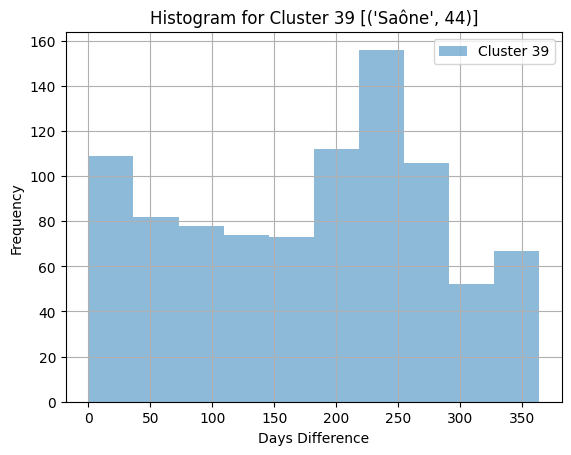

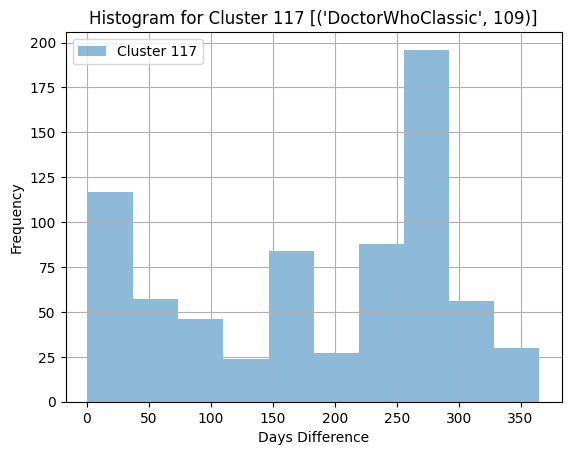

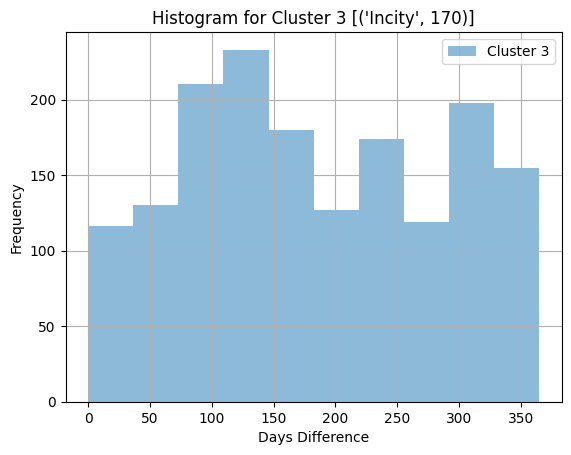

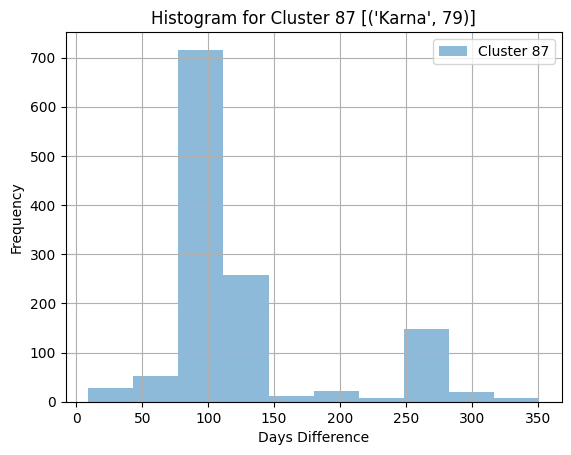

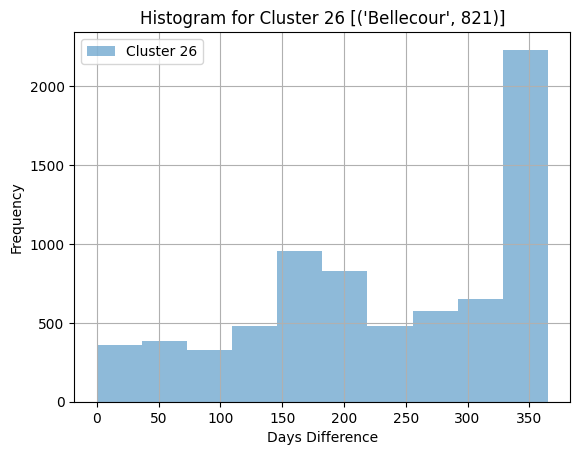

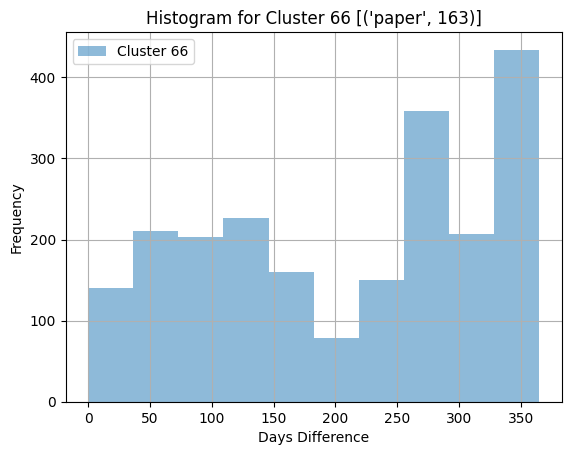

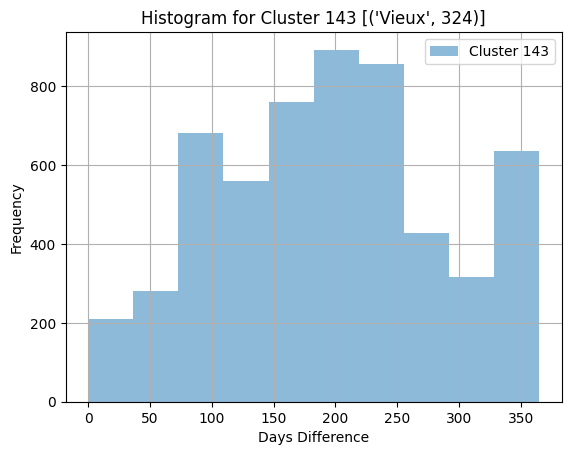

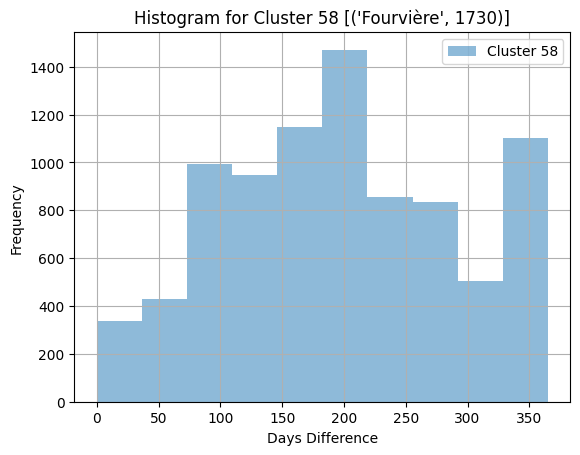

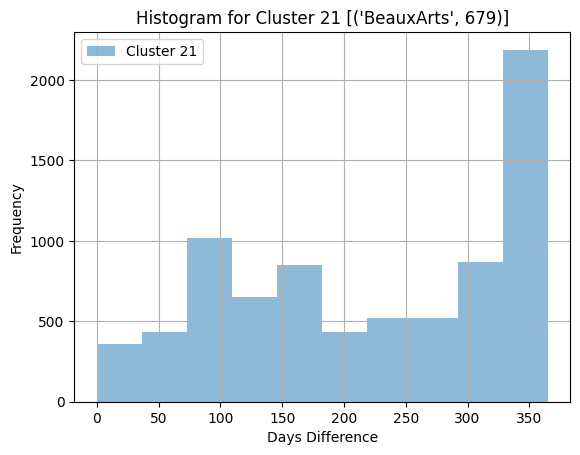

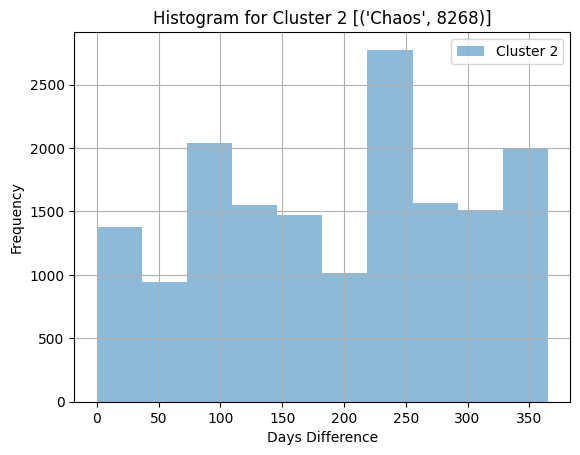

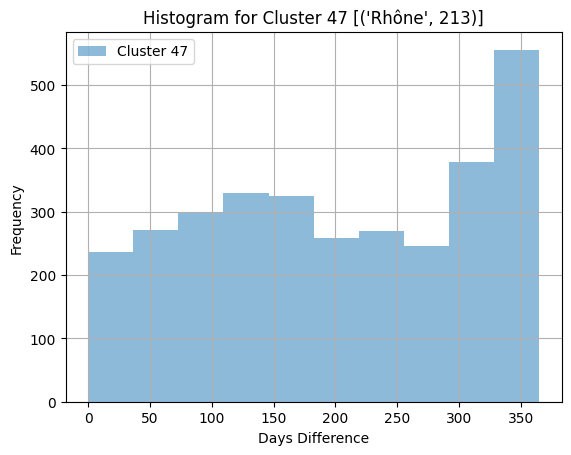

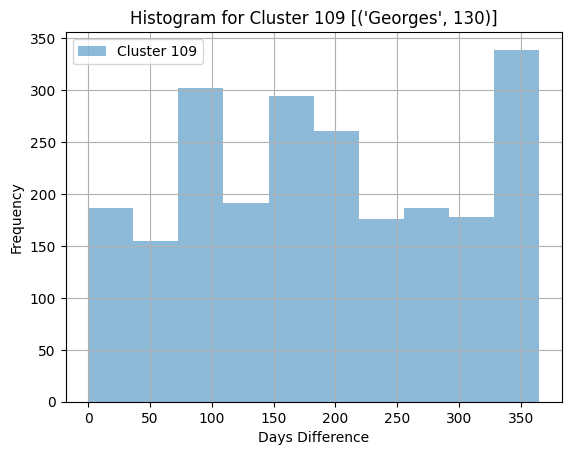

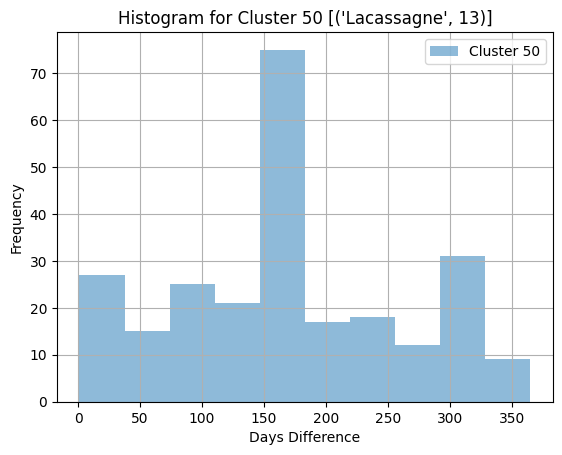

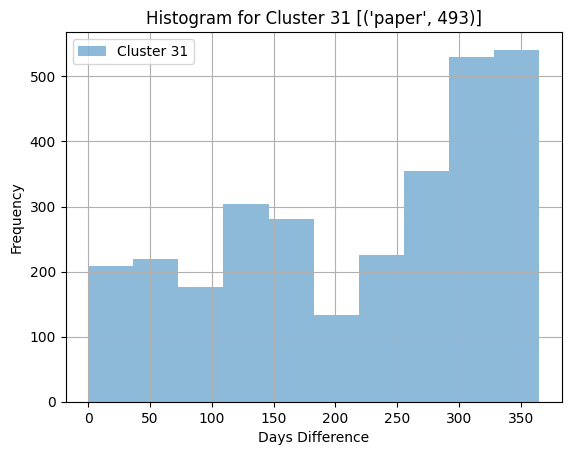

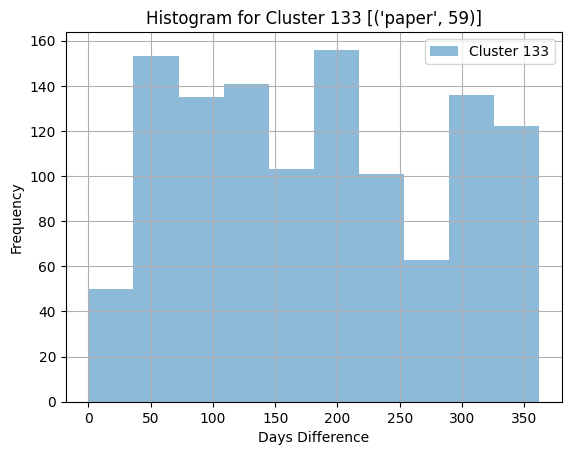

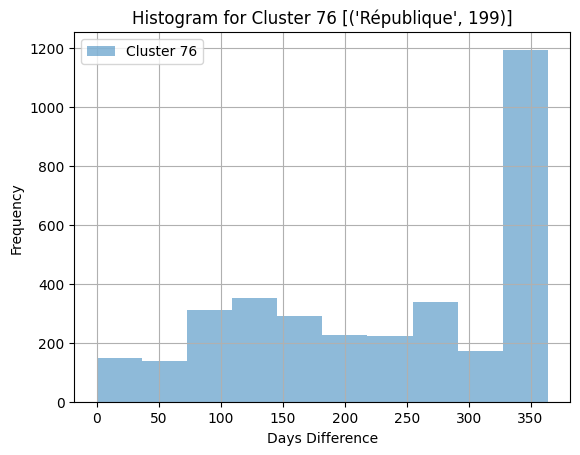

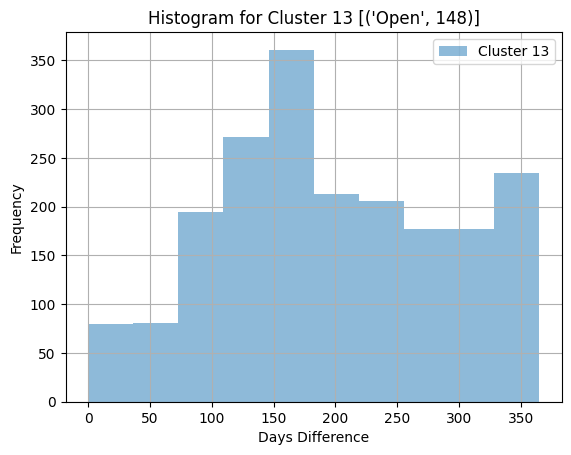

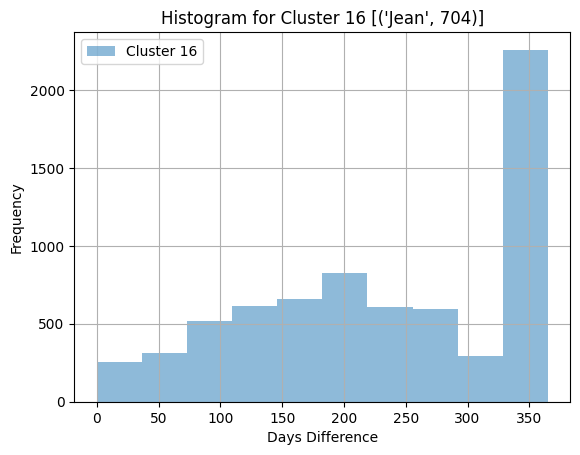

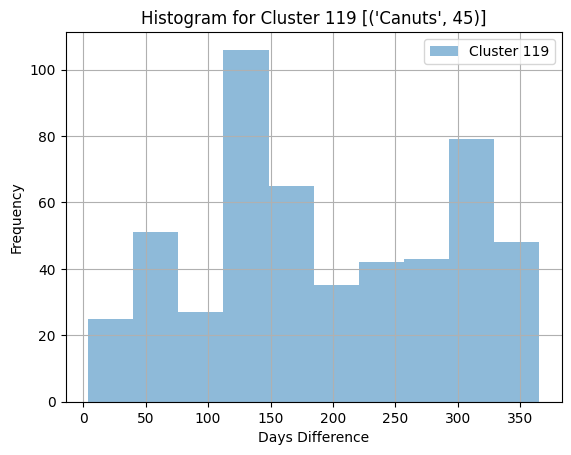

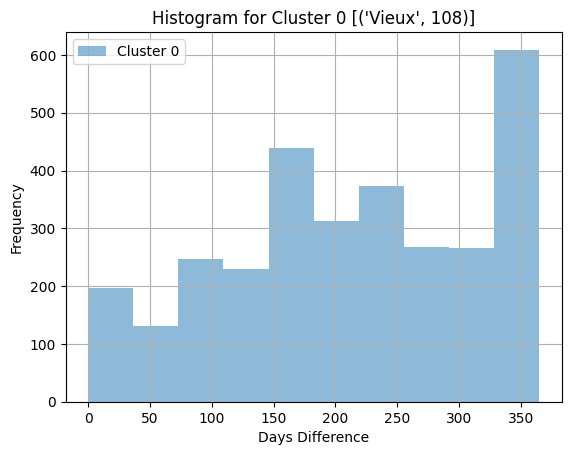

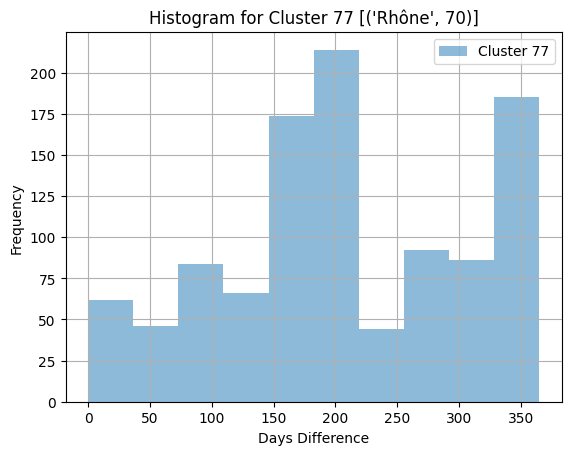

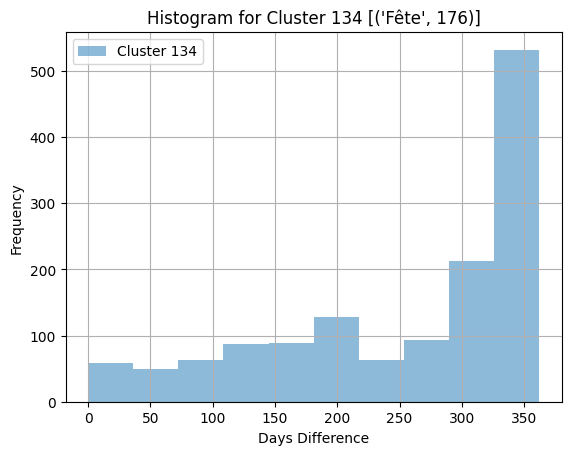

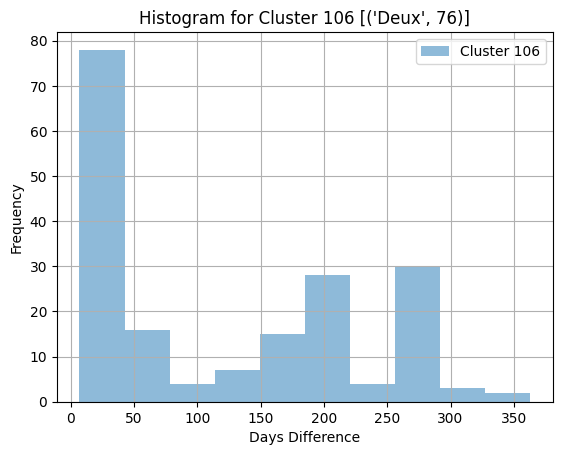

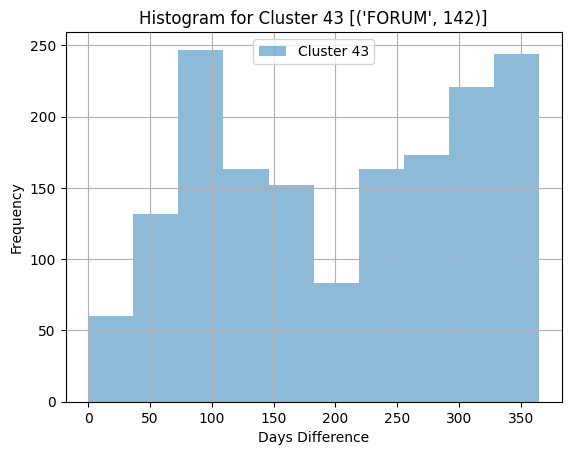

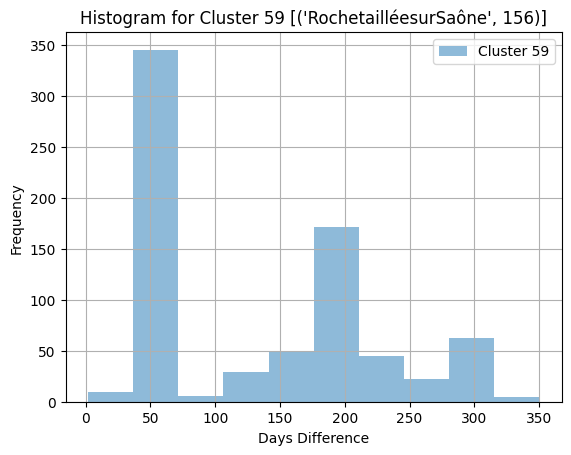

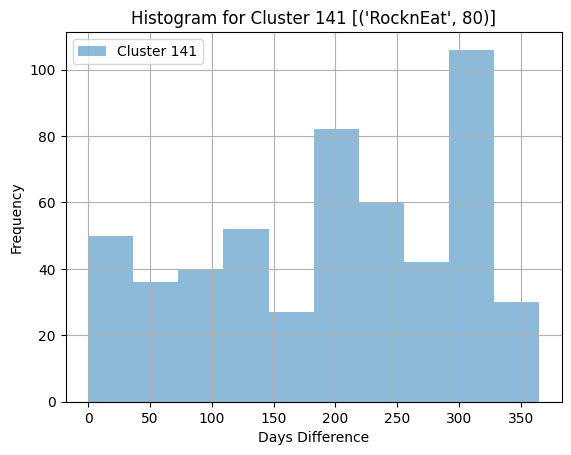

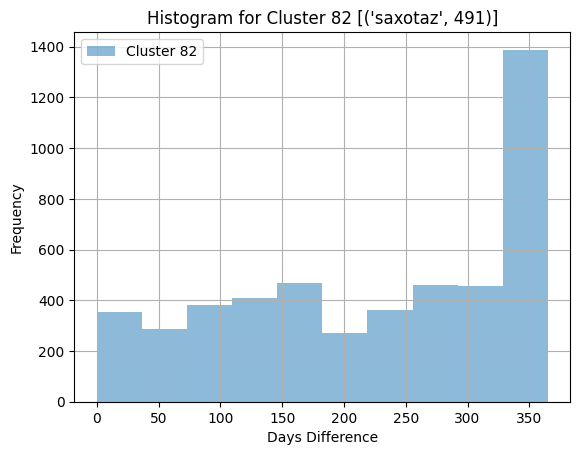

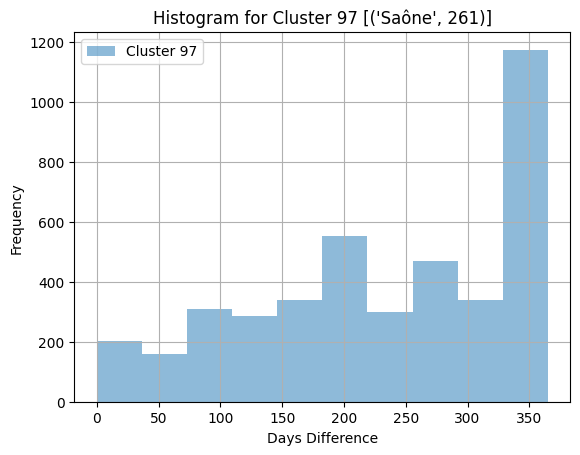

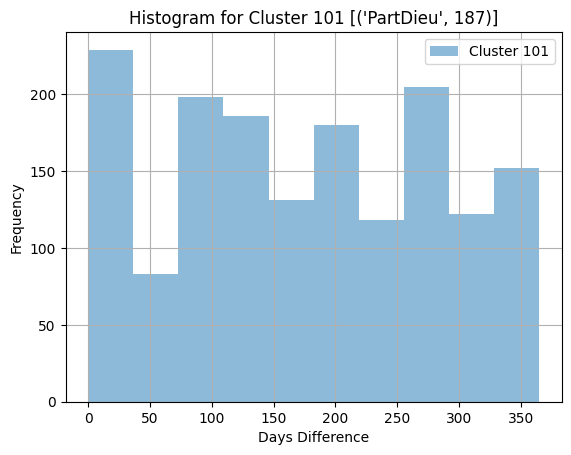

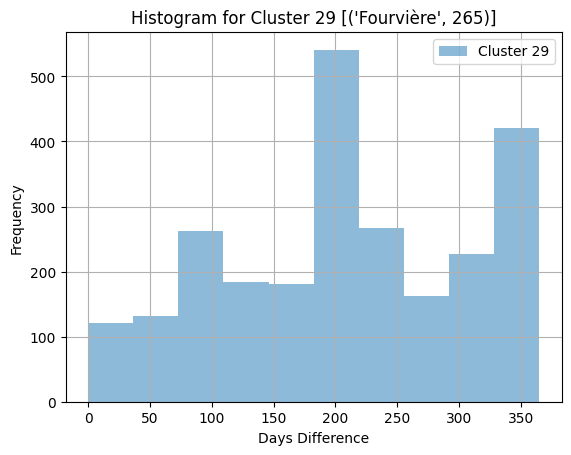

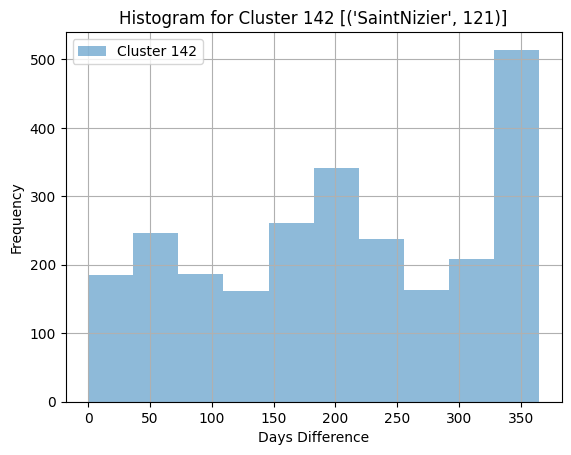

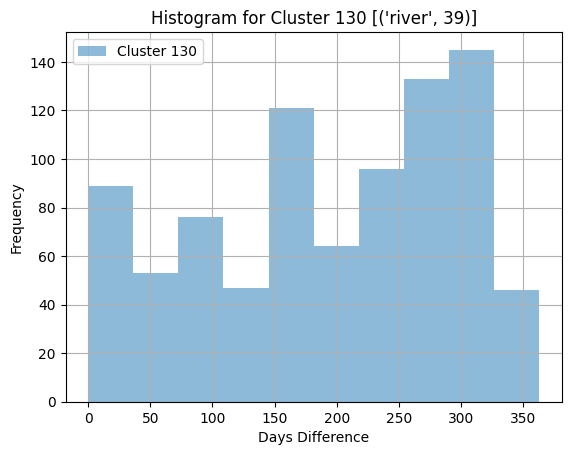

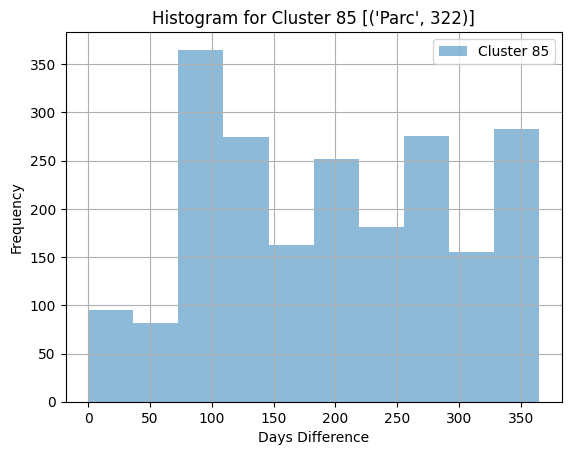

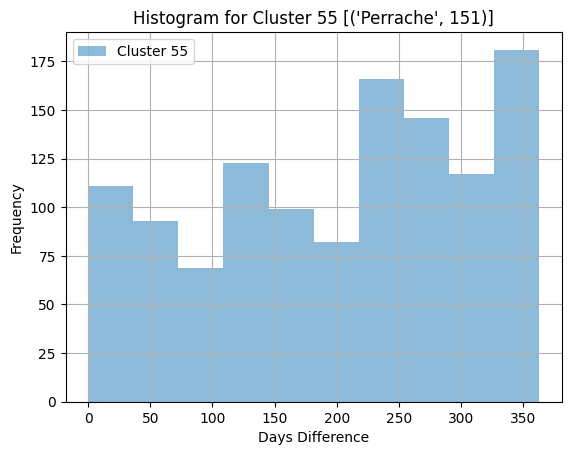

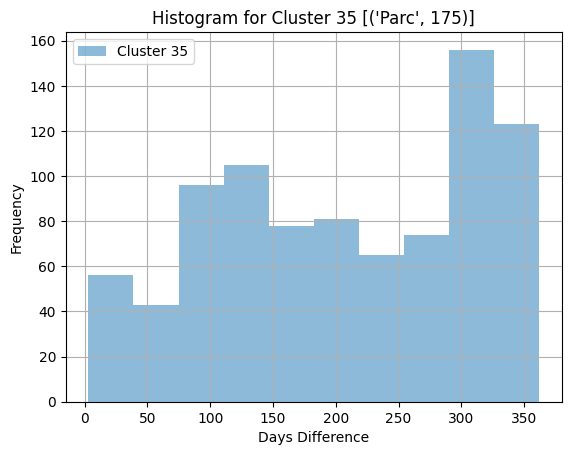

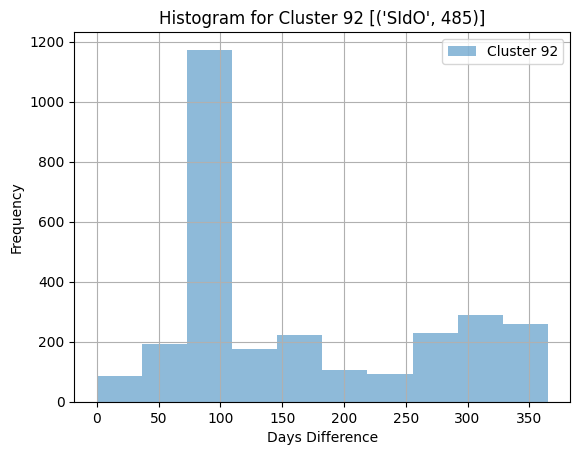

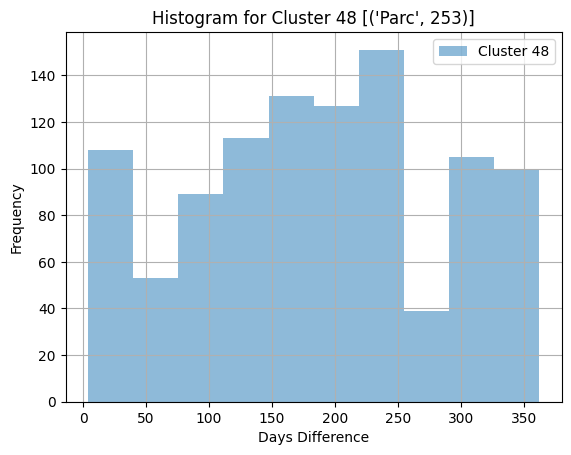

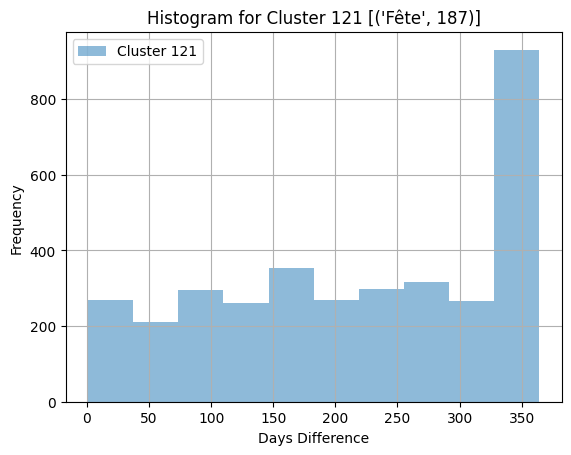

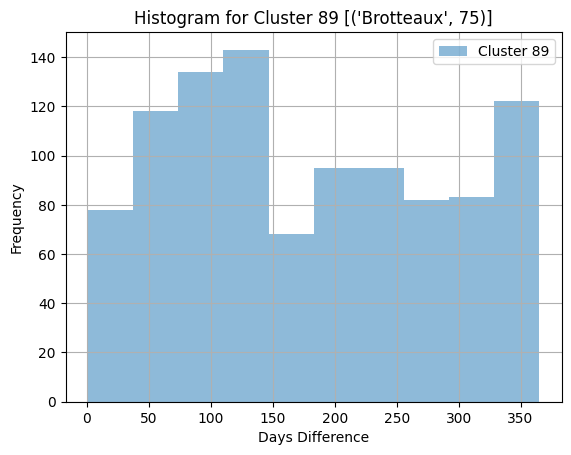

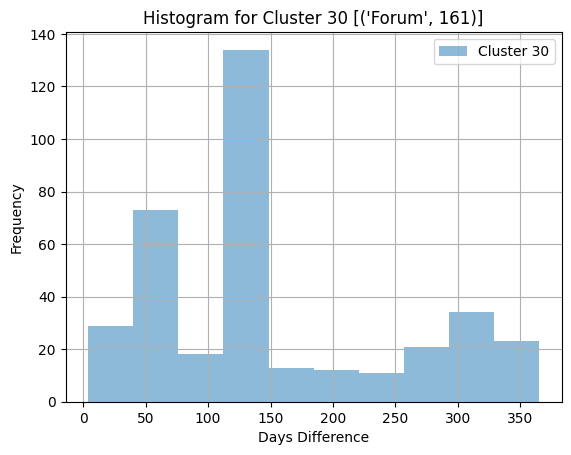

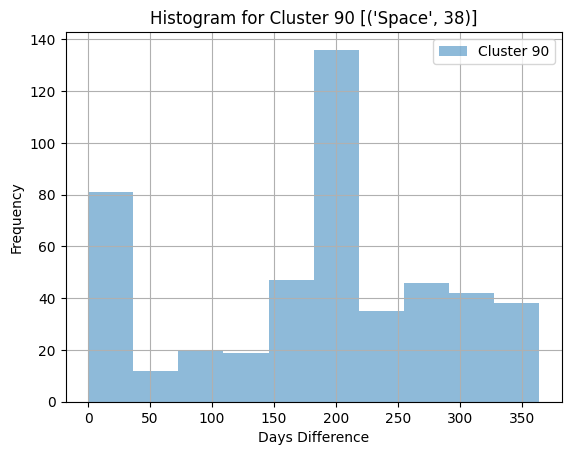

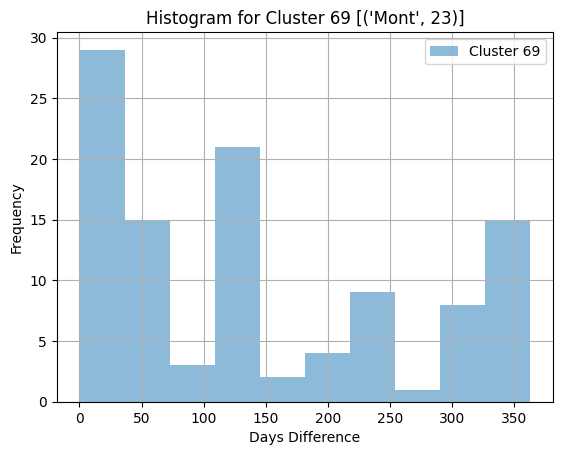

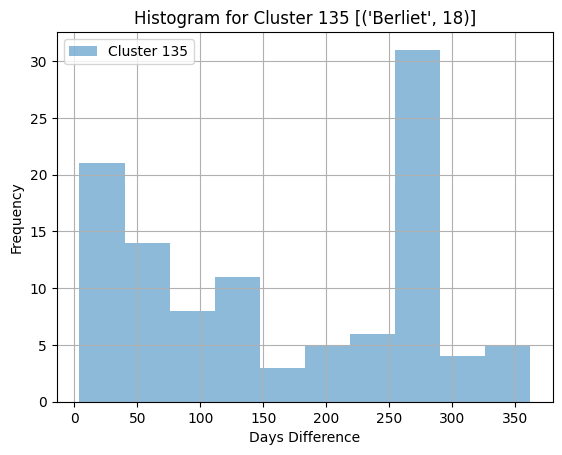

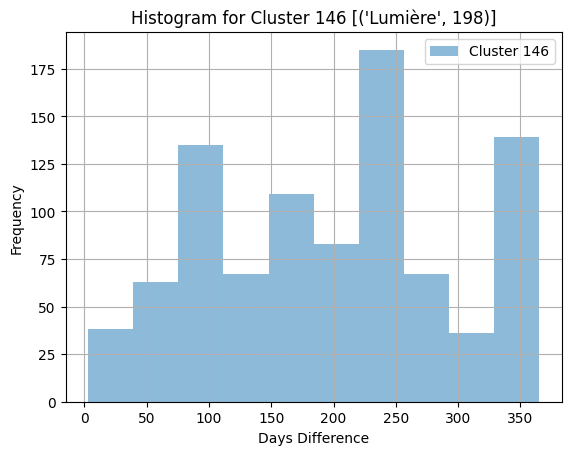

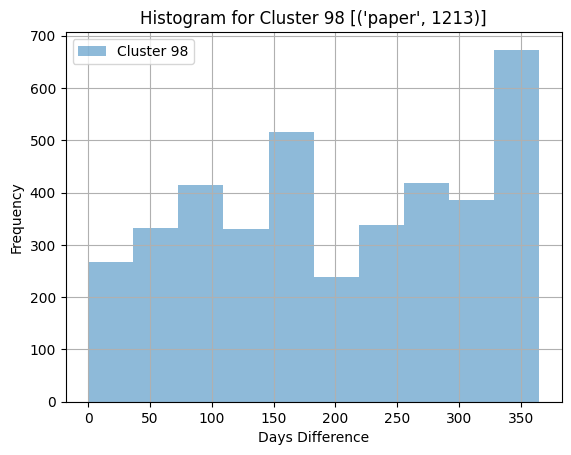

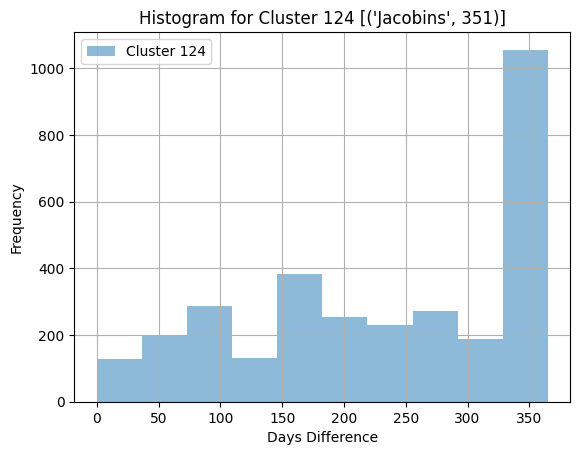

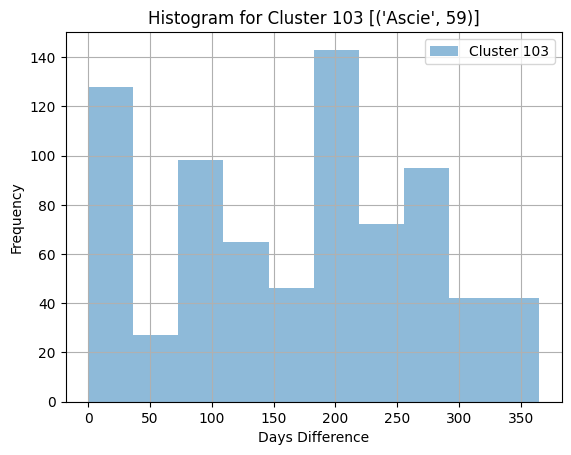

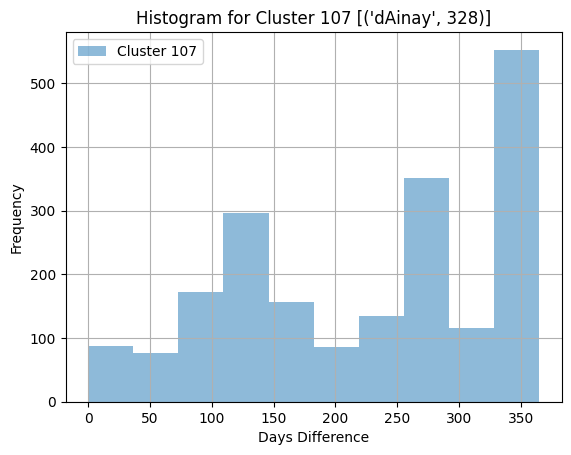

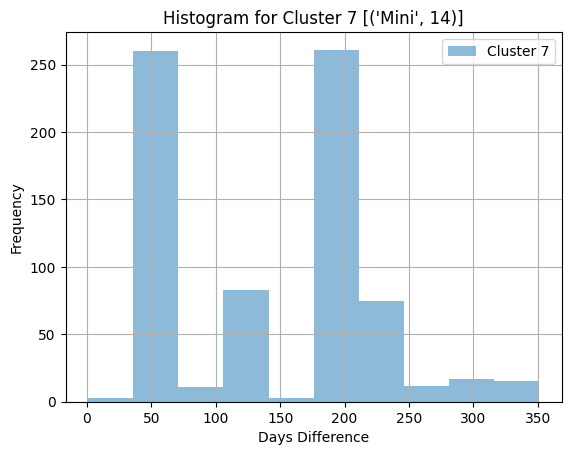

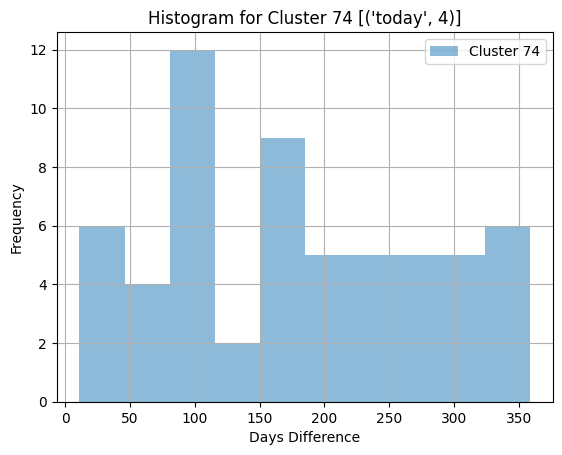

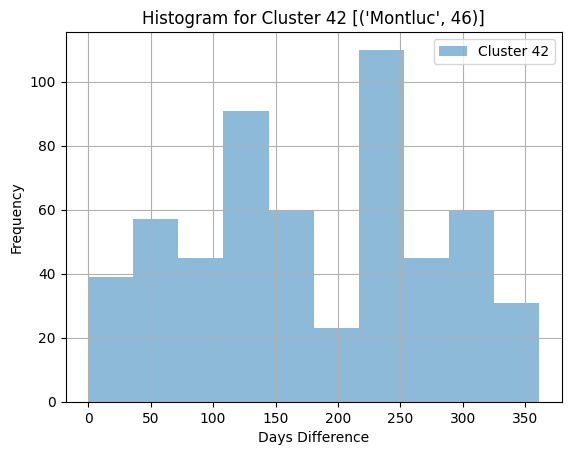

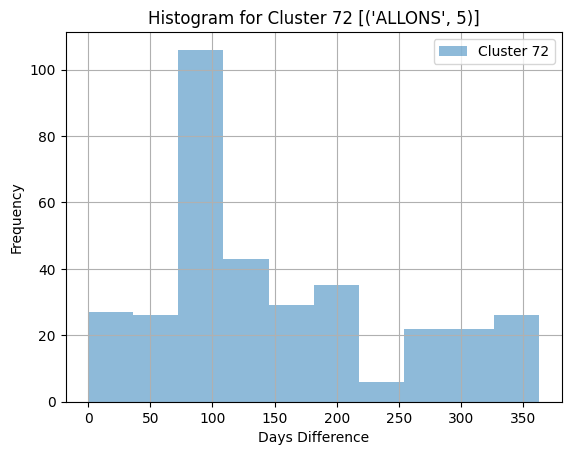

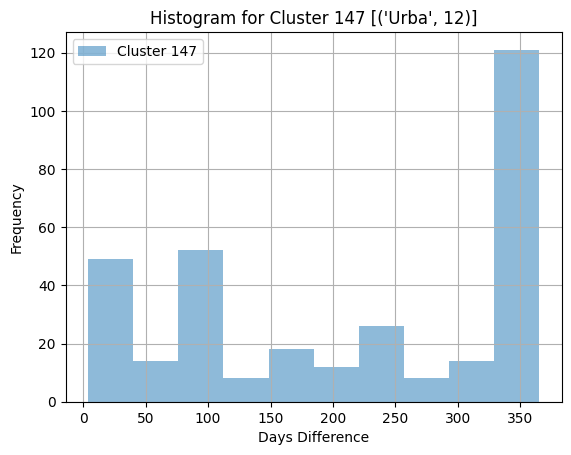

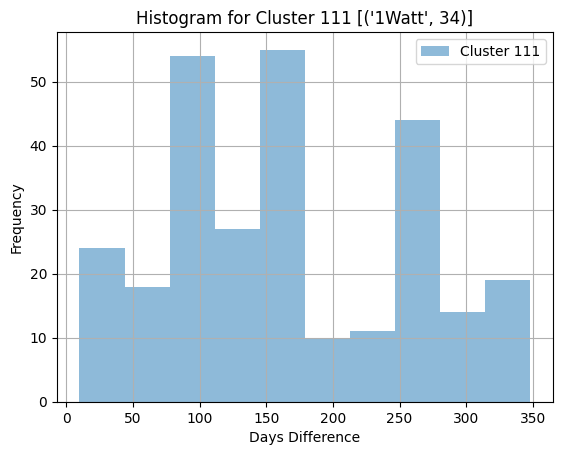

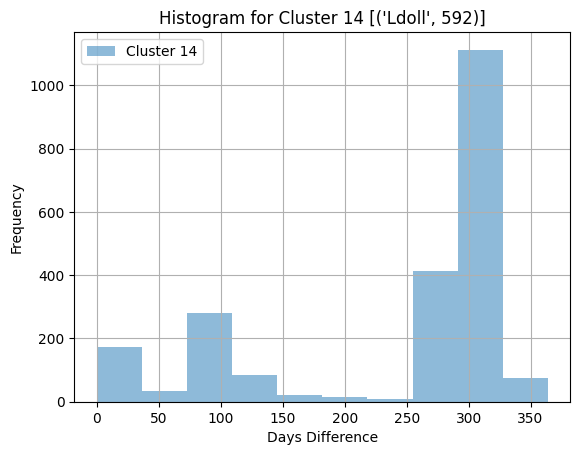

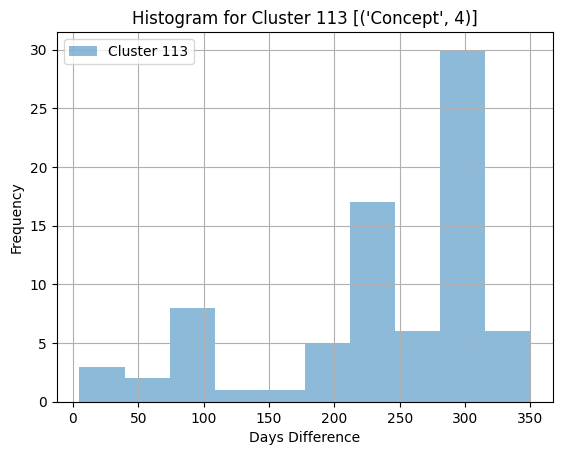

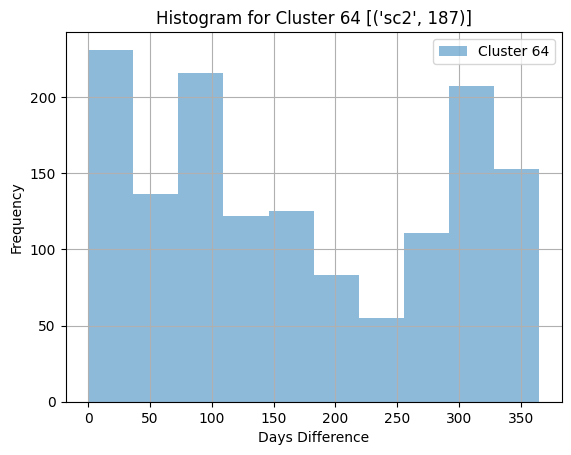

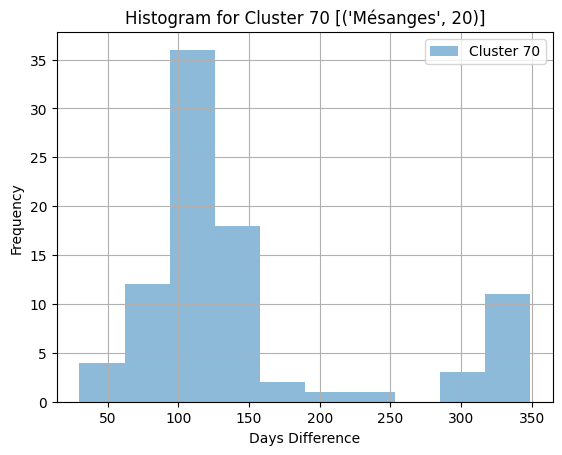

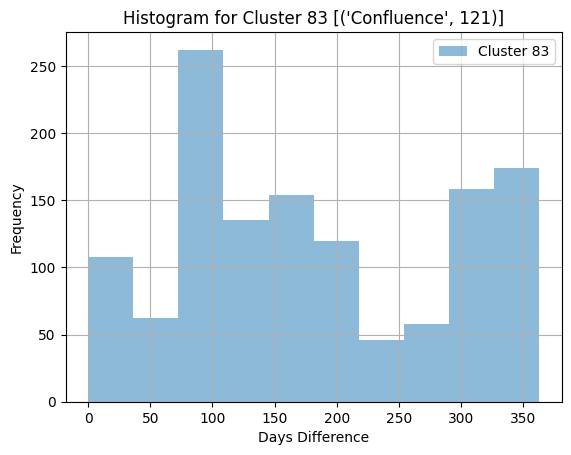

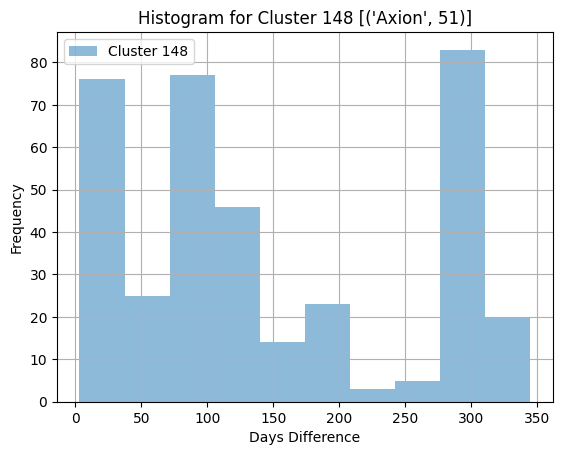

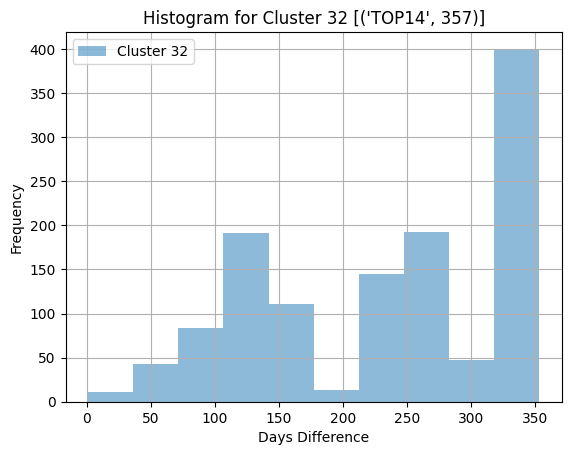

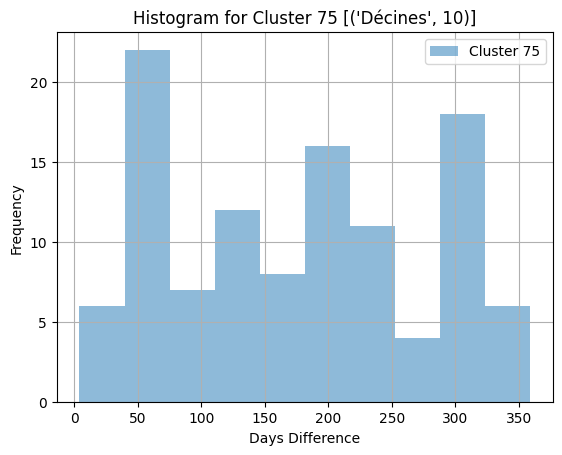

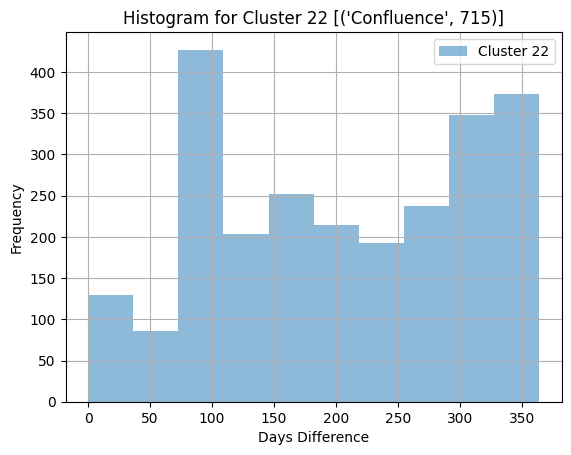

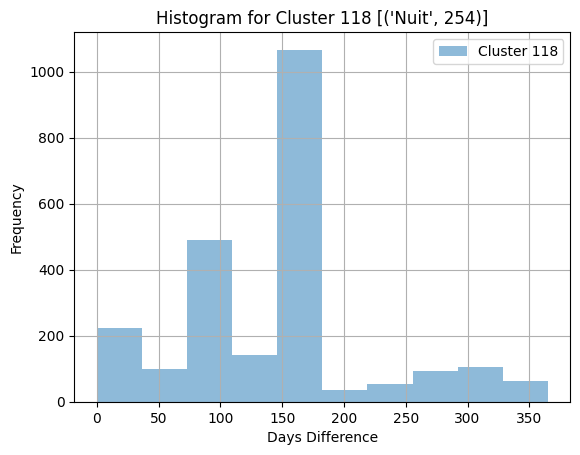

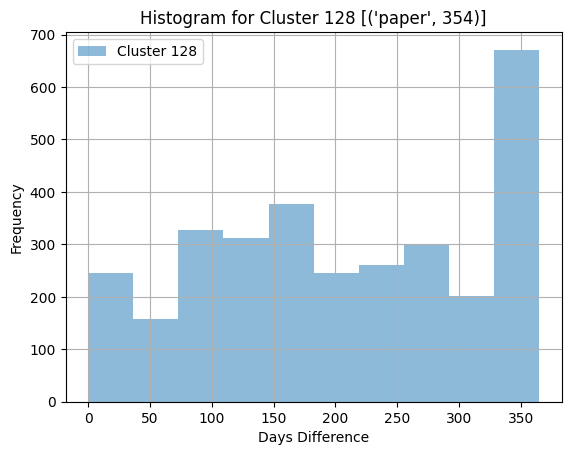

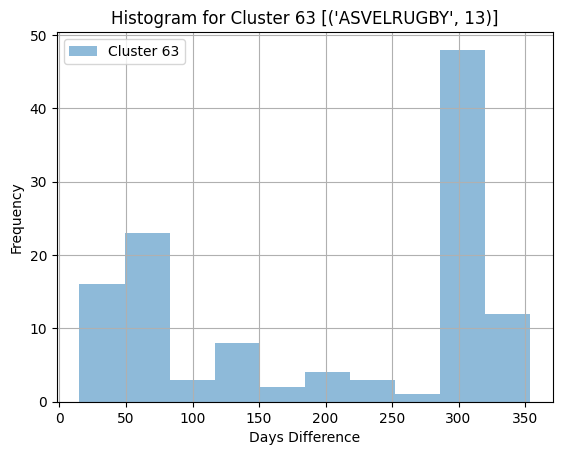

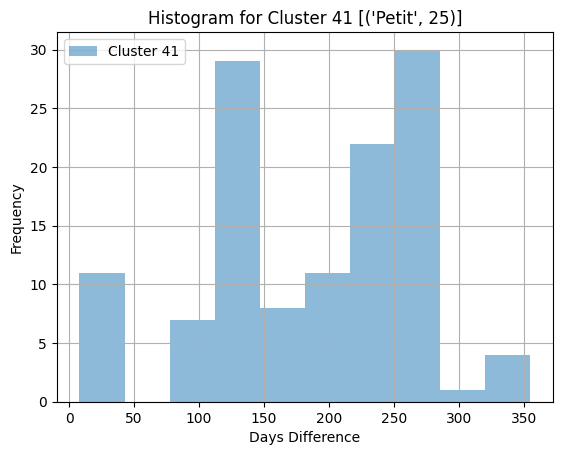

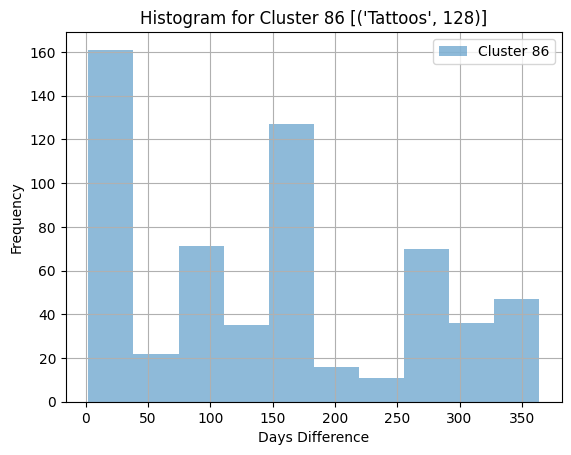

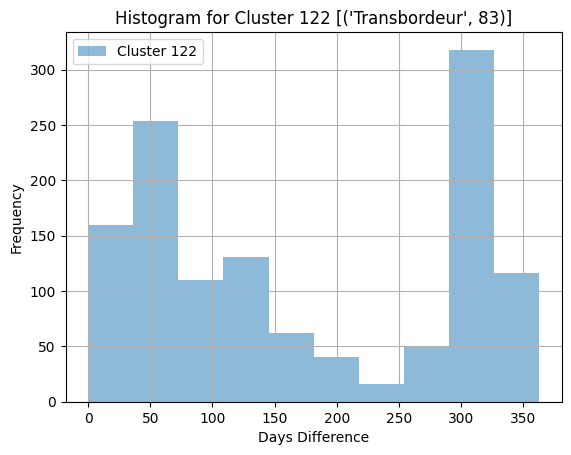

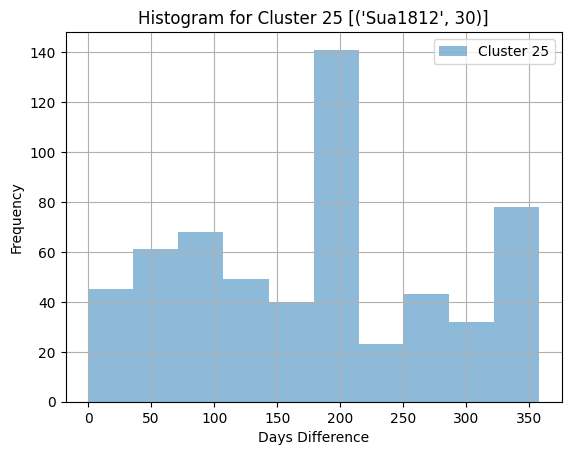

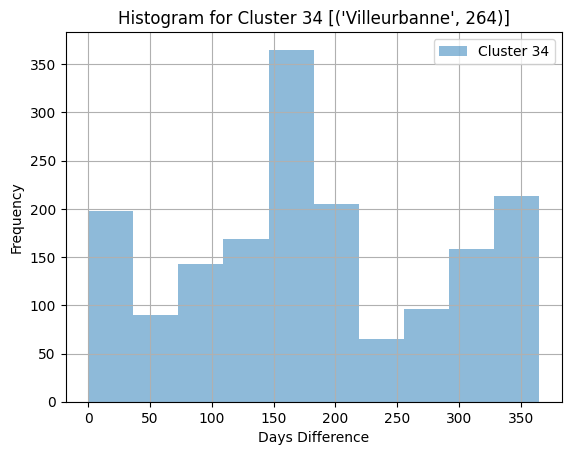

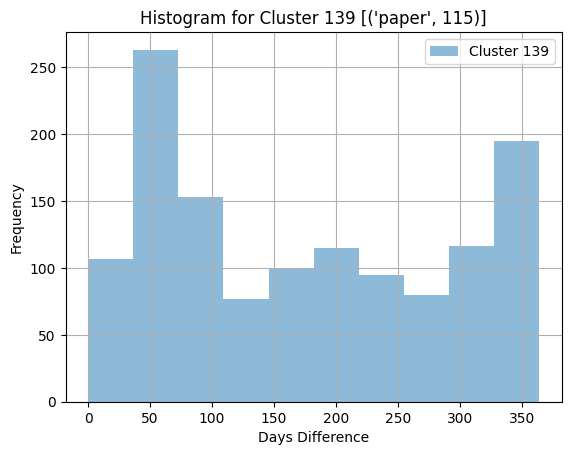

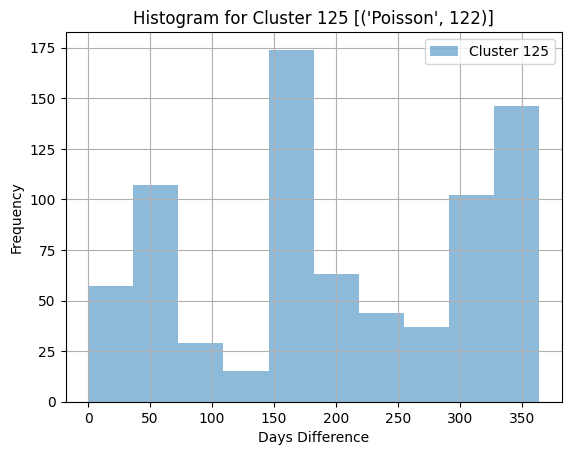

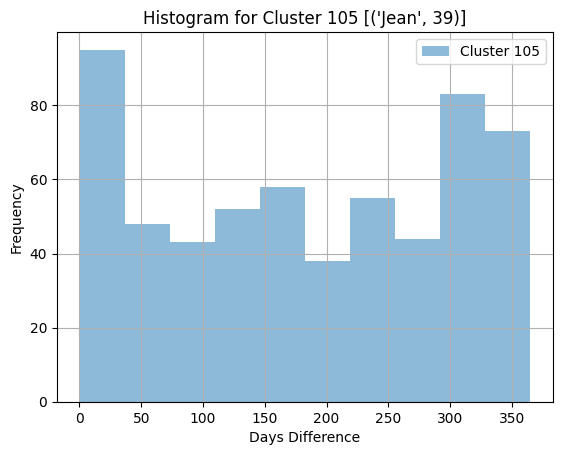

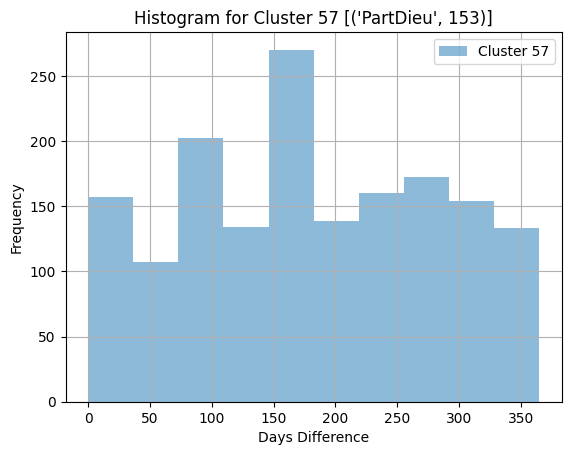

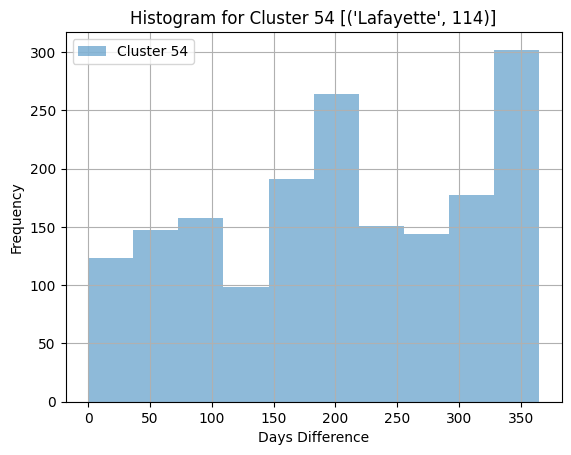

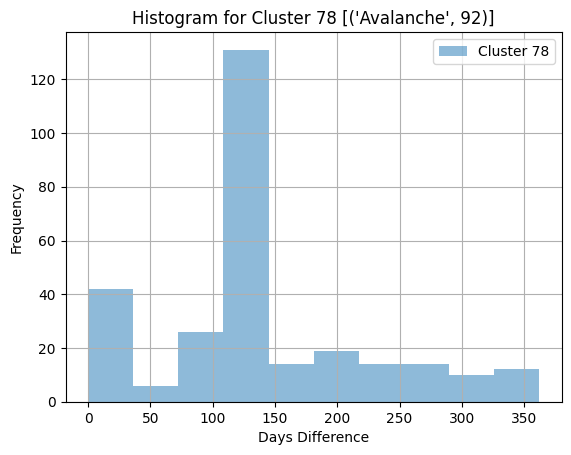

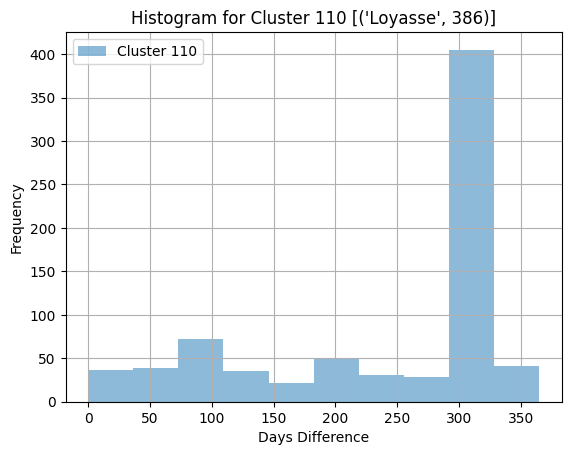

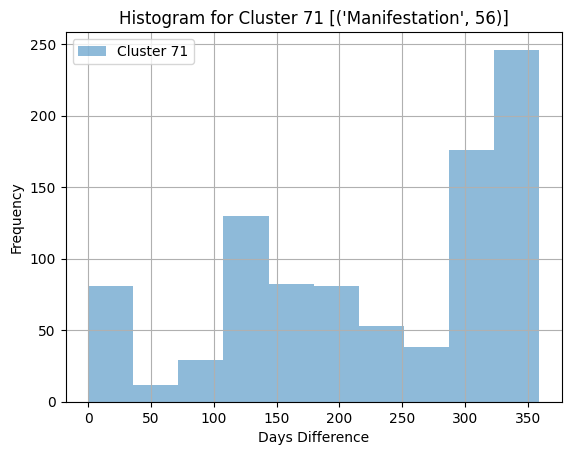

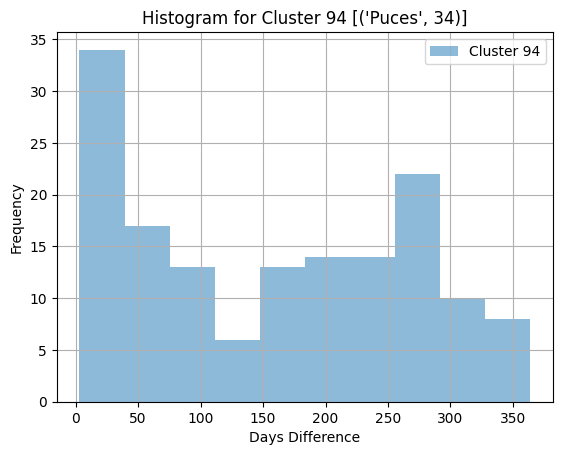

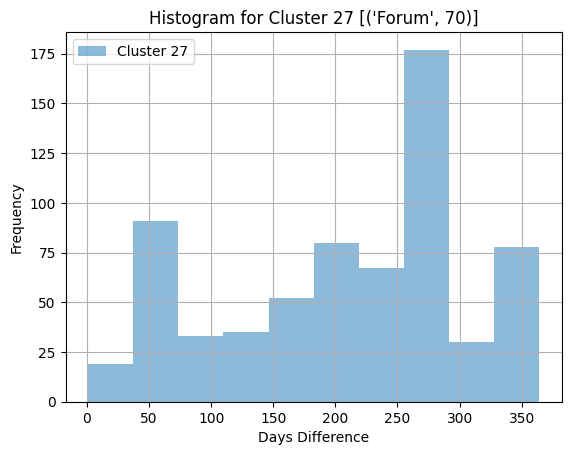

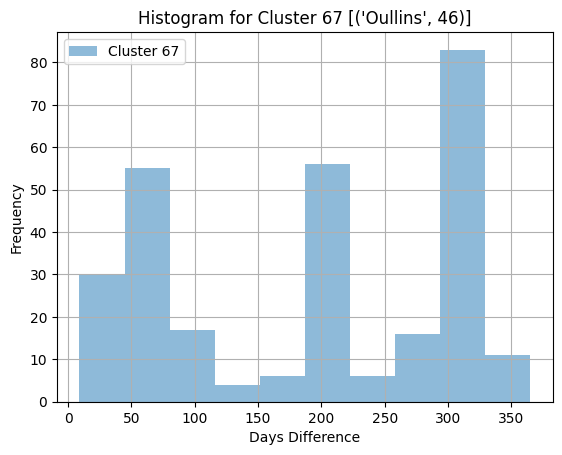

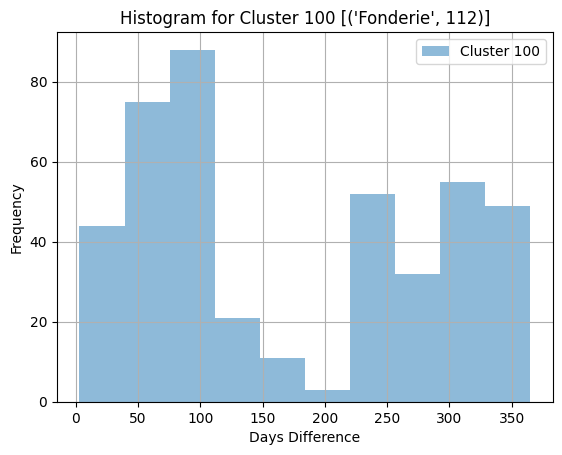

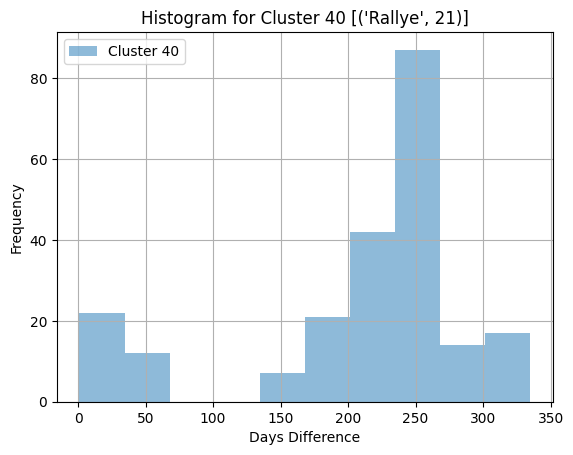

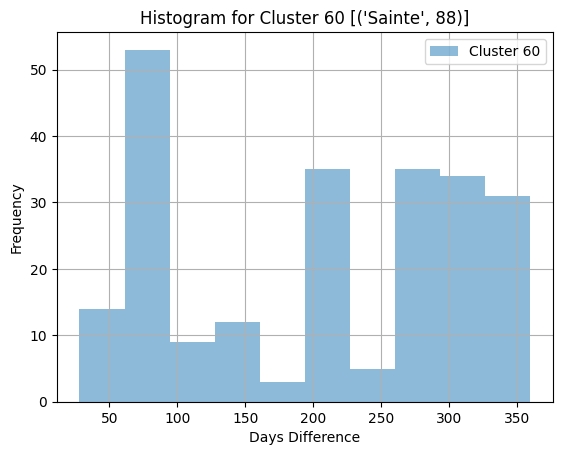

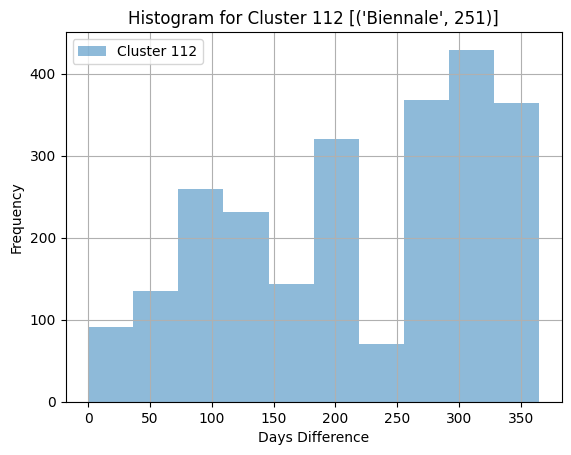

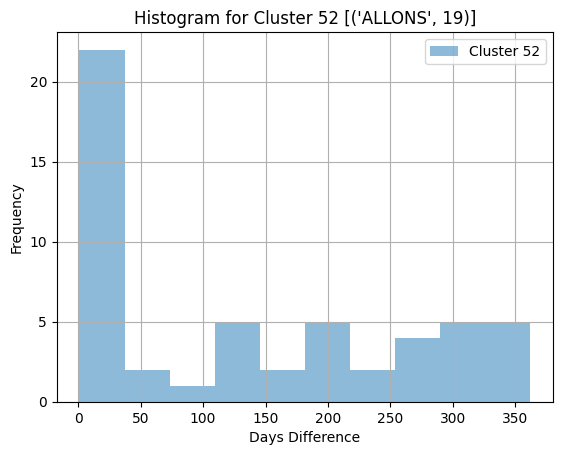

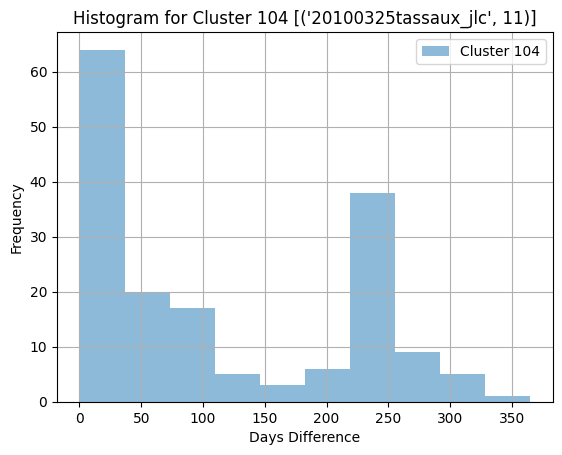

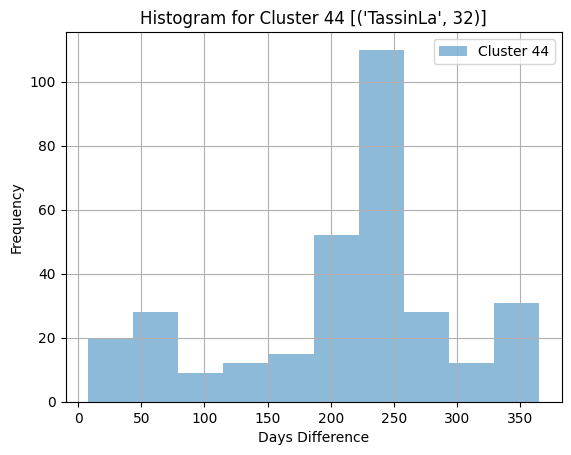

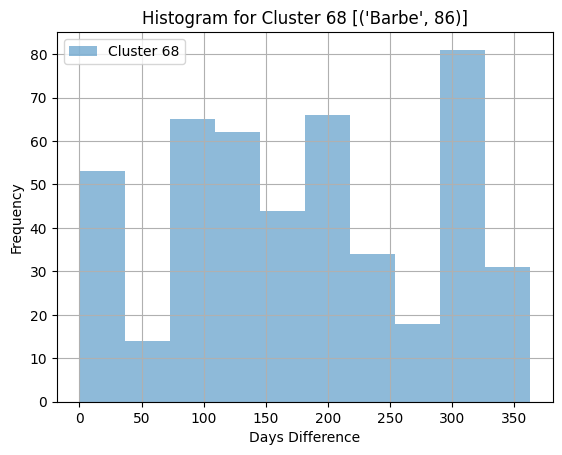

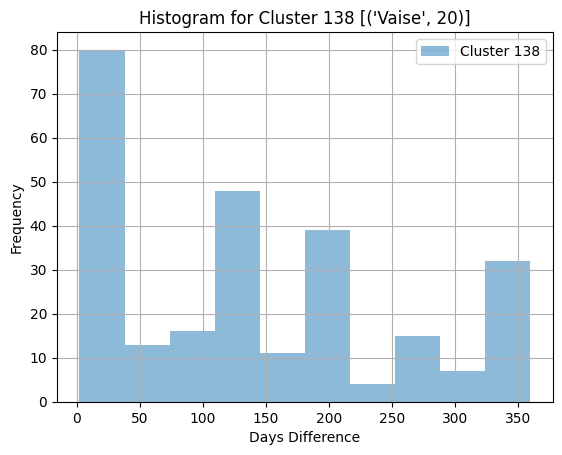

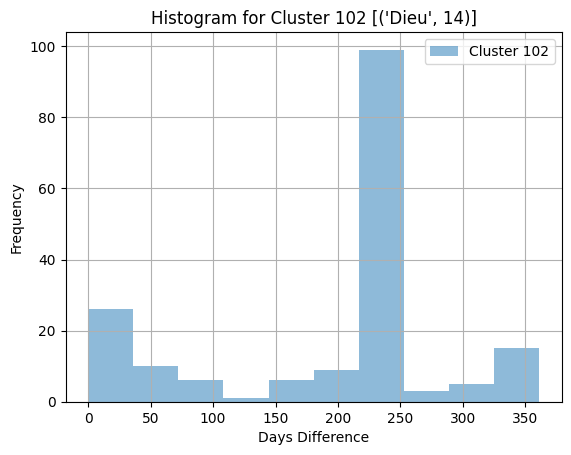

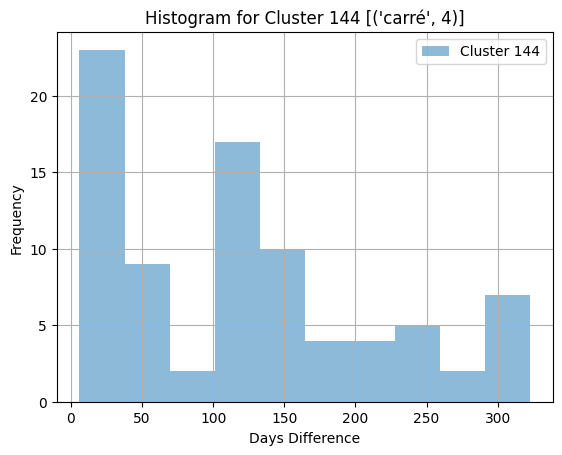

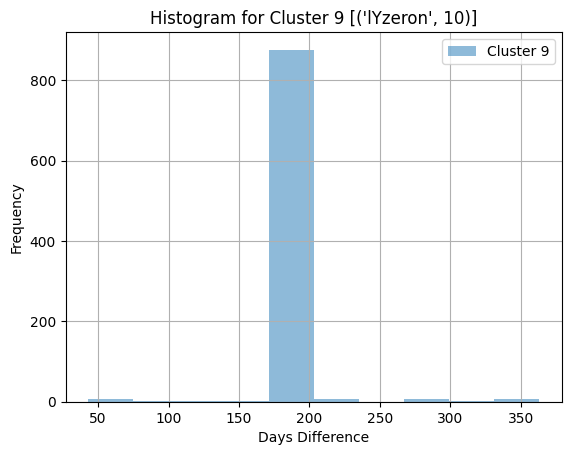

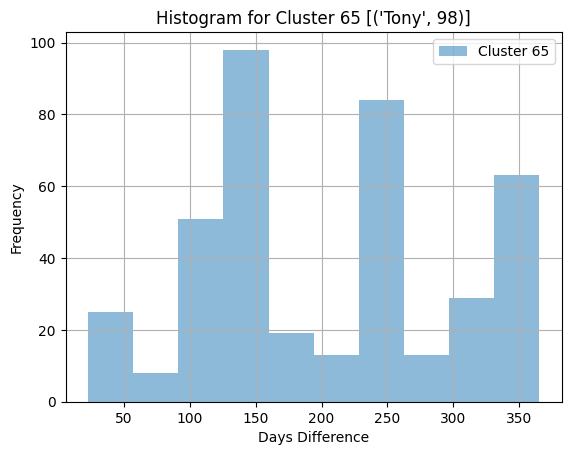

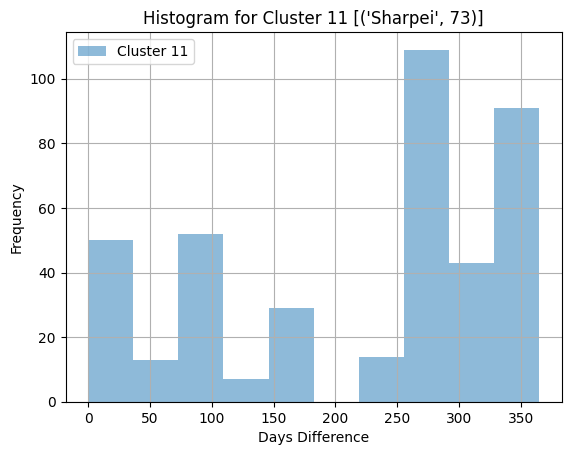

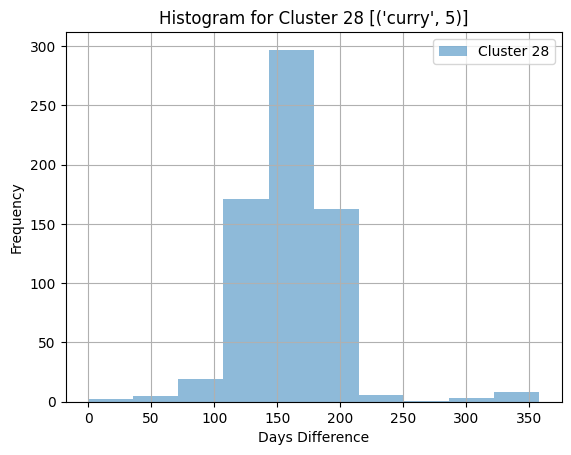

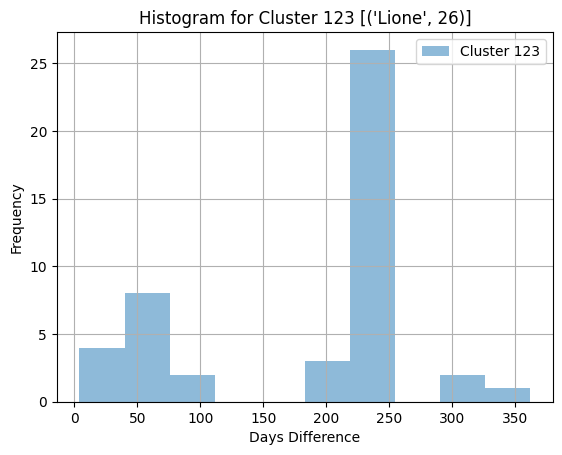

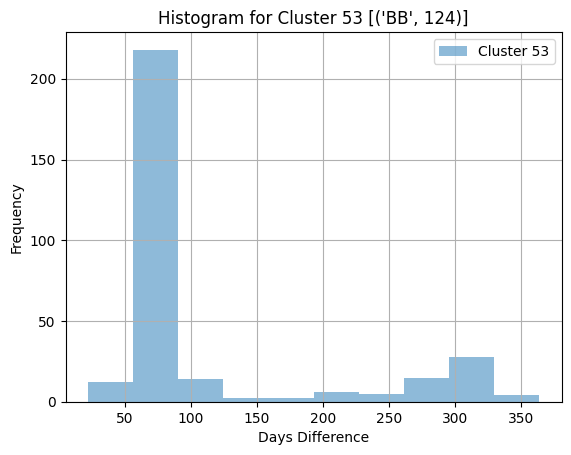

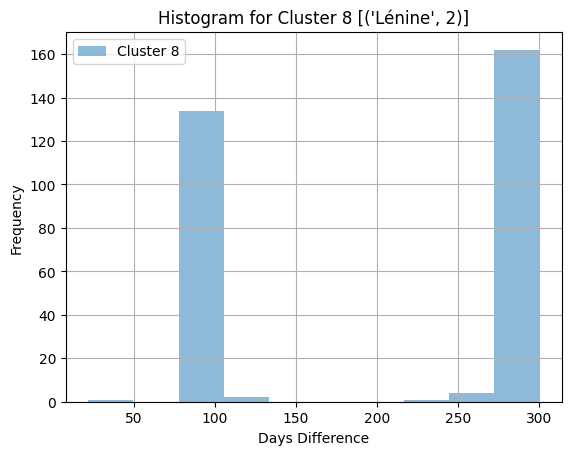

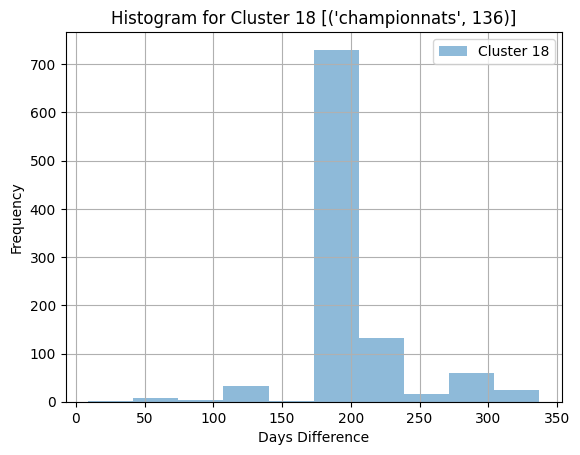

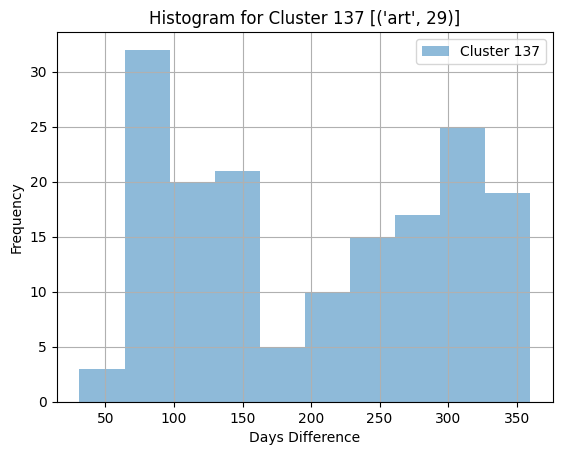

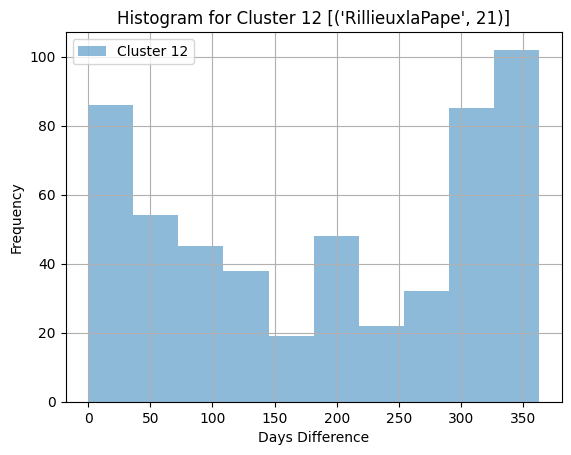

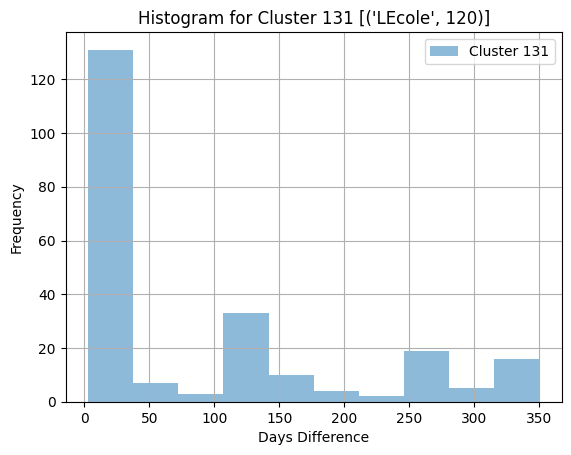

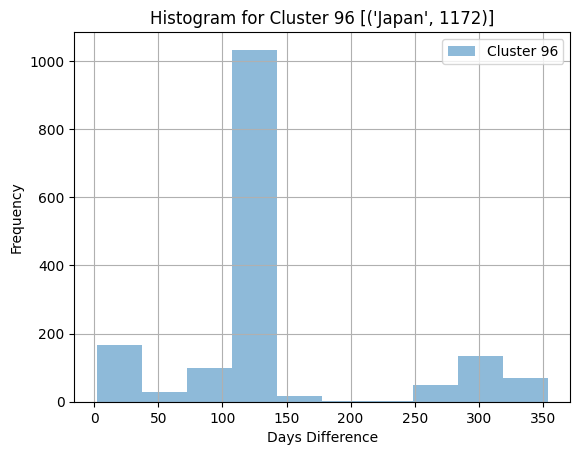

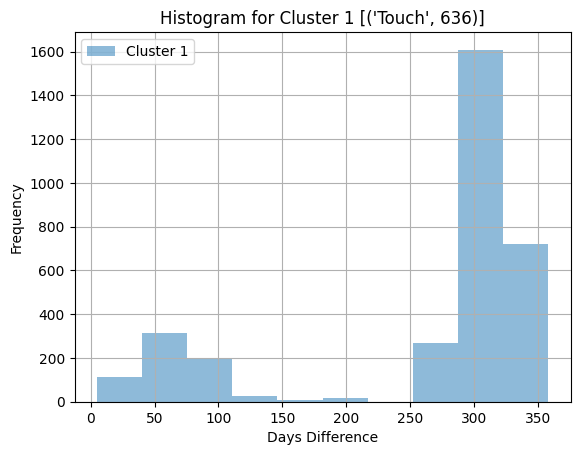

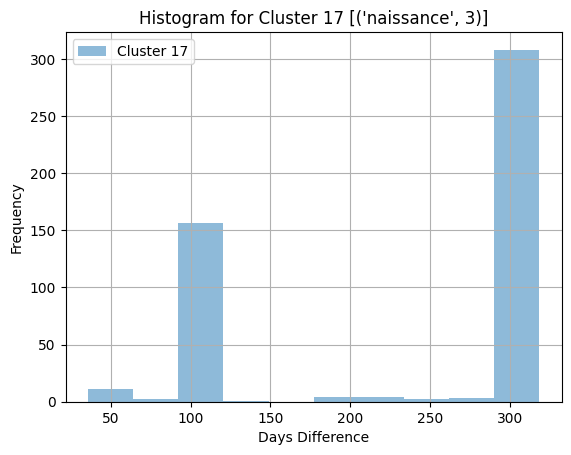

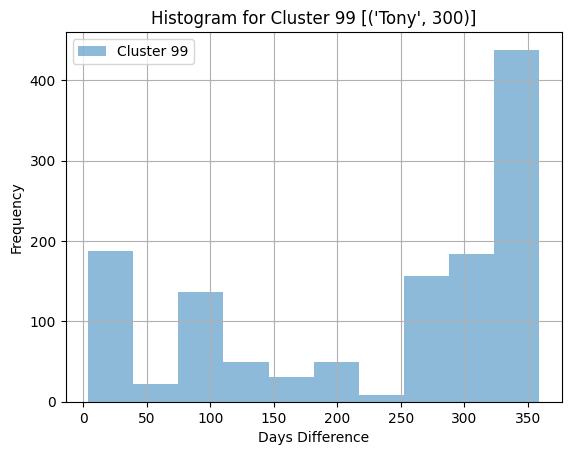

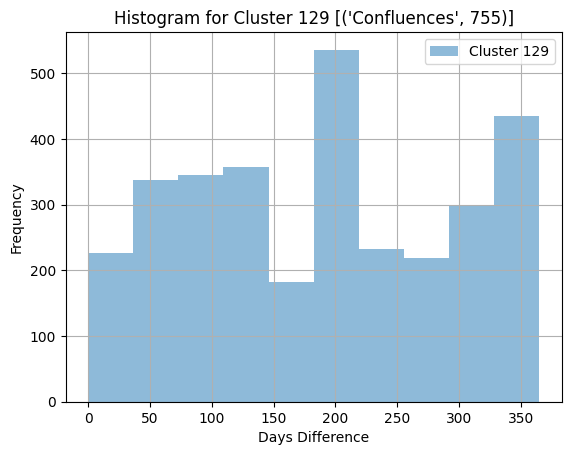

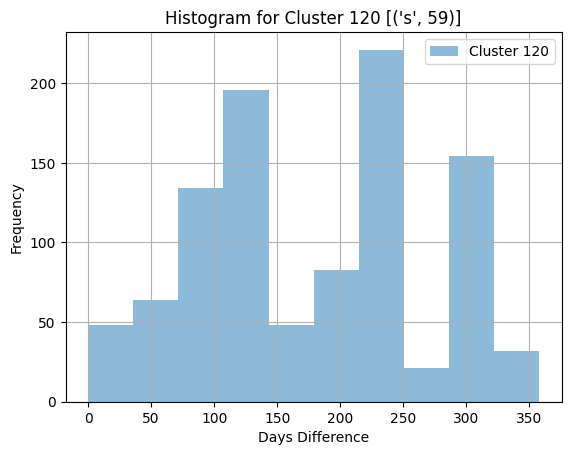

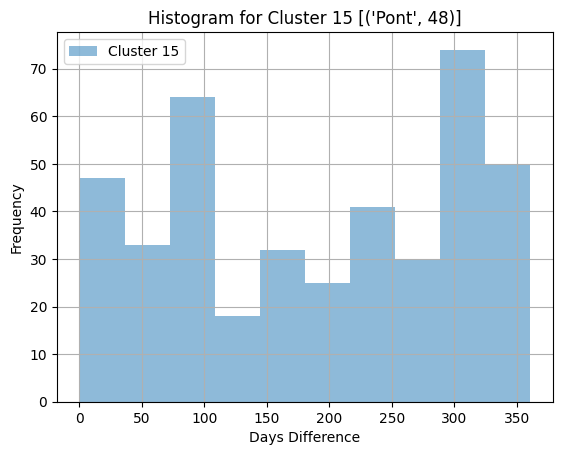

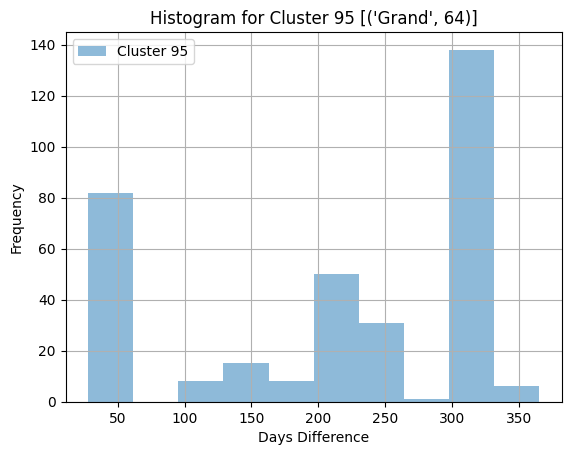

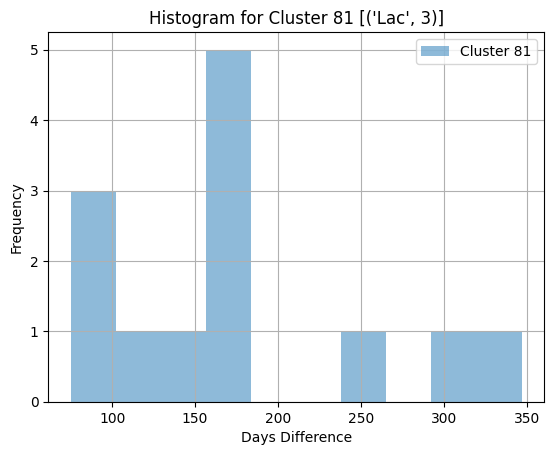

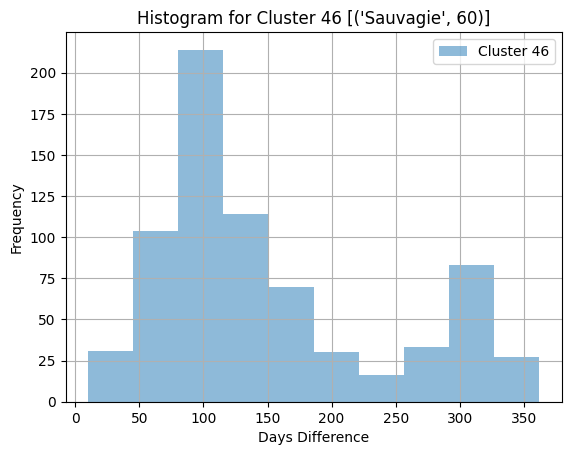

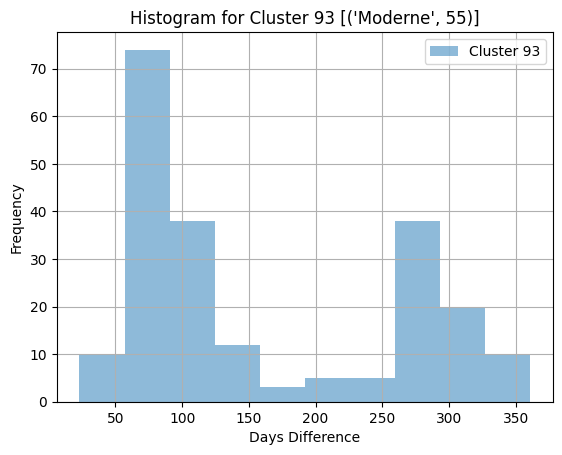

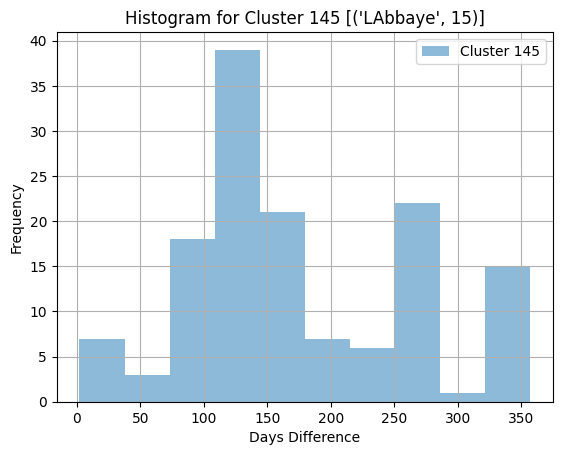

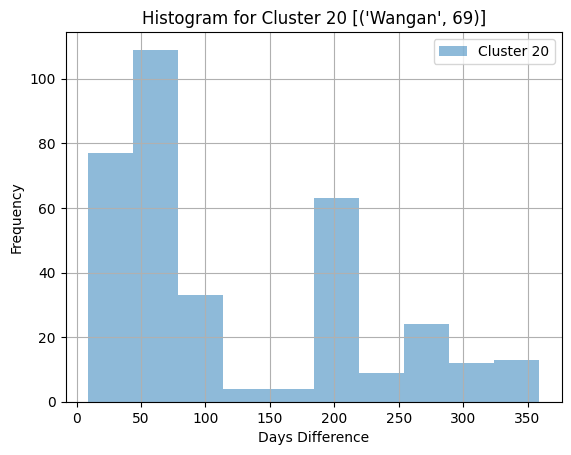

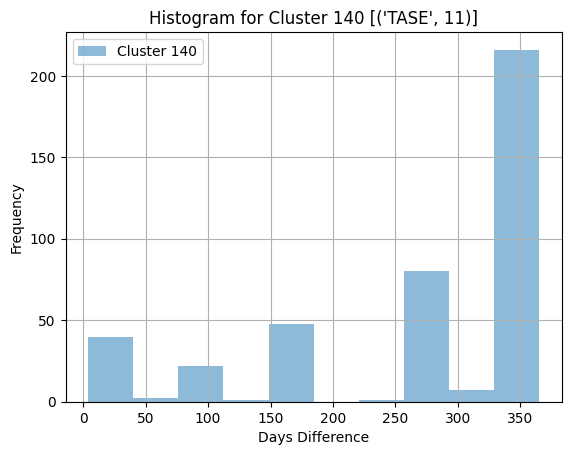

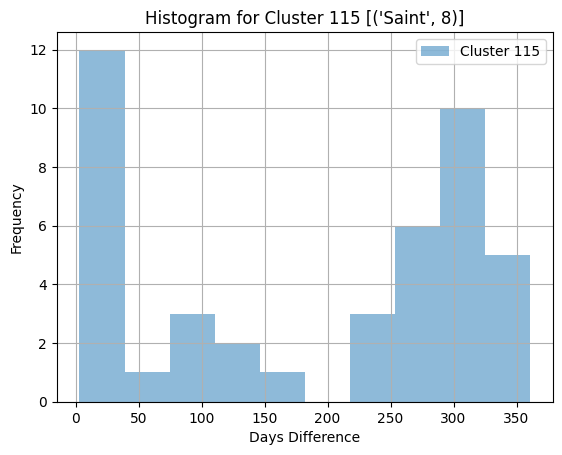

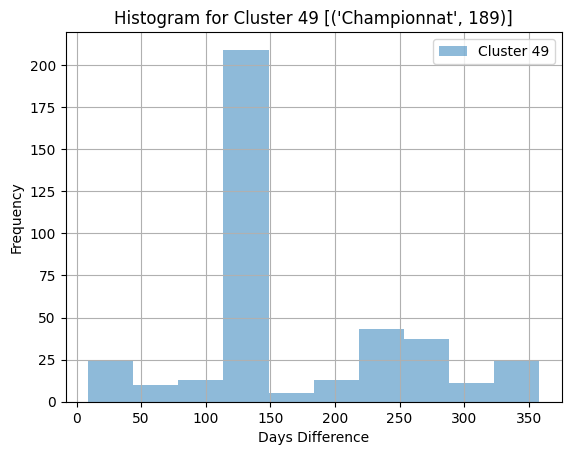

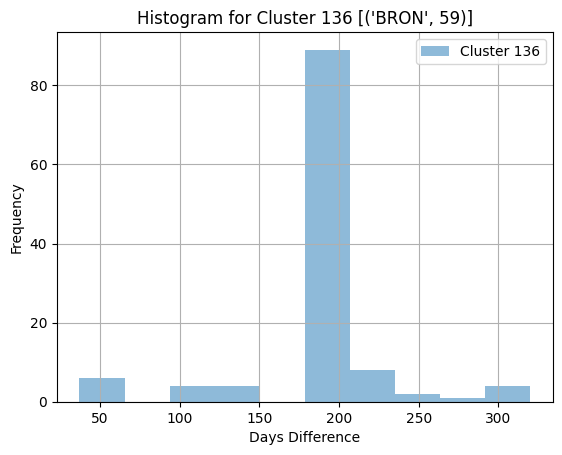

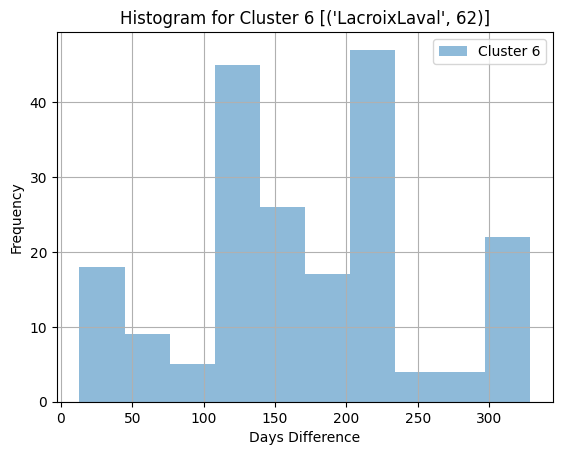

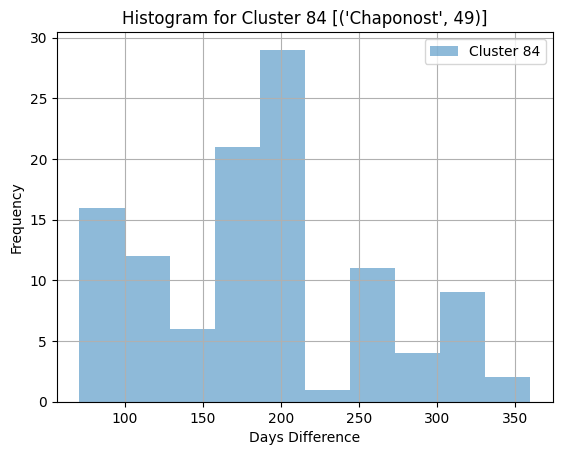

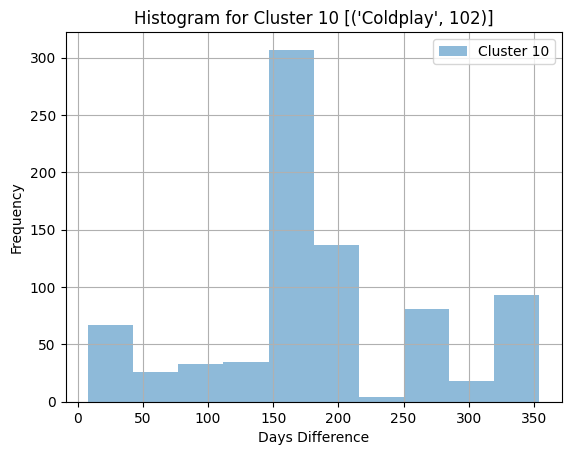

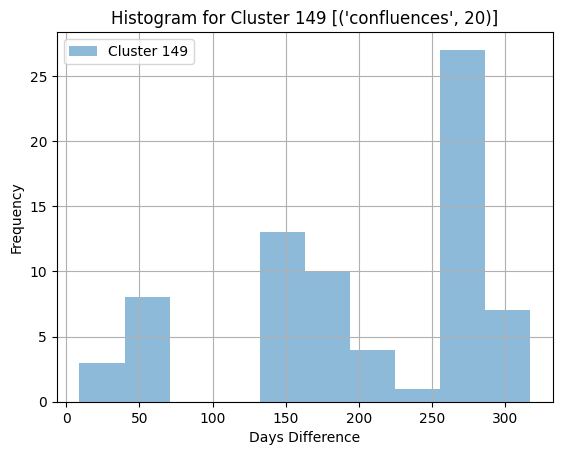

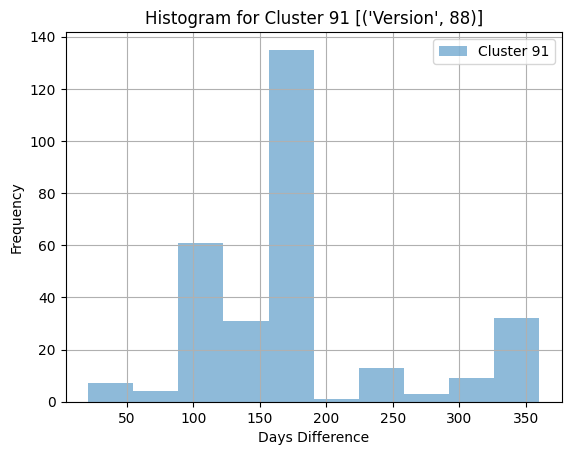

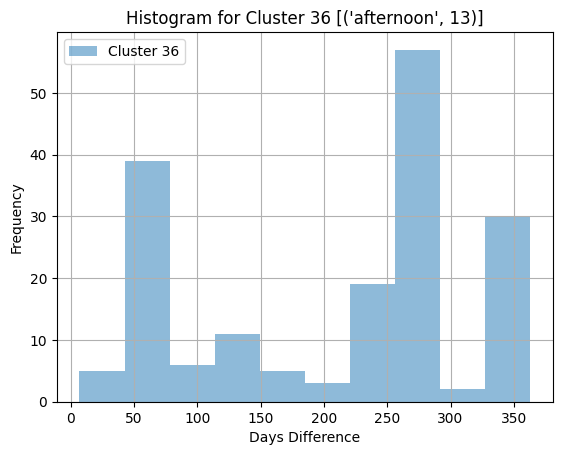

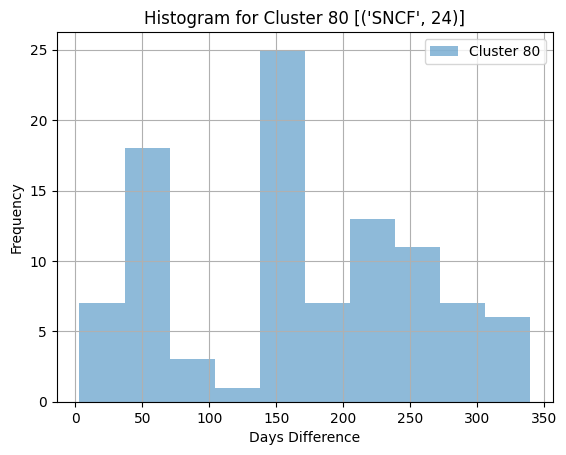

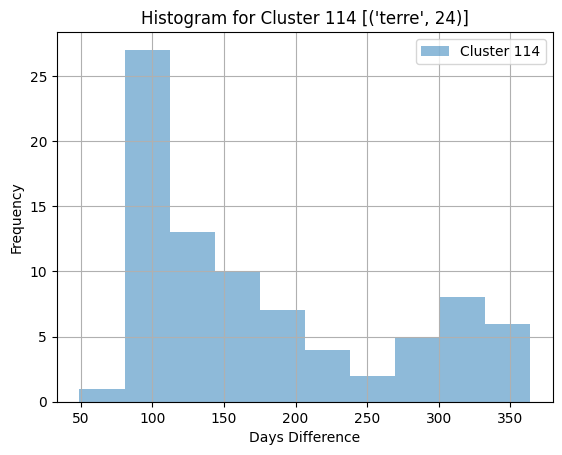

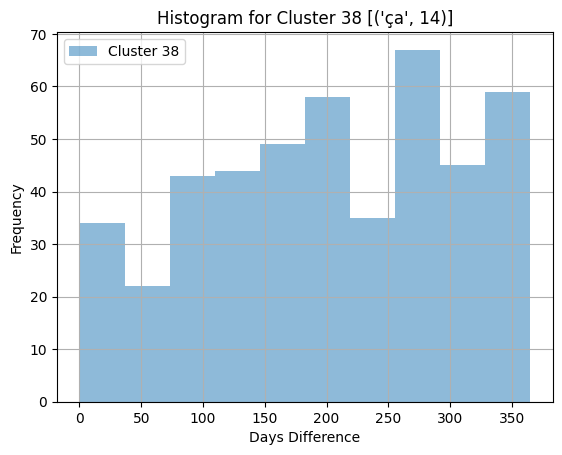

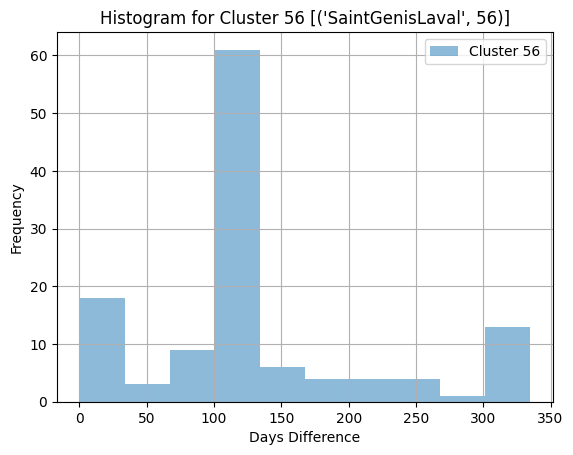

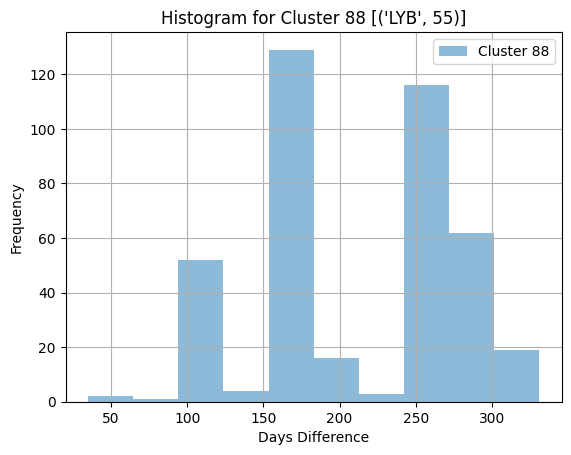

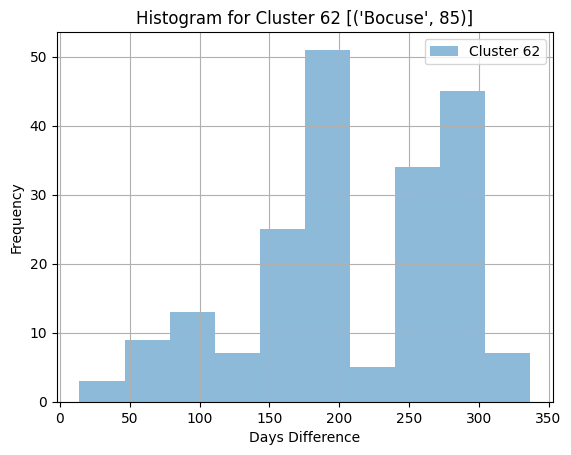

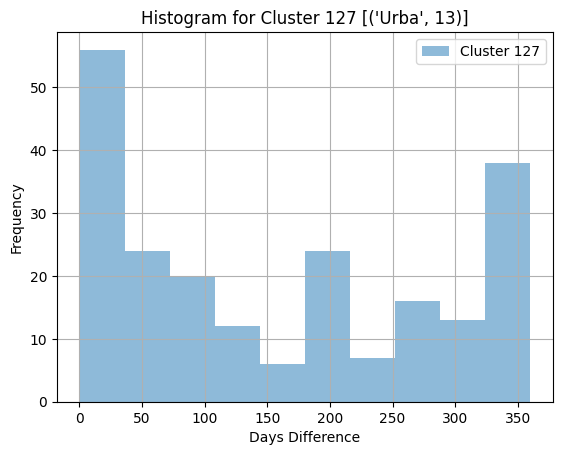

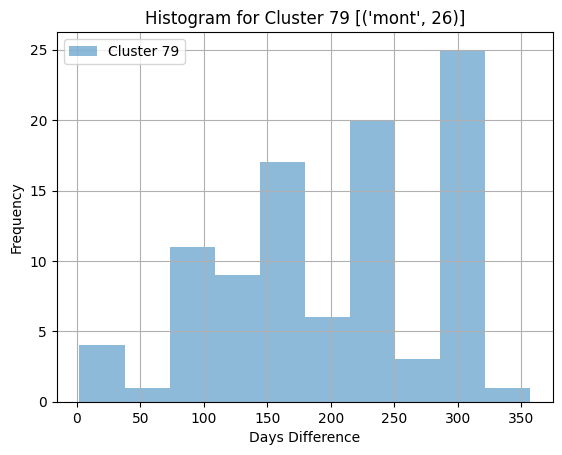

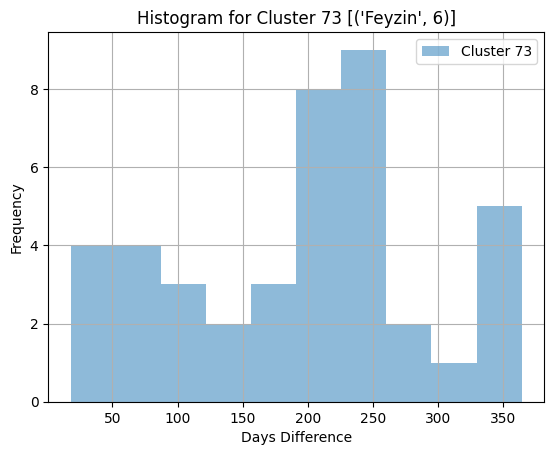

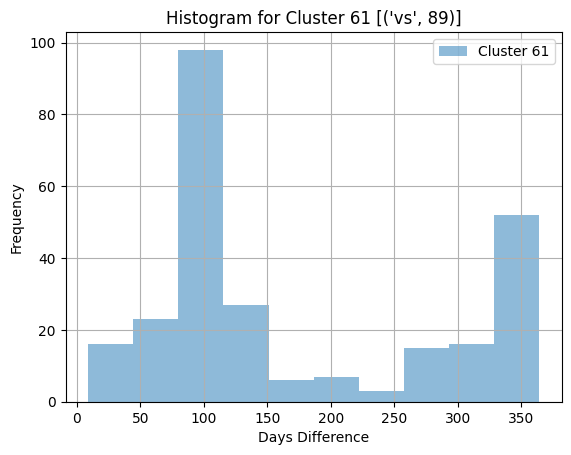

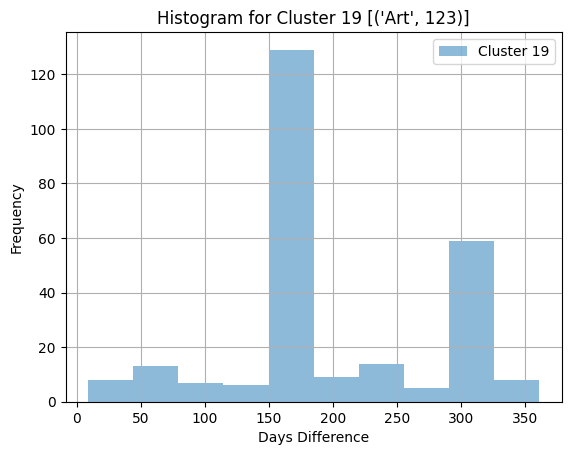

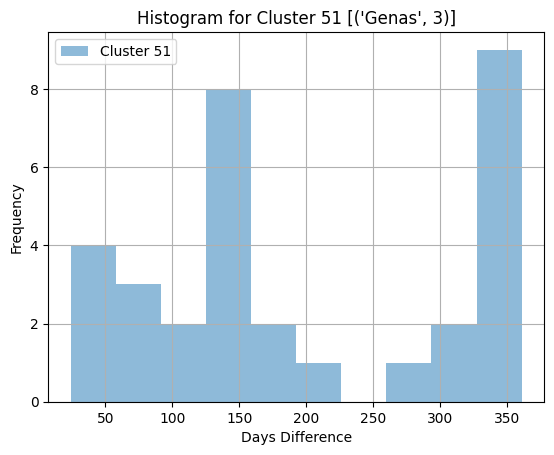

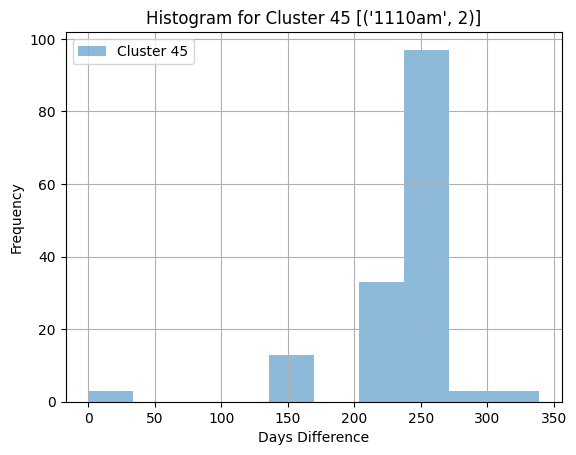

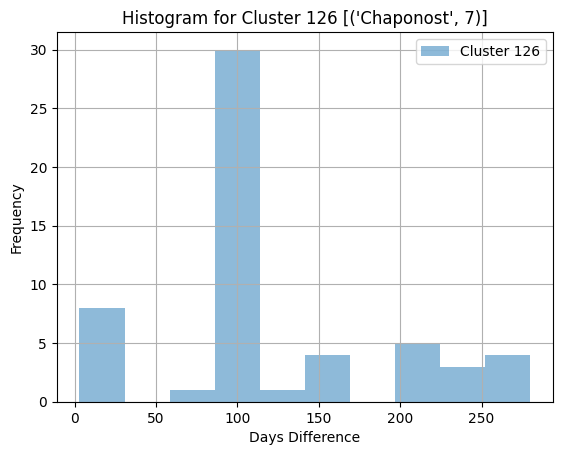

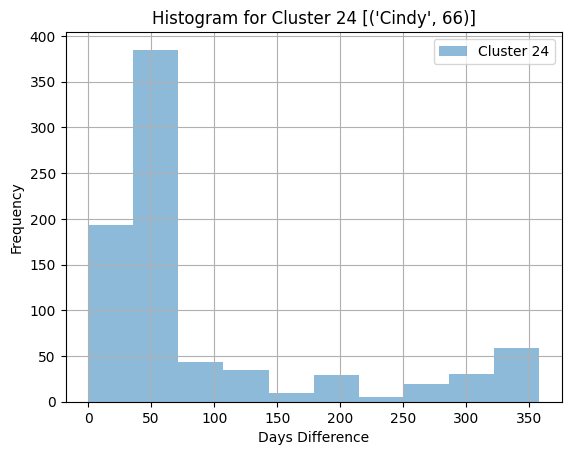

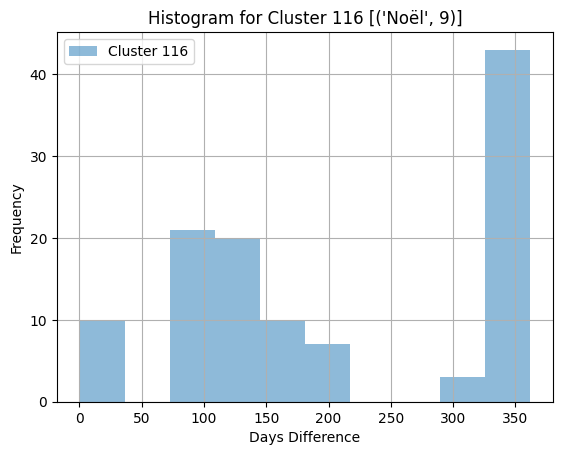

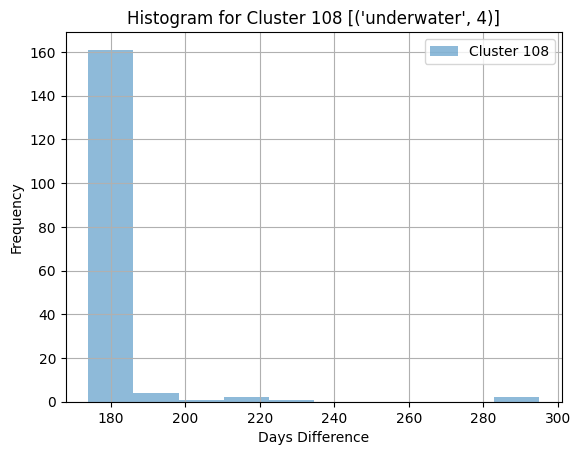

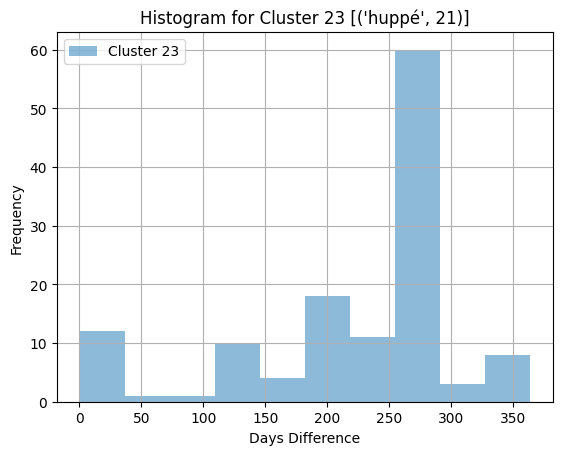

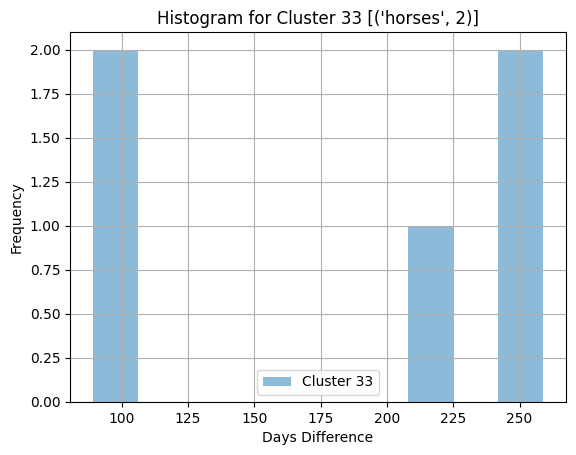

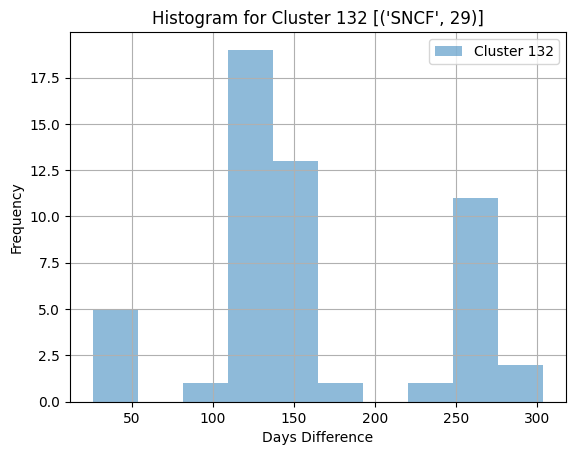

In [30]:
for cluster in data['k-means labels'].unique():
    cluster_data = data[data['k-means labels'] == cluster]
    cluster_title = cluster_data.iloc[0]['common_words']
    plt.figure()
    cluster_data['days_difference'].hist(alpha=0.5, label=f'Cluster {cluster}')
    plt.legend()
    plt.title(f'Histogram for Cluster {cluster} {cluster_title}')
    plt.xlabel('Days Difference')
    plt.ylabel('Frequency')
    plt.show()

In [31]:
data['sin_days_difference'] = np.sin(2 * np.pi * data['days_difference'] / 365)
data.head()

id          user        lat      long  \
0  4395181099  30624617@N03  45.754858  4.821710   
1  4394748717  35853470@N00  45.753270  4.862953   
2  4394694699  11817998@N05  45.760655  4.846564   
3  4394803790  11545749@N06  45.784000  4.874072   
4  4394803554  11545749@N06  45.784000  4.874072   

                                                tags  \
0                 chair,lyon,rhône,chaise,rhônealpes   
1                                                NaN   
2                                         365,iphone   
3       nin,nineinchnails,gift,screening,toiou,avott   
4  lyon,nin,nineinchnails,gift,screening,toiou,avott   

                         title  date_taken_minute  date_taken_hour  \
0             Chaises avec vue               11.0               15   
1                          NaN               51.0               17   
2       59/365 - R46 V103 B163               29.0               17   
3  2010-01-29 Toiou Avott Lyon               15.0               20   
4  2010-01-28 Toiou Avott Lyon               10.0               20   

   date_taken_day  date_taken_month  ...  date_upload_day  date_upload_month  \
0              28                 2  ...             28.0                  2   
1              28                 2  ...             28.0                  2   
2              28                 2  ...             28.0                  2   
3              28                 1  ...             28.0                  2   
4              28                 1  ...             28.0                  2   

   date_upload_year  Unnamed: 16  Unnamed: 17  Unnamed: 18  k-means labels  \
0            2010.0          NaN          NaN          NaN              39   
1            2010.0          NaN          NaN          NaN             117   
2            2010.0          NaN          NaN          NaN               3   
3            2010.0          NaN          NaN          NaN              87   
4            2010.0          NaN          NaN          NaN              87   

                  common_words  days_difference  sin_days_difference  
0              [('Saône', 44)]               58             0.840618  
1  [('DoctorWhoClassic', 109)]               58             0.840618  
2            [('Incity', 170)]               58             0.840618  
3              [('Karna', 79)]               27             0.448229  
4              [('Karna', 79)]               27             0.448229  

[5 rows x 23 columns]

In [51]:
# Scale the data
columns_to_drop = ['id', 'user', 'tags', 'title',  'date_taken_minute', 'date_taken_hour', 'date_taken_day', 'date_taken_month', 'date_taken_year', 'date_upload_minute', 'date_upload_hour', 'date_upload_day', 'date_upload_month', 'date_upload_year', 'Unnamed: 16', 'Unnamed: 17',	'Unnamed: 18', 'common_words', 'days_difference', 'k-means labels']
df_clustering = data.drop(columns_to_drop , axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
# show
print(scaled_data)
# create a DataFrame
scaled_data_df = pd.DataFrame(data=scaled_data, columns=df_clustering.columns)
scaled_data_df.head()

[[-0.46995661 -0.55310648  1.2624814 ]
 [-0.52557343  0.72670216  1.2624814 ]
 [-0.26692721  0.21813625  1.2624814 ]
 ...
 [-0.1617876  -0.10930212 -1.37938324]
 [-0.1617876  -0.10930212 -1.37938324]
 [-0.35357457 -0.23482223 -1.38076638]]


lat      long  sin_days_difference
0 -0.469957 -0.553106             1.262481
1 -0.525573  0.726702             1.262481
2 -0.266927  0.218136             1.262481
3  0.550689  1.071735             0.698642
4  0.550689  1.071735             0.698642

In [86]:
# number of clusters 
k = 160 #250
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(scaled_data_df)

KMeans(n_clusters=160)

In [87]:
# associated cluster labels
labels = kmeans.labels_
print(f"k-means labels: {labels}")

k-means labels: [ 33 148 128 ...  11  11  42]


In [88]:
# sum of squared distances
inertia = kmeans.inertia_
print(f"Sum of squared distances: {inertia}")

Sum of squared distances: 8276.019174595067


In [89]:
# Group by 'k-means labels' and calculate the statistics
data['time k-means labels'] = labels
cluster_stats = data.groupby('time k-means labels')['sin_days_difference'].agg(['min', 'max', 'mean', 'median'])

# Display the statistics
print(cluster_stats)

                          min       max      mean    median
time k-means labels                                        
0                   -0.587785 -0.263665 -0.401458 -0.401488
1                    0.655156  0.999991  0.903350  0.924291
2                    0.635432  0.849817  0.738319  0.729558
3                   -0.999250 -0.369725 -0.747779 -0.863142
4                   -0.999991 -0.680773 -0.896753 -0.961130
...                       ...       ...       ...       ...
155                  0.729558  0.999991  0.908457  0.884068
156                  0.440519  0.998435  0.835543  0.910605
157                 -0.440519  0.393590 -0.042914 -0.034422
158                 -0.552435 -0.263665 -0.400462 -0.401488
159                 -0.247022  0.060213 -0.096533 -0.094537

[160 rows x 4 columns]


In [93]:
unique_time_clusters = data.groupby('k-means labels')['time k-means labels'].unique()
print(unique_time_clusters)
print(unique_time_clusters[79])

k-means labels
0      [111, 46, 114, 69, 20, 132, 122, 127, 6, 93, 0...
1                                         [8, 74, 4, 88]
2                 [2, 58, 45, 134, 141, 5, 27, 129, 105]
3      [128, 110, 64, 71, 53, 90, 101, 29, 136, 152, ...
6                                 [106, 117, 43, 18, 94]
                             ...                        
145             [65, 78, 105, 2, 129, 58, 45, 27, 91, 5]
146                           [41, 36, 144, 81, 118, 52]
147         [79, 41, 135, 154, 36, 115, 81, 26, 57, 144]
148                   [102, 79, 9, 37, 44, 115, 57, 154]
149                    [72, 146, 156, 95, 109, 121, 145]
Name: time k-means labels, Length: 147, dtype: object
[ 45  58 105 141   5   2 129  27 143]


In [98]:
unique_time_clusters = data.groupby('time k-means labels')['common_words'].unique()
unique_time_clusters

time k-means labels
0      [[('Fourvière', 265)], [('Fourvière', 1730)], ...
1      [[('Parc', 322)], [('Brotteaux', 75)], [('Tatt...
2      [[('Chaos', 8268)], [('Mont', 23)], [('LAbbaye...
3      [[('Grand', 64)], [('huppé', 21)], [('SNCF', 2...
4      [[('today', 4)], [('Touch', 636)], [('Concept'...
                             ...                        
155    [[('art', 29)], [('Barbe', 86)], [('Bocuse', 8...
156    [[('Petit', 25)], [('SNCF', 24)], [('Oullins',...
157    [[('20100325tassaux_jlc', 11)], [('Grand', 64)...
158    [[('Jean', 704)], [('Georges', 130)], [('Saône...
159    [[('Bellecour', 821)], [('Rhône', 213)], [('Ré...
Name: common_words, Length: 160, dtype: object

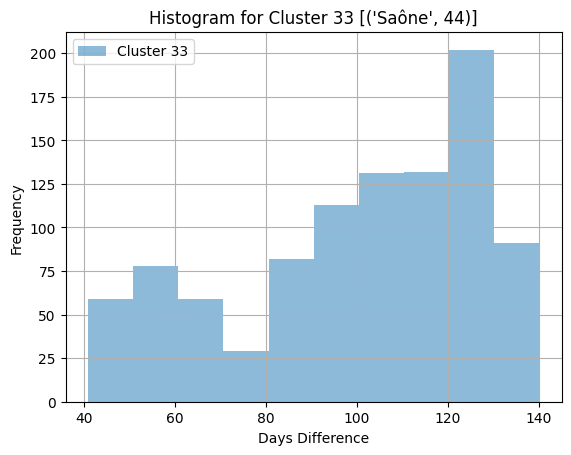

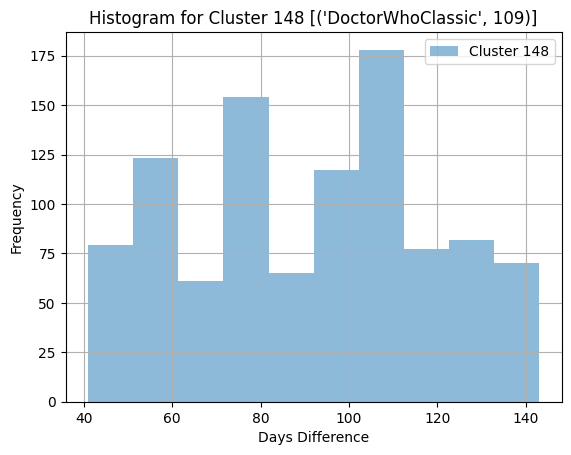

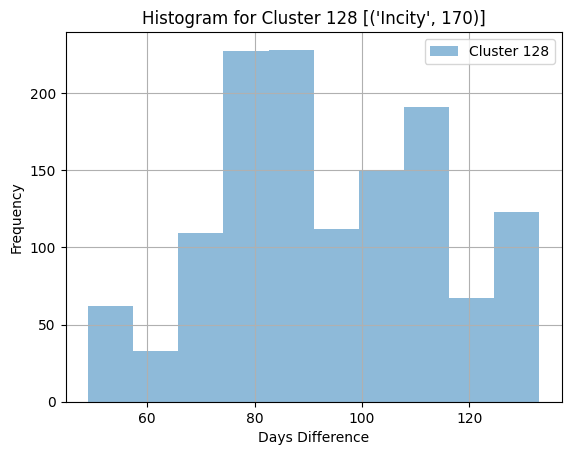

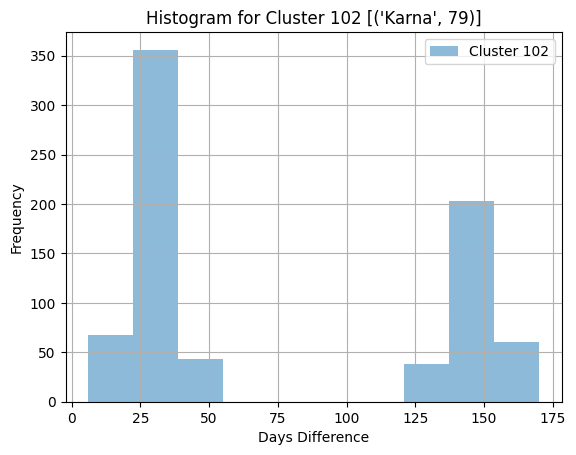

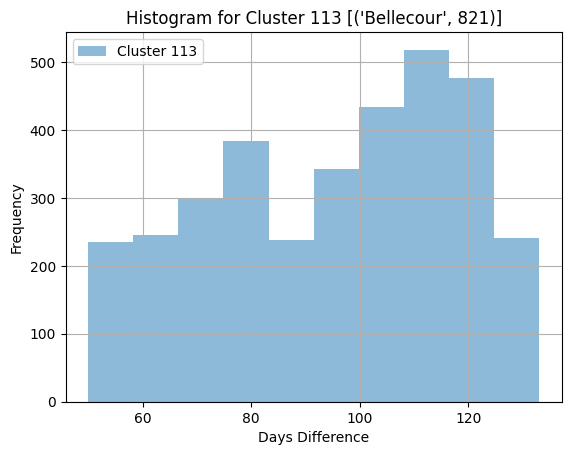

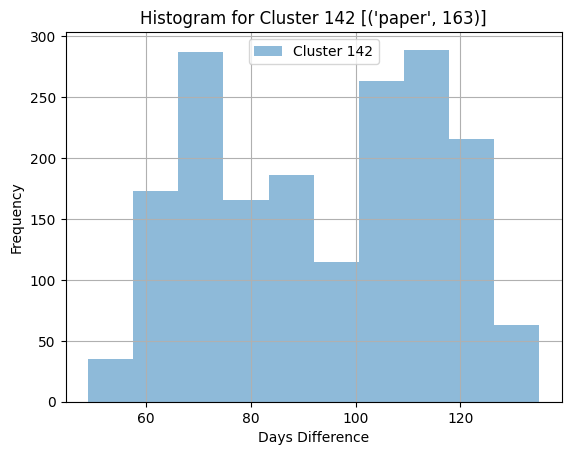

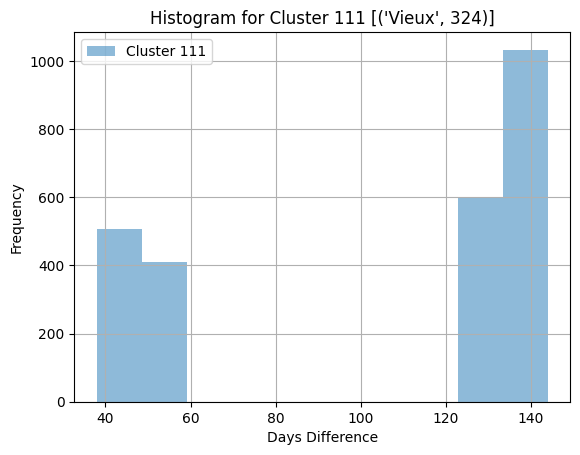

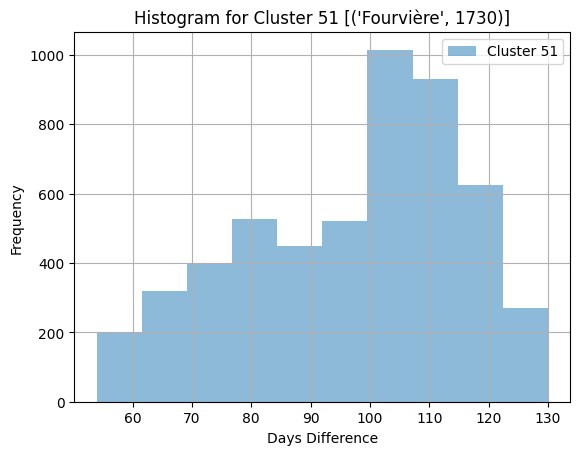

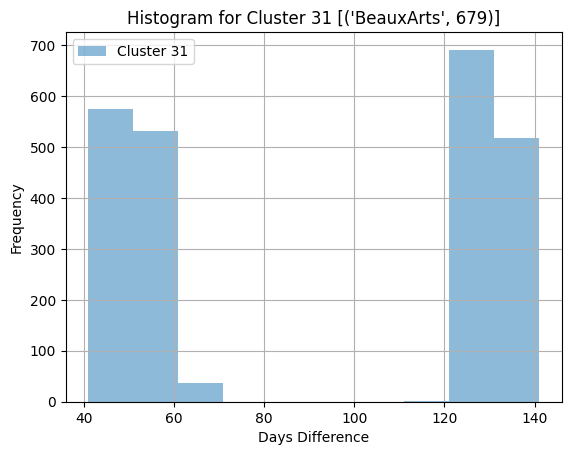

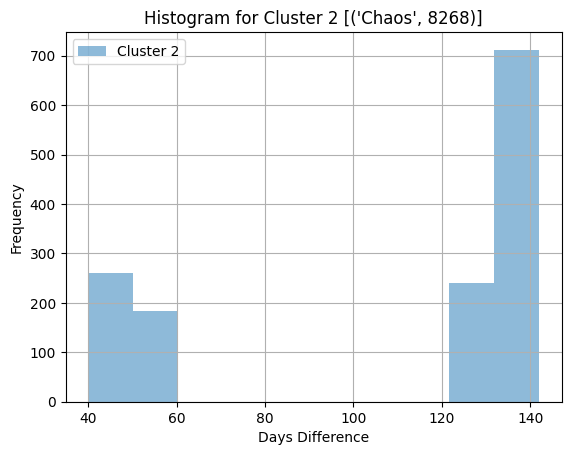

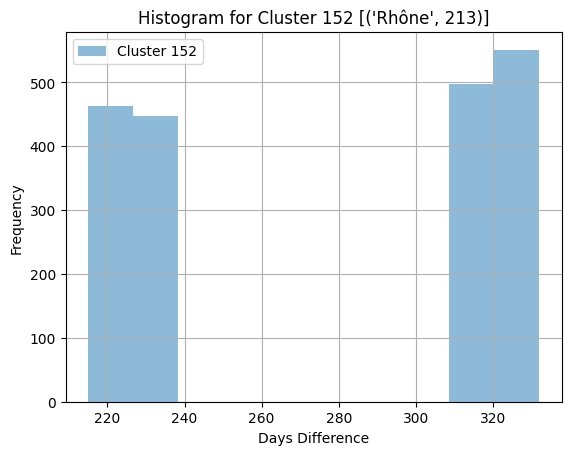

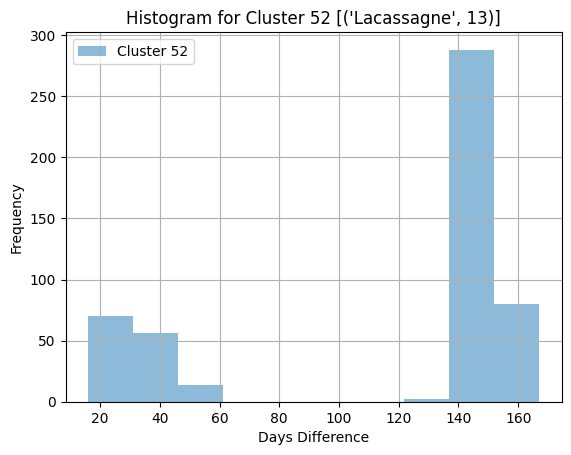

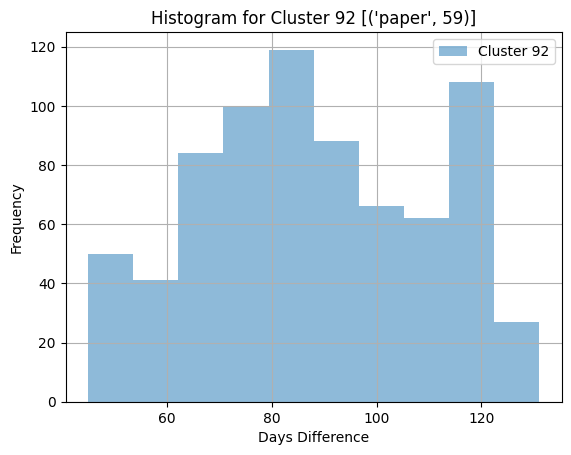

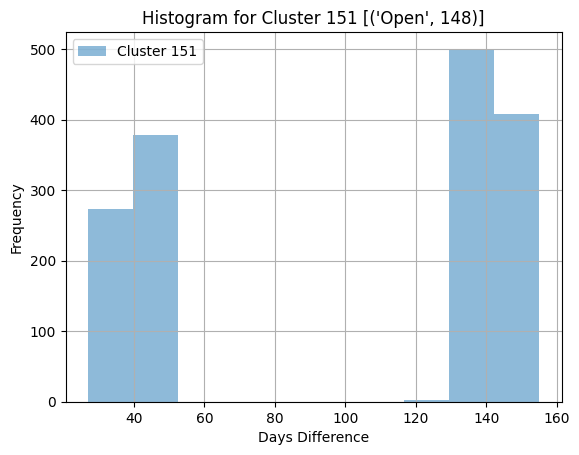

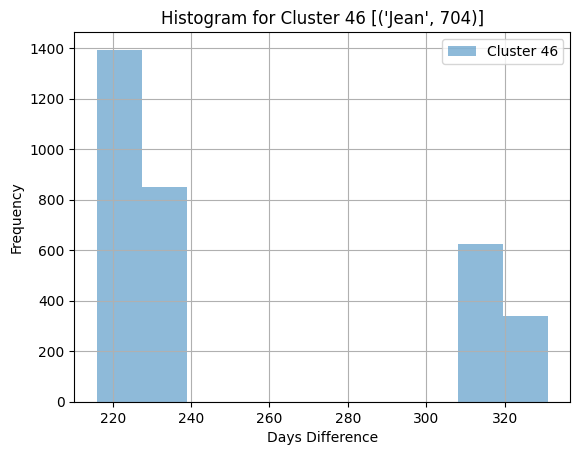

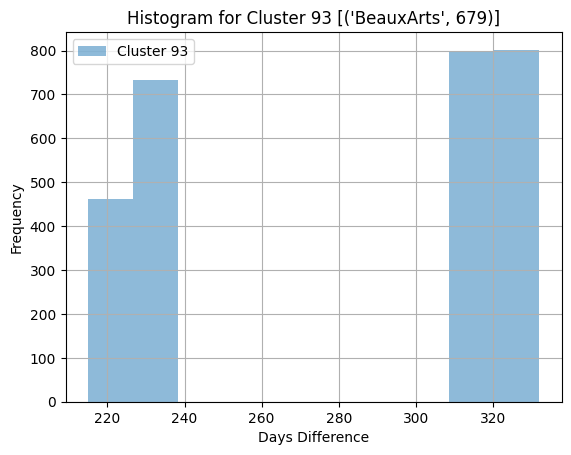

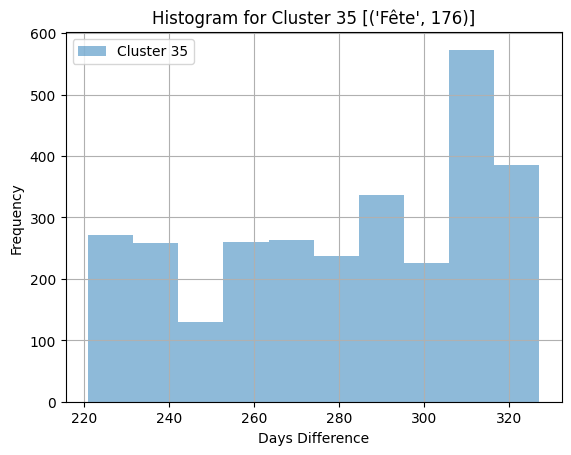

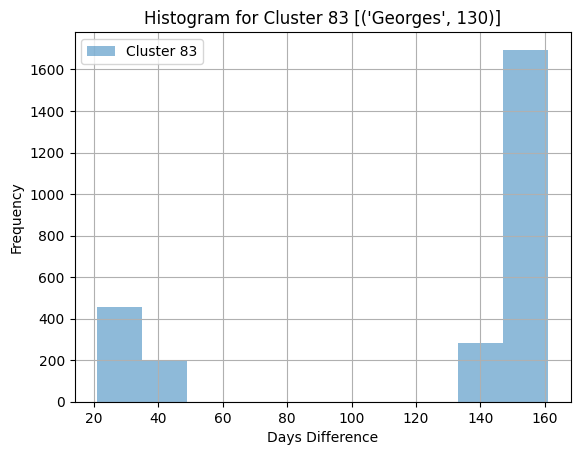

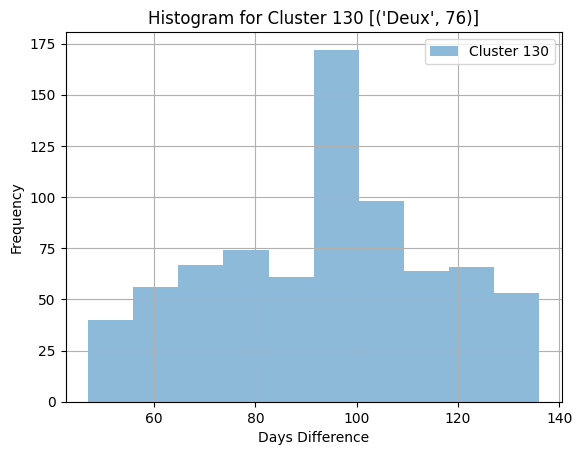

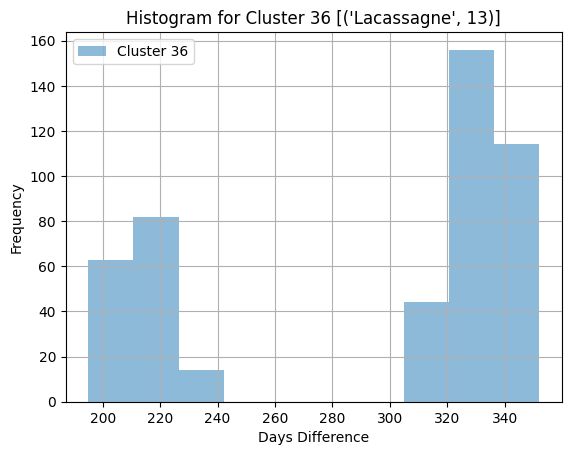

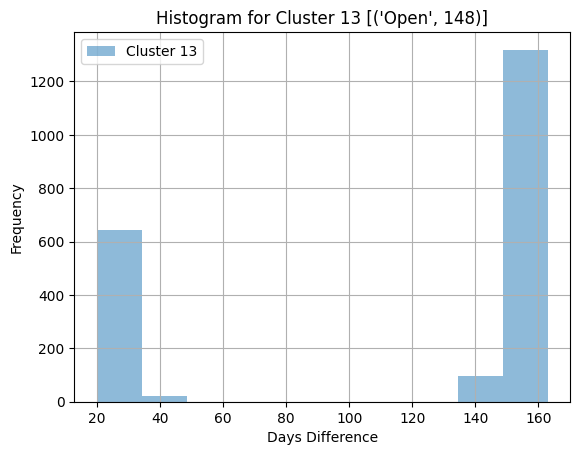

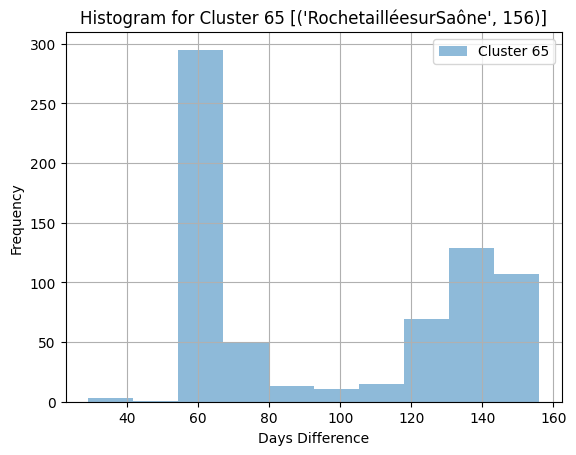

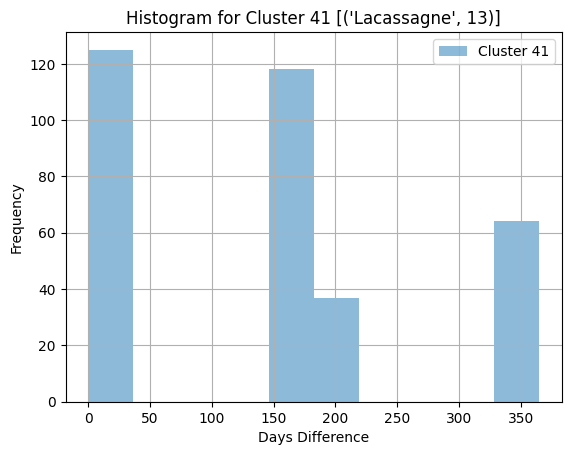

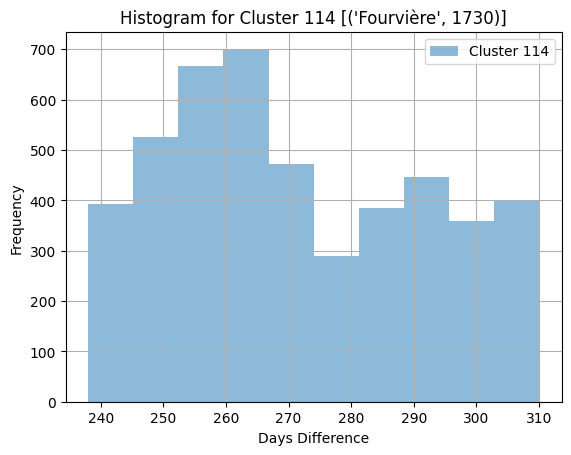

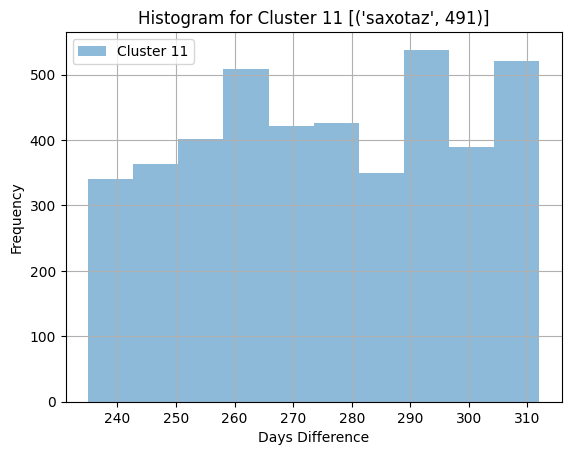

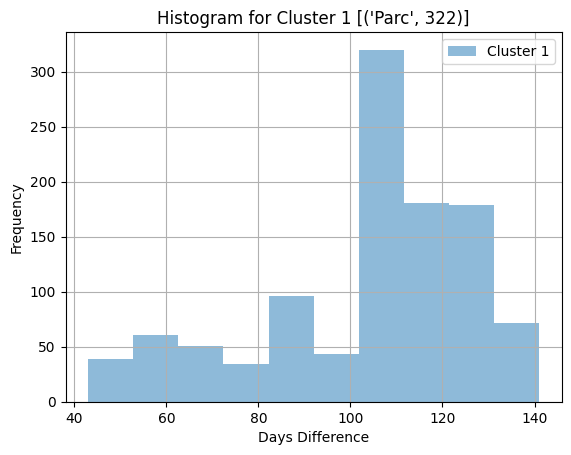

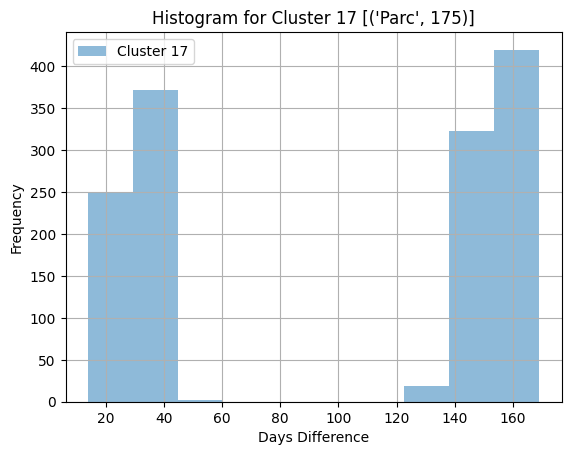

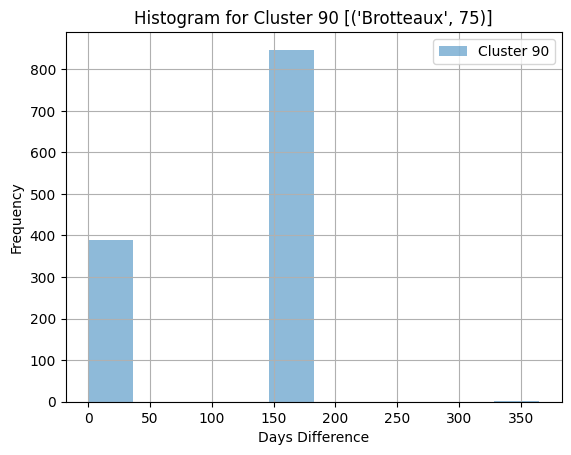

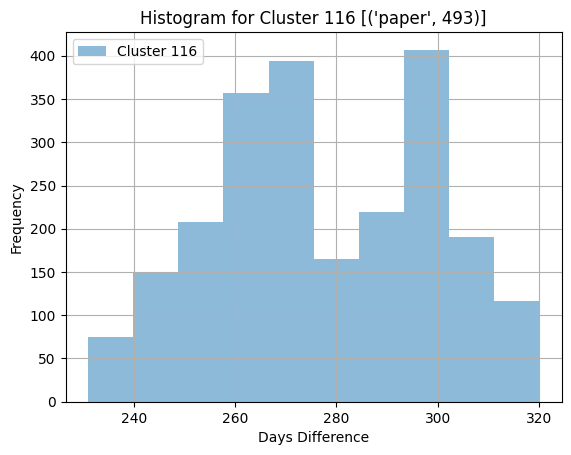

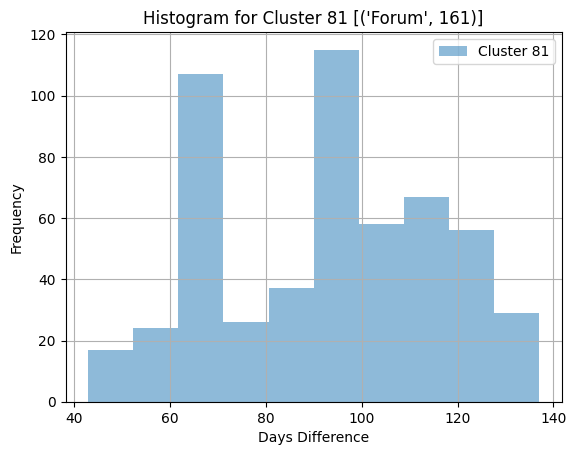

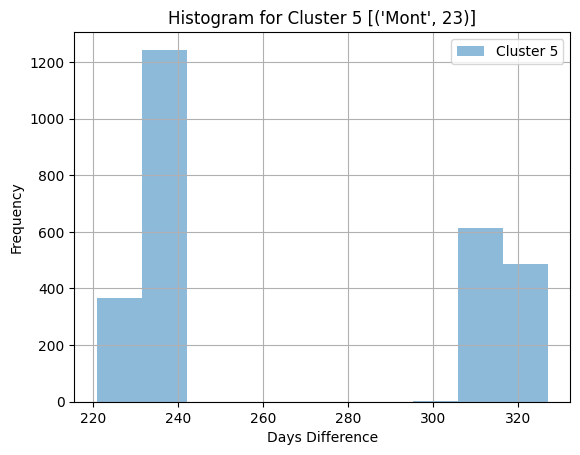

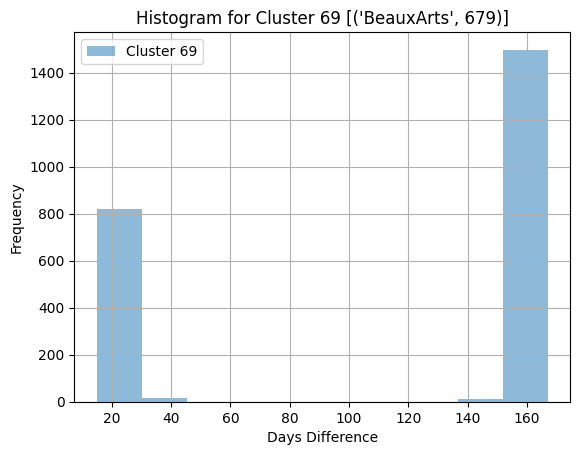

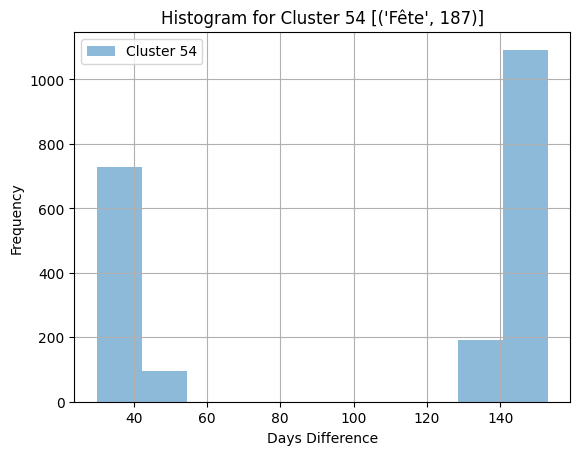

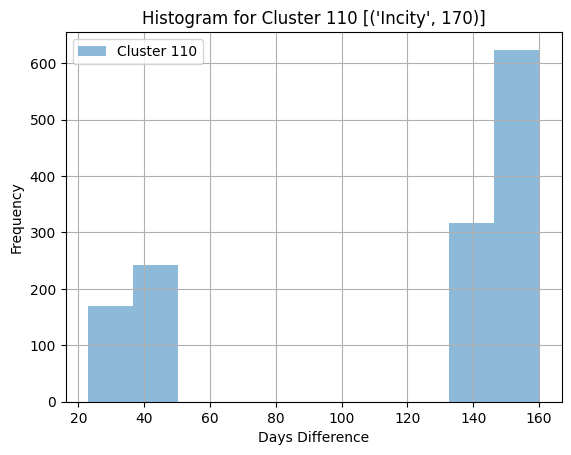

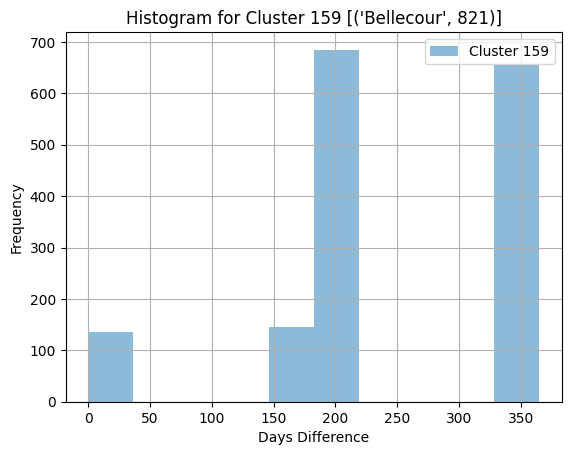

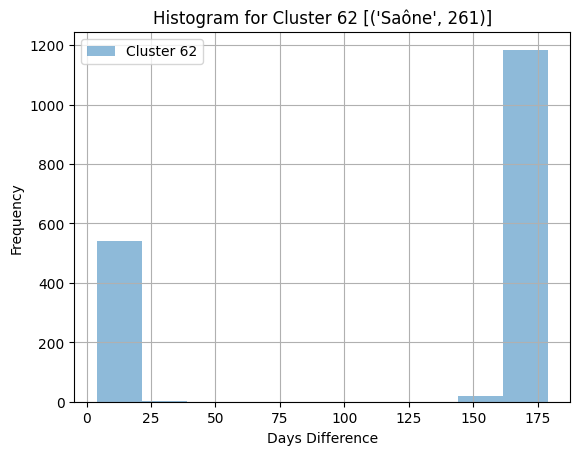

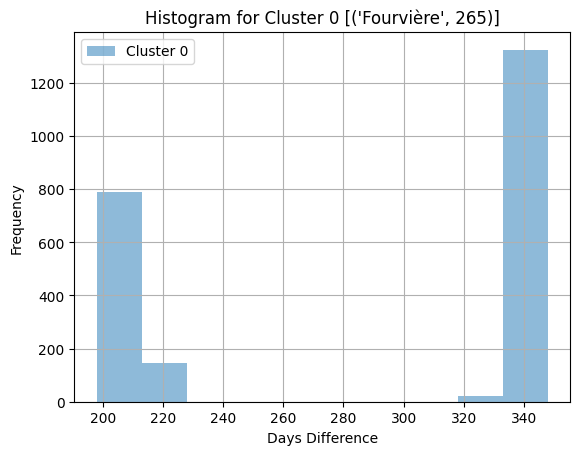

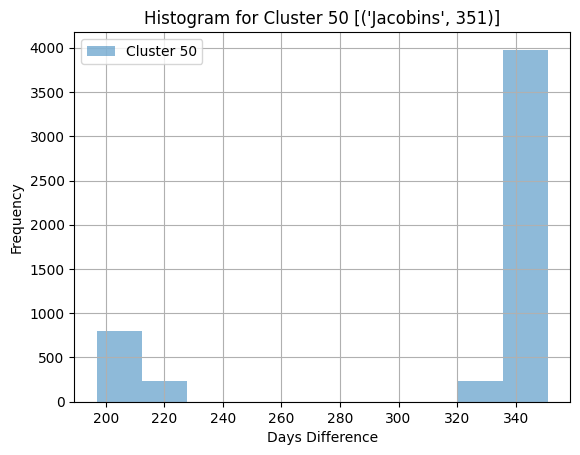

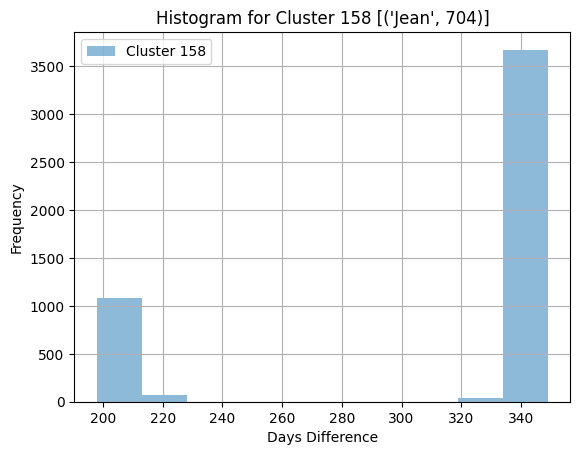

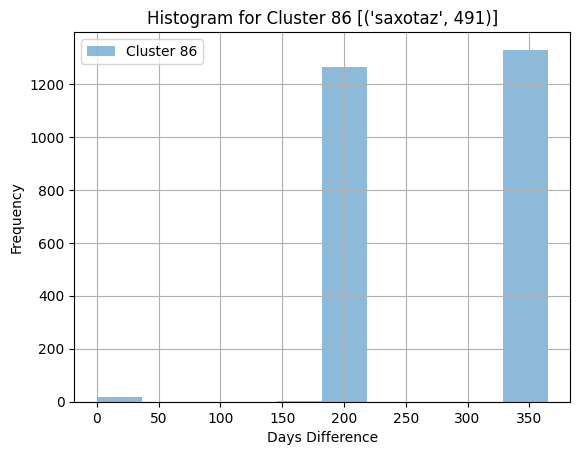

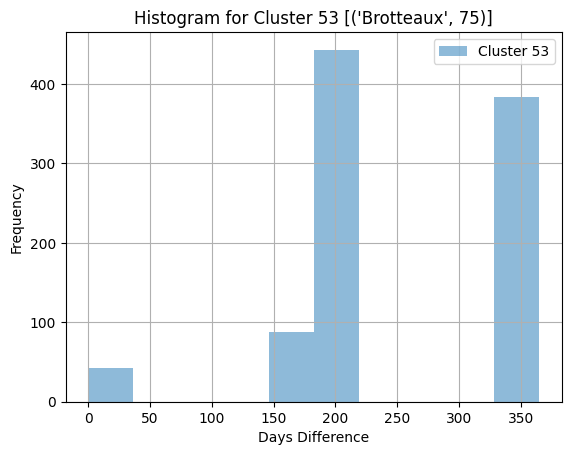

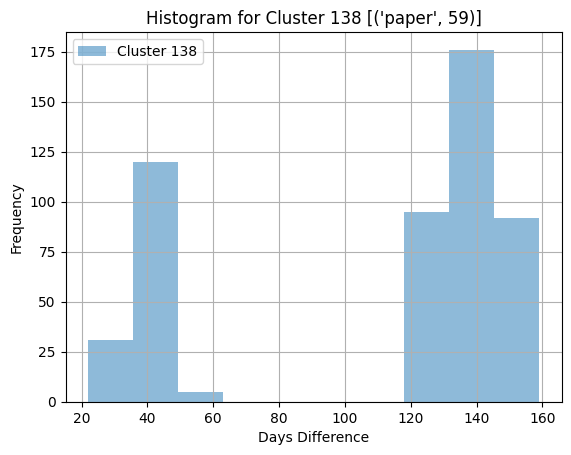

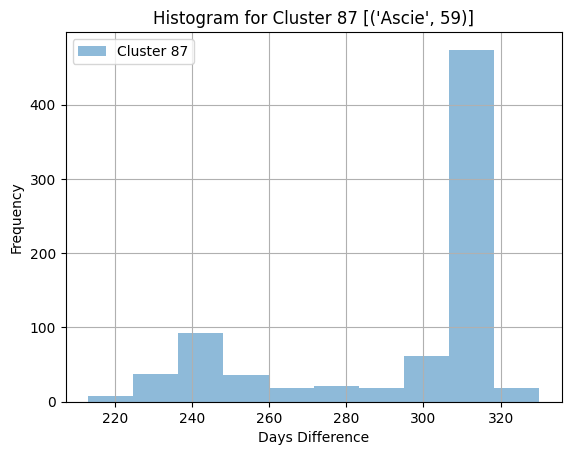

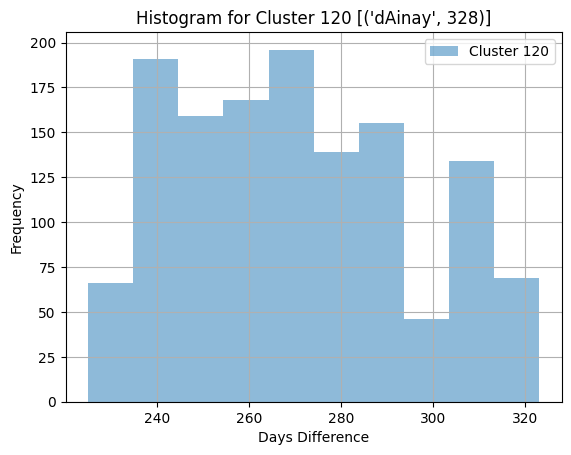

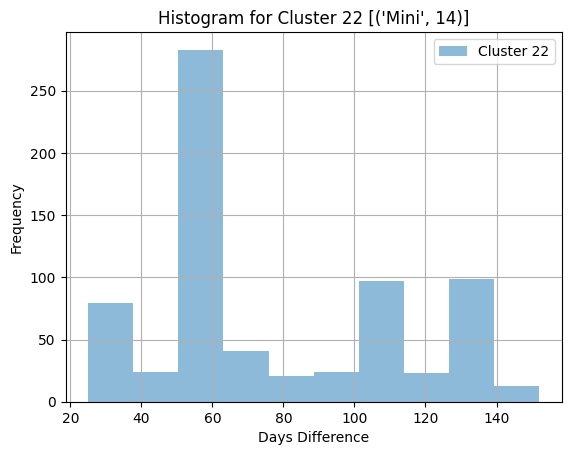

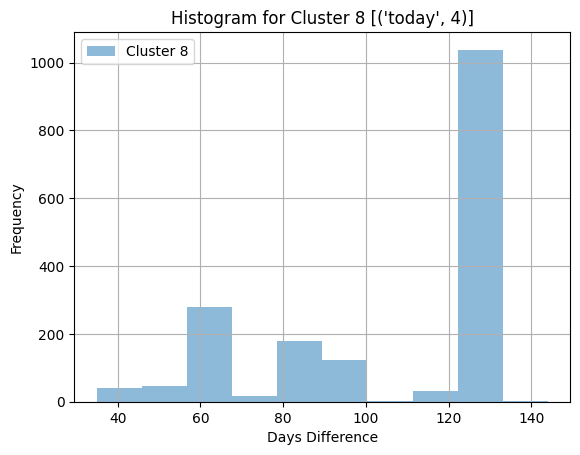

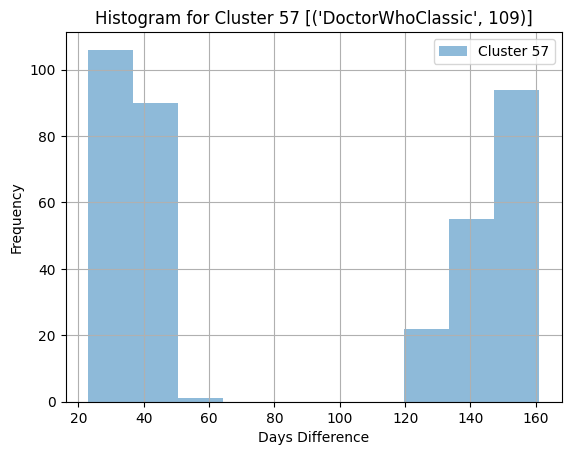

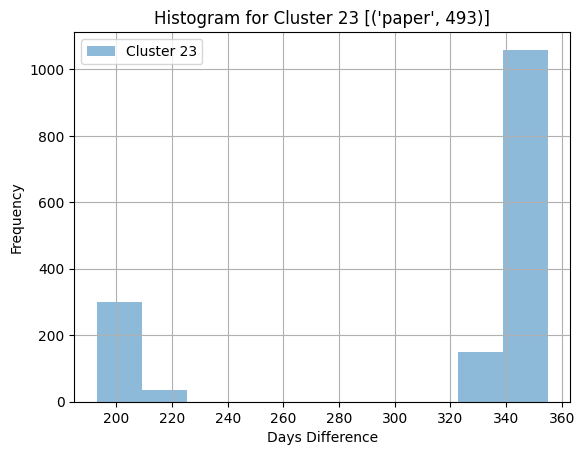

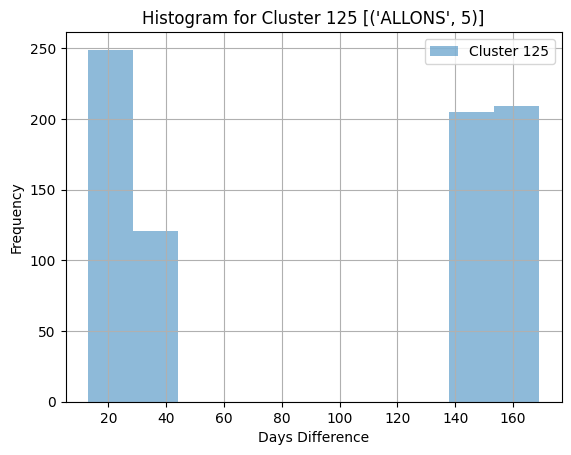

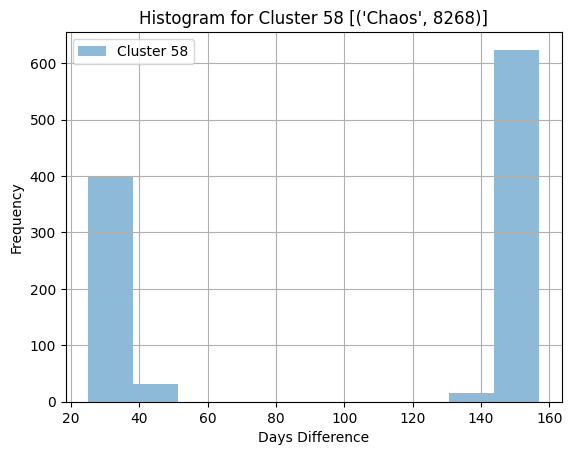

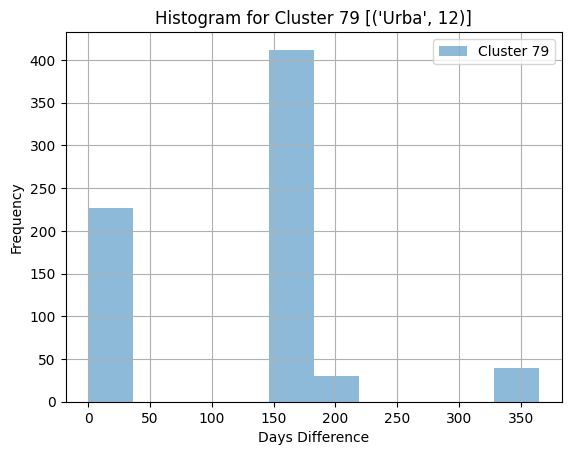

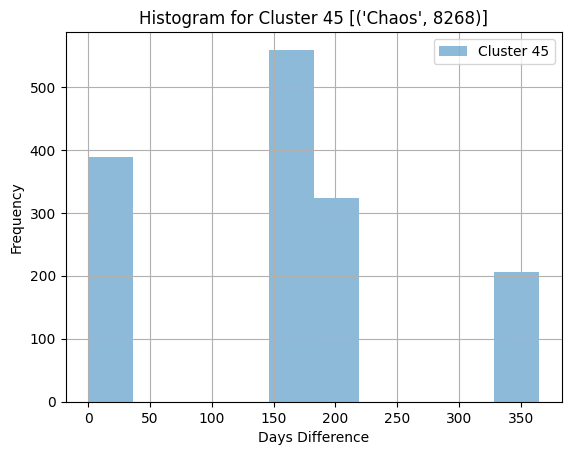

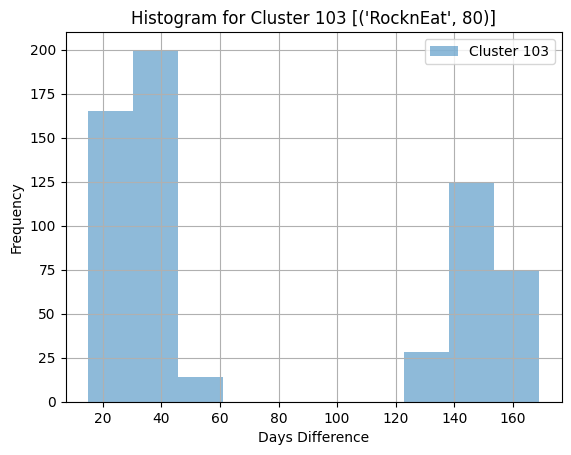

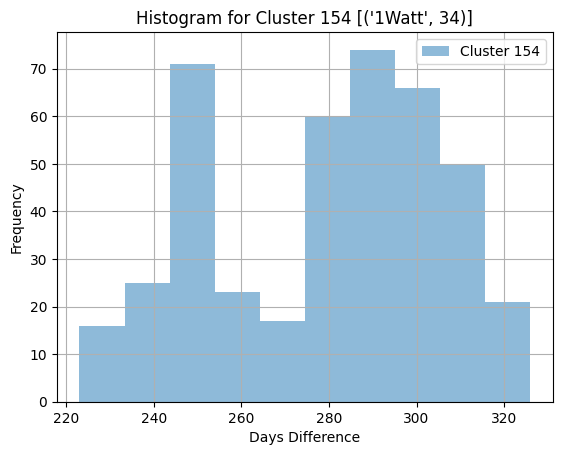

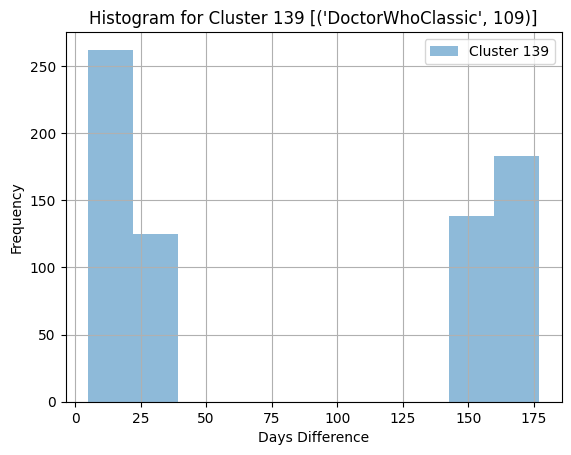

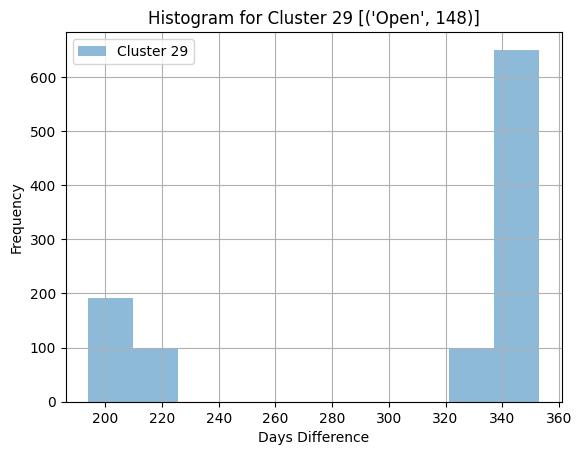

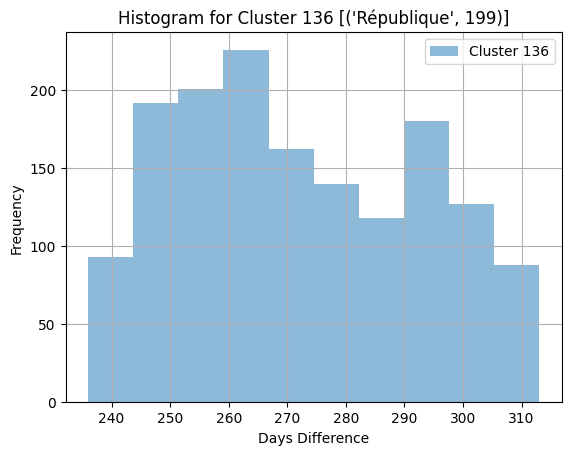

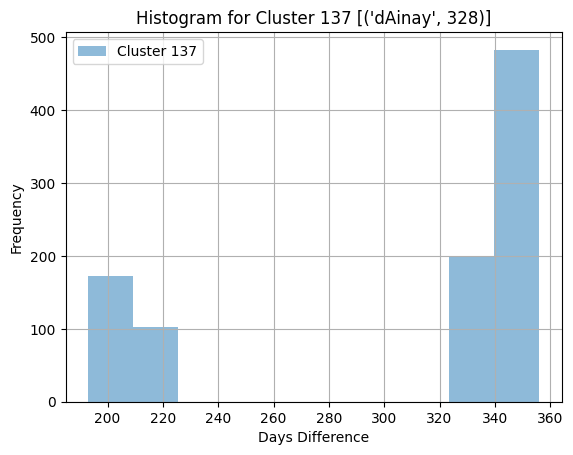

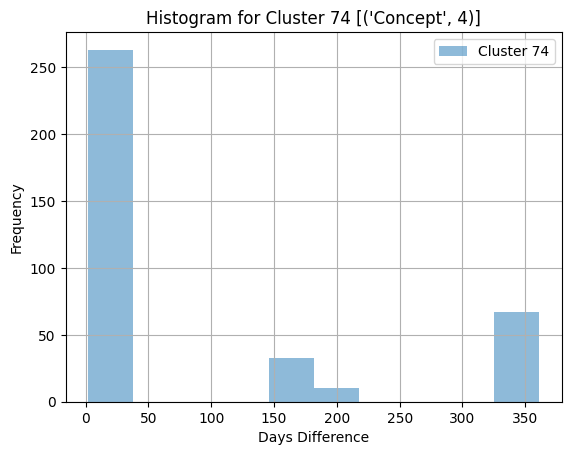

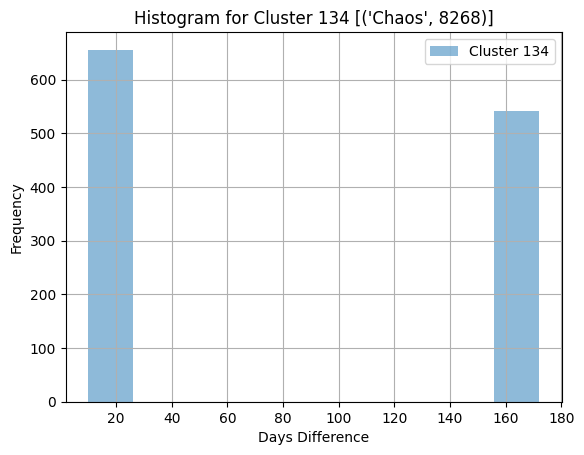

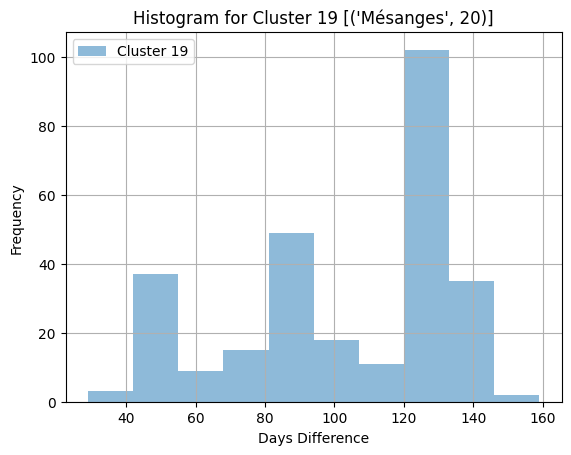

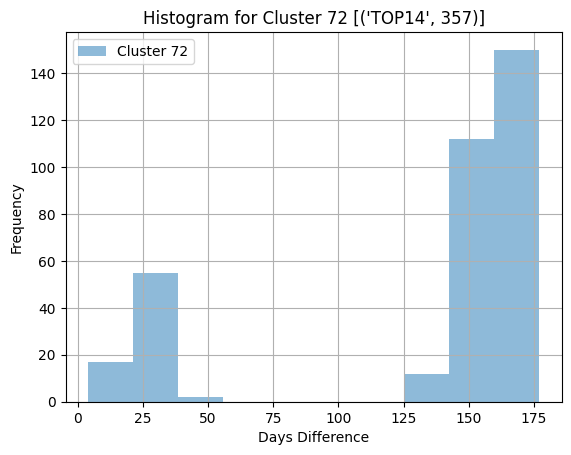

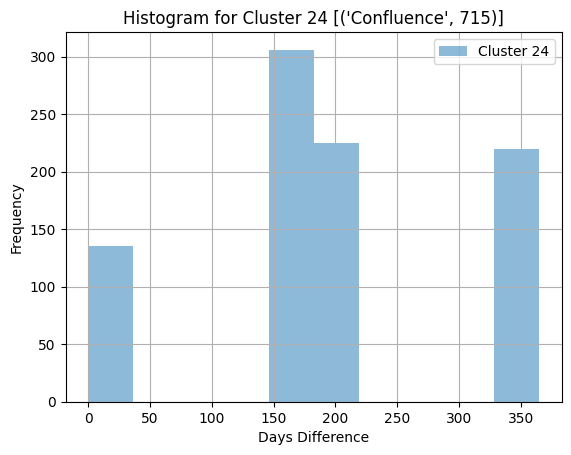

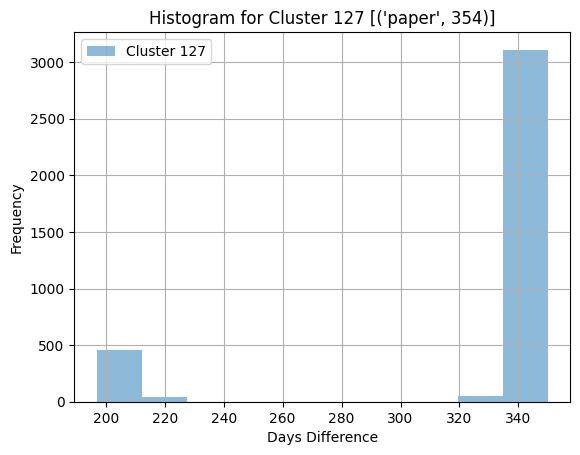

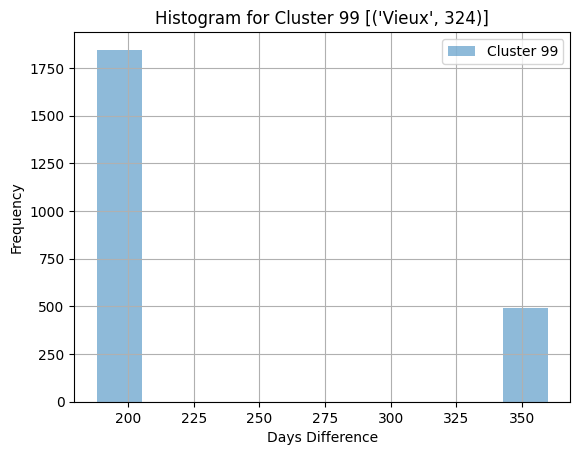

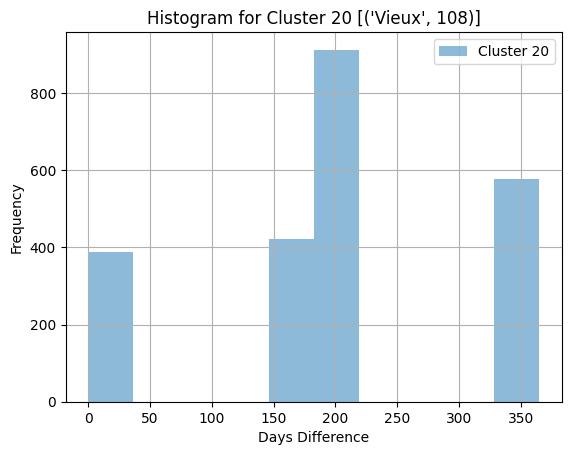

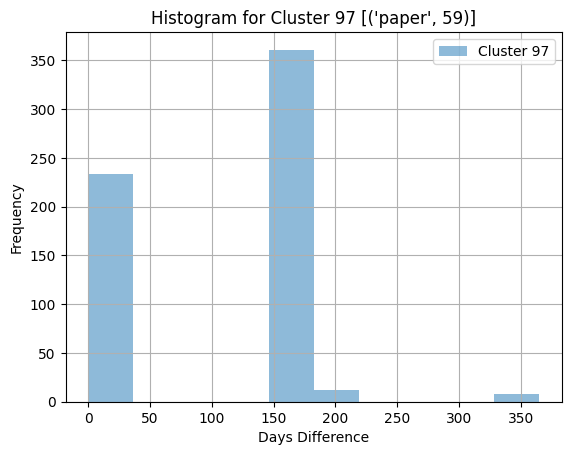

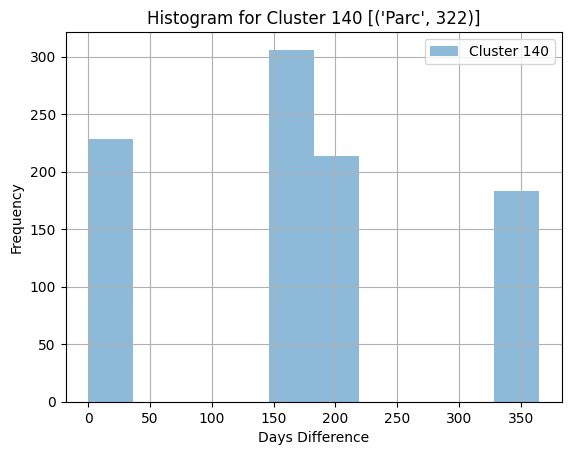

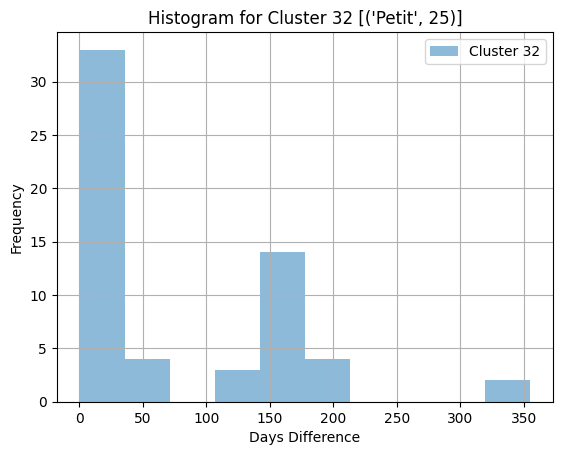

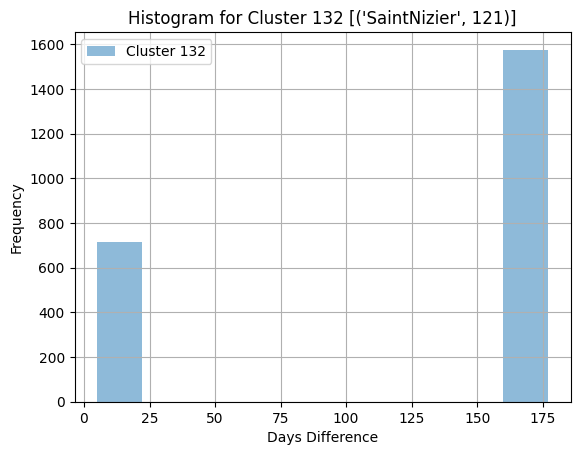

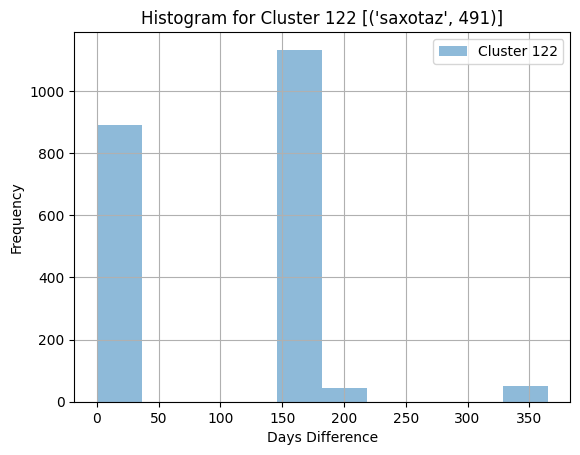

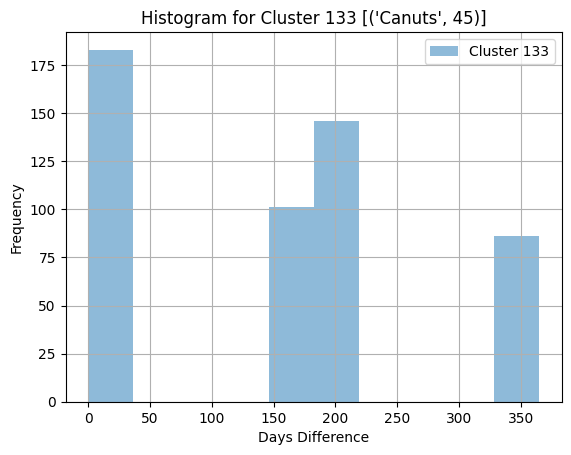

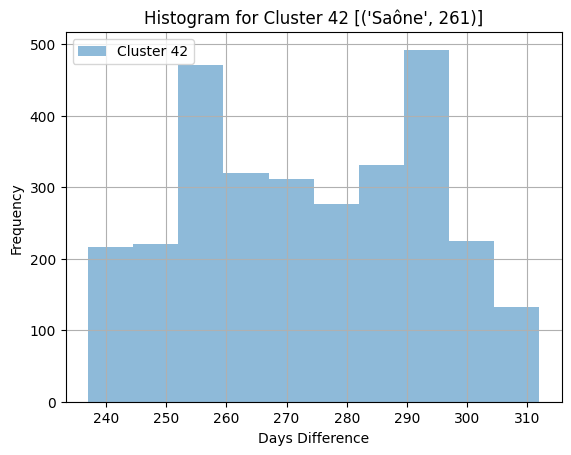

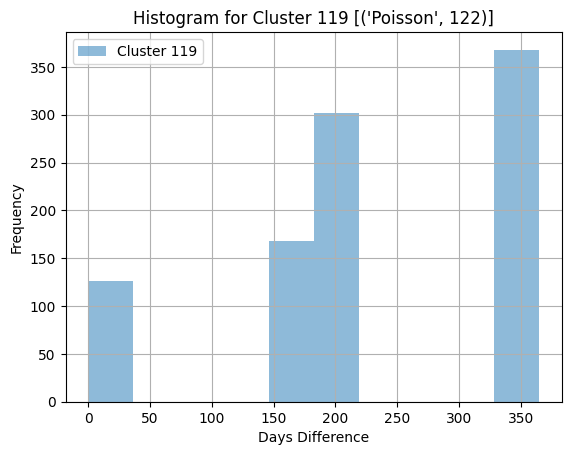

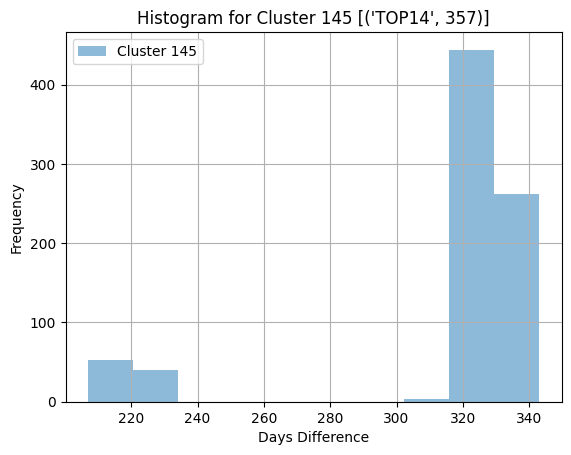

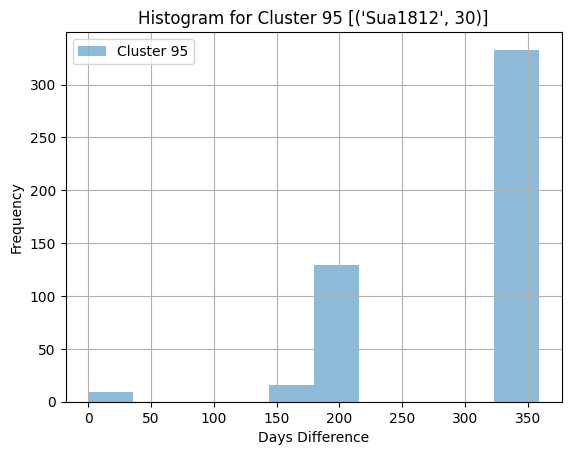

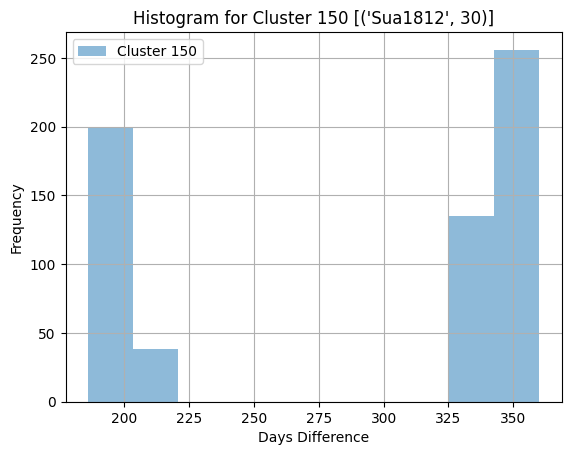

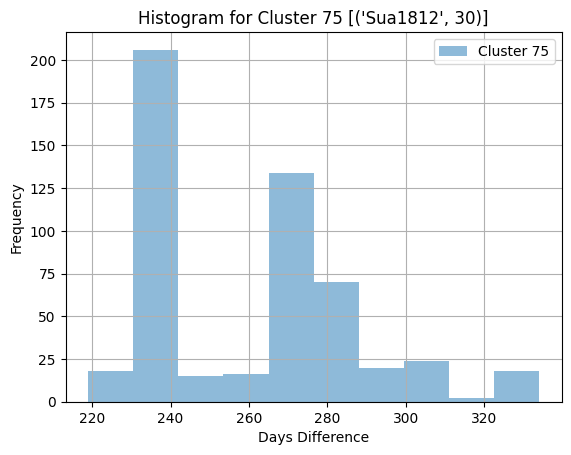

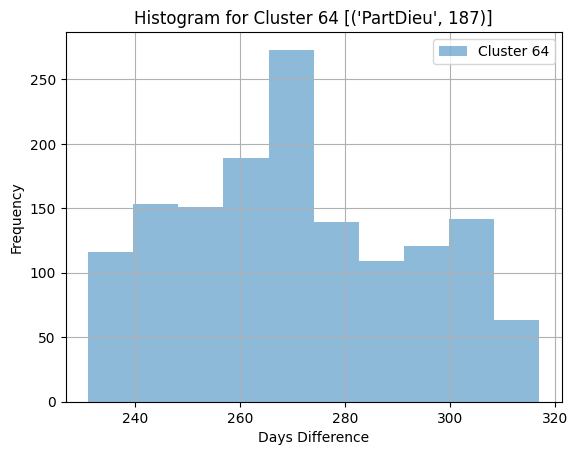

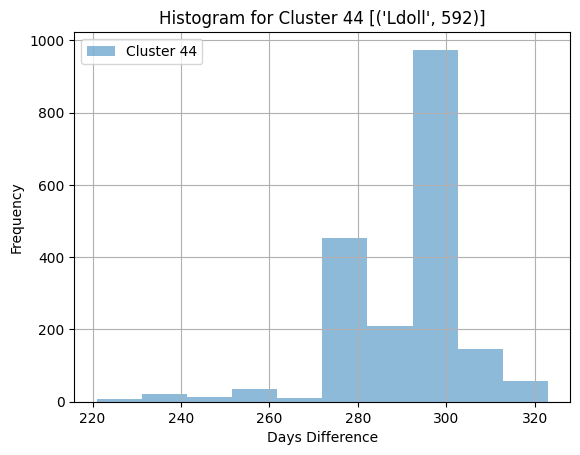

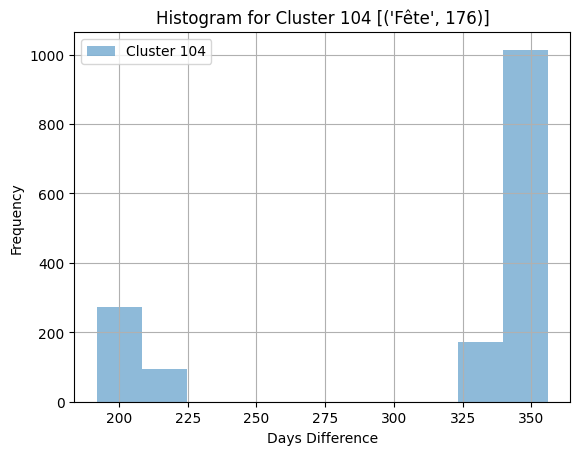

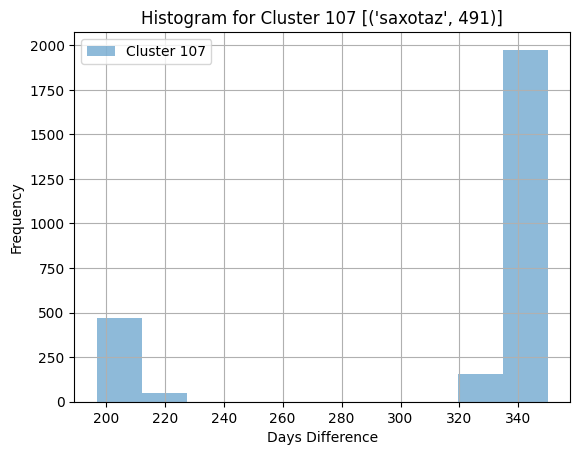

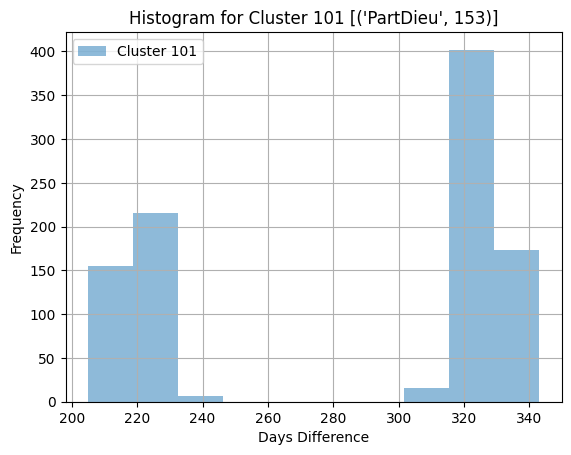

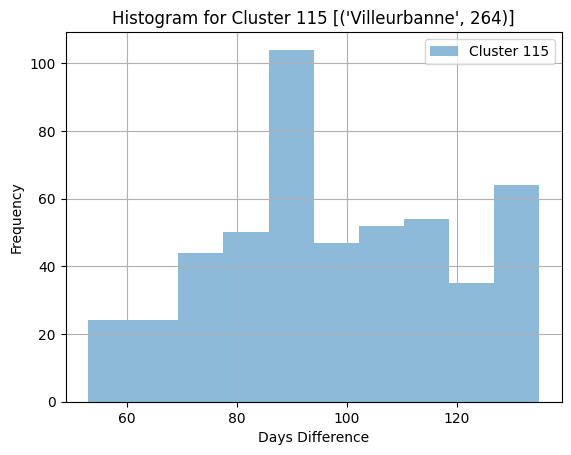

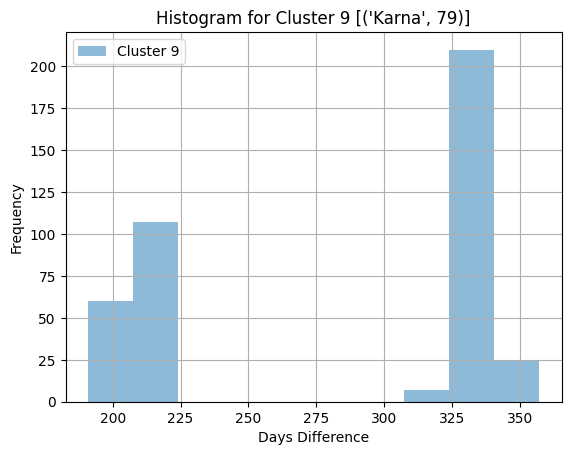

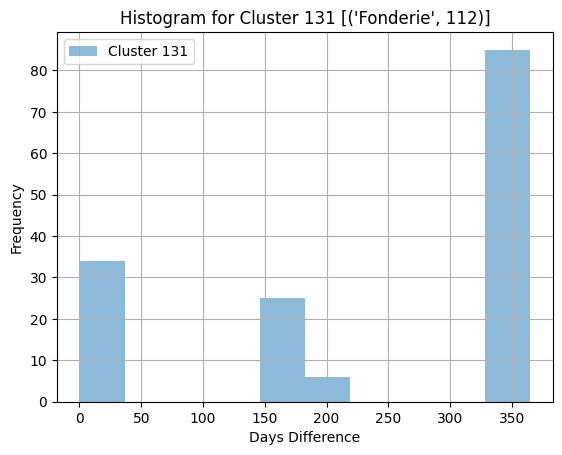

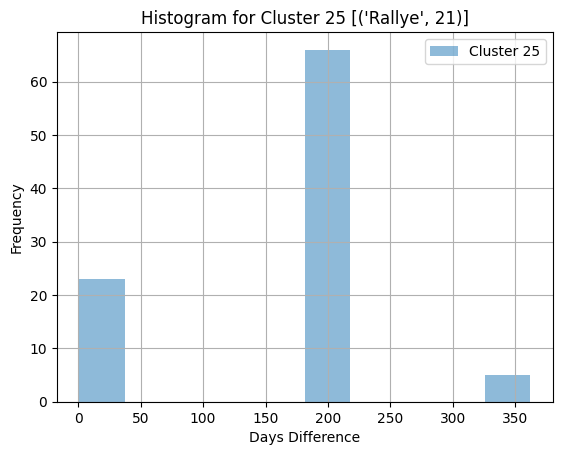

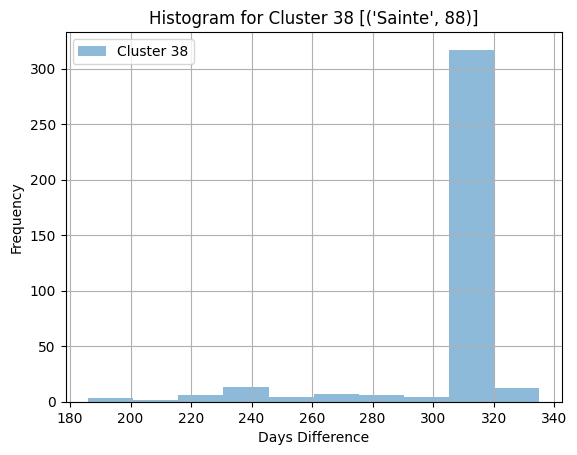

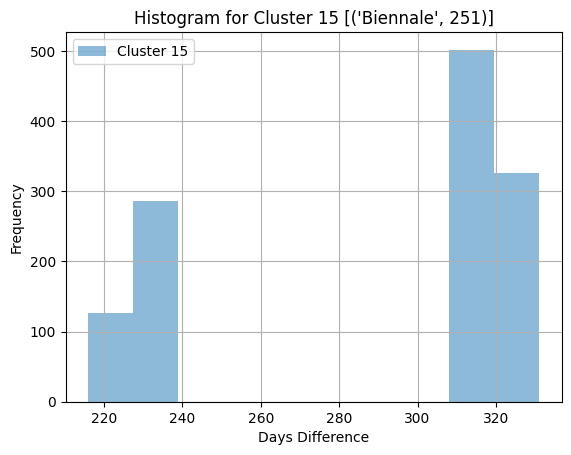

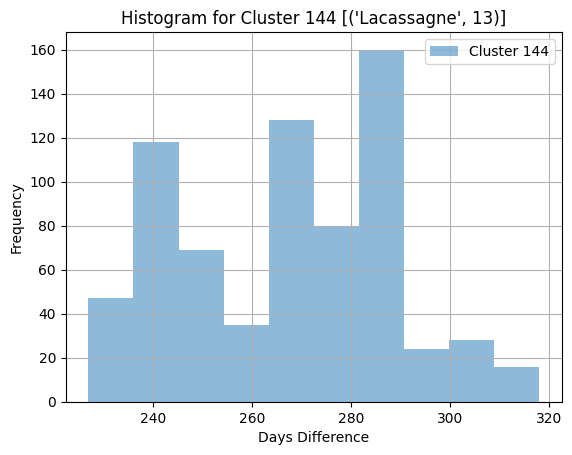

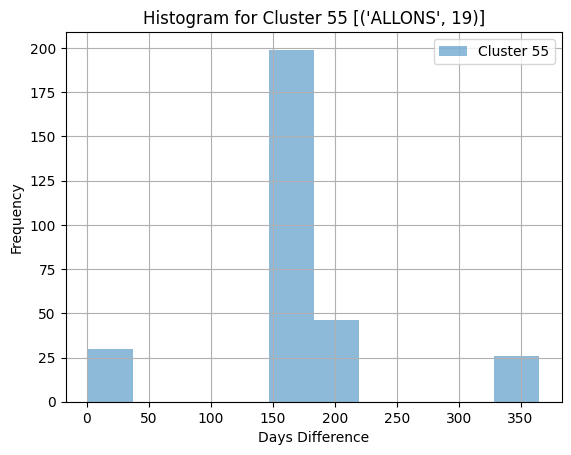

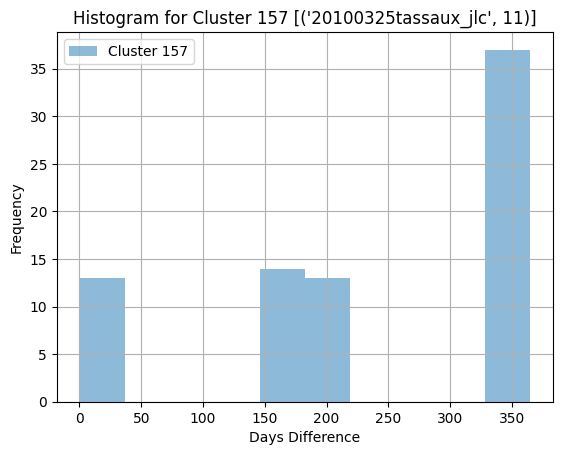

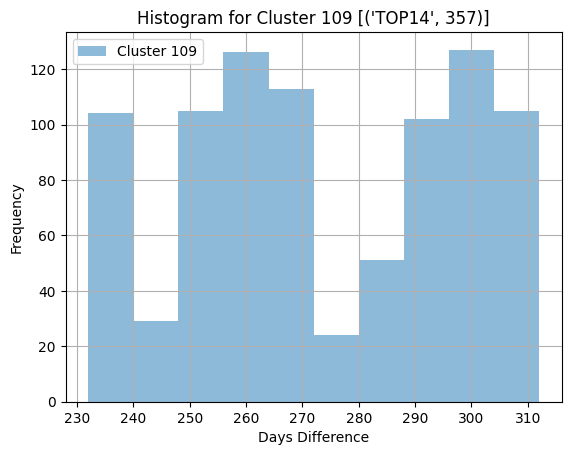

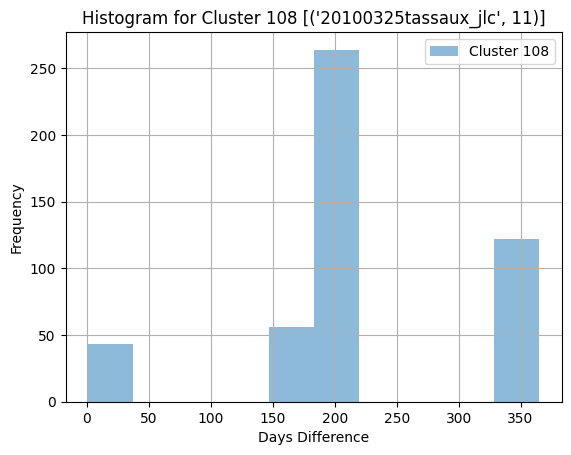

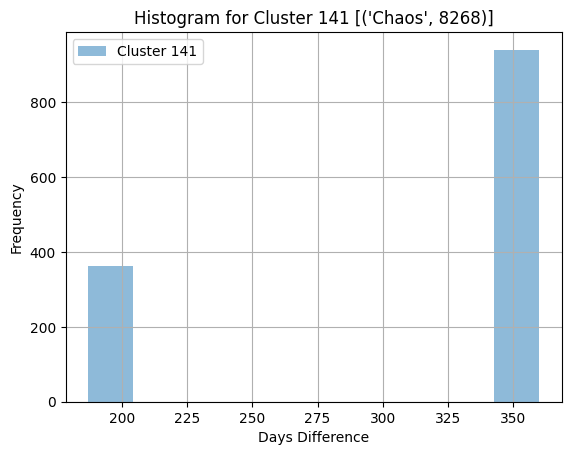

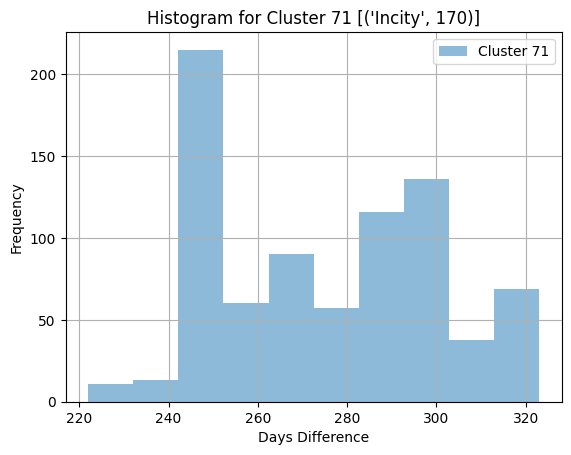

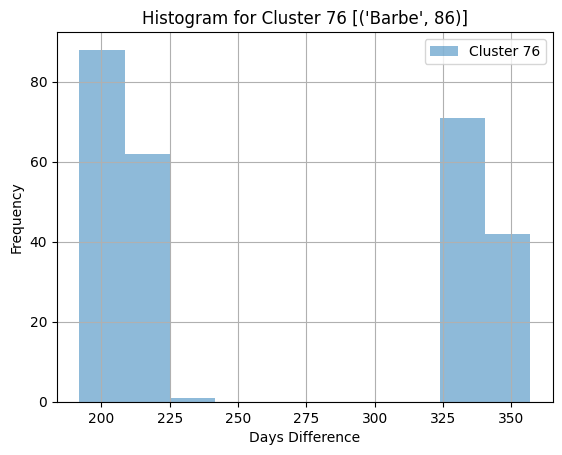

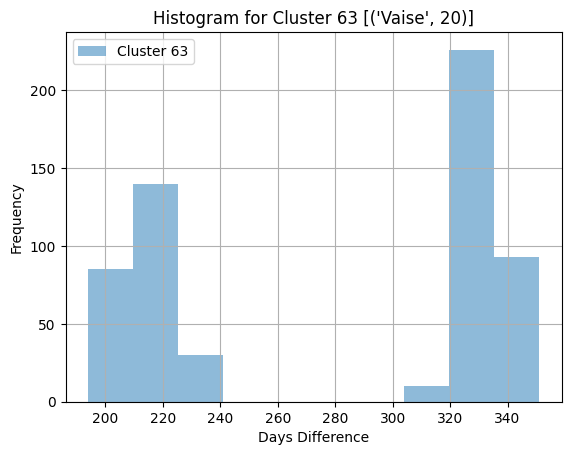

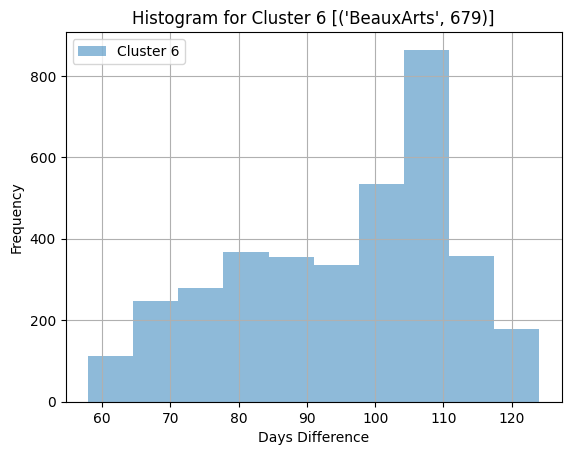

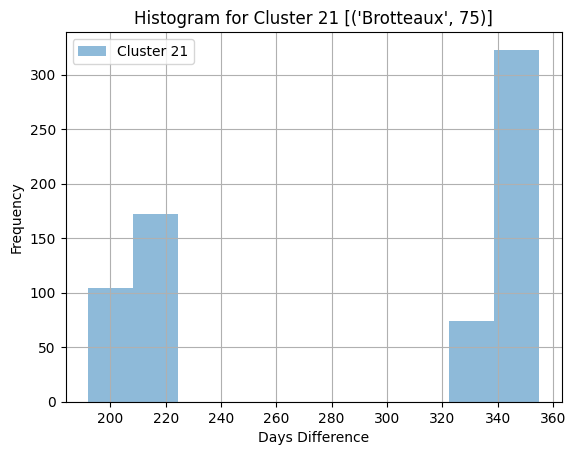

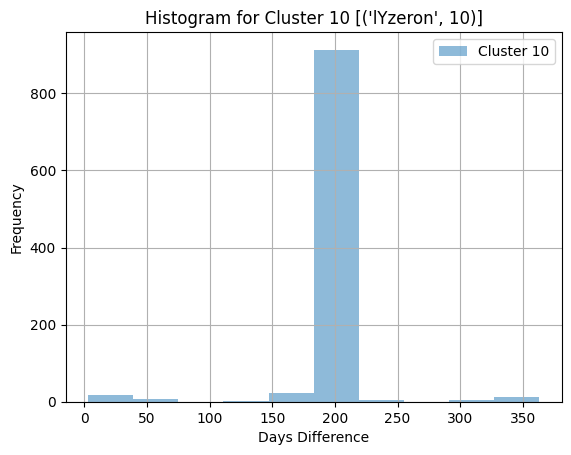

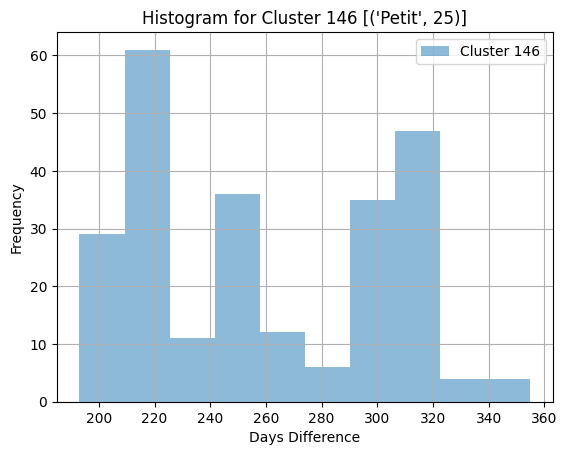

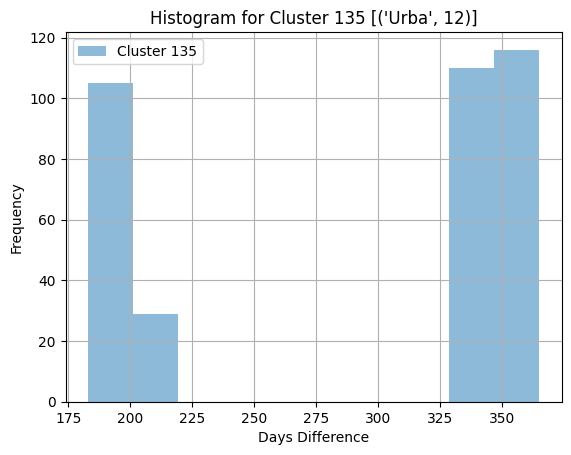

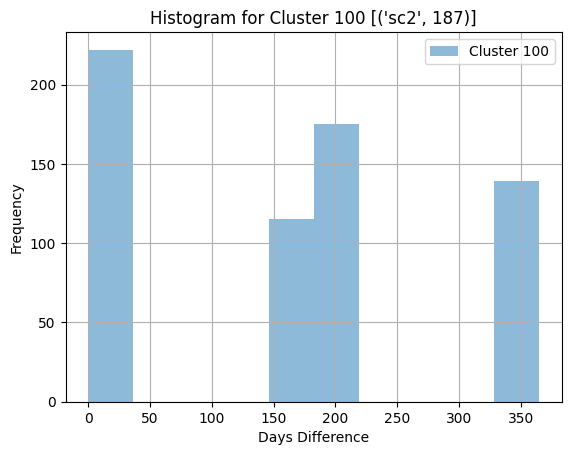

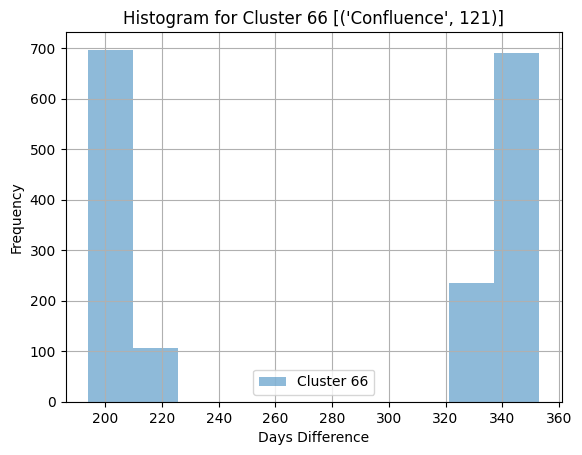

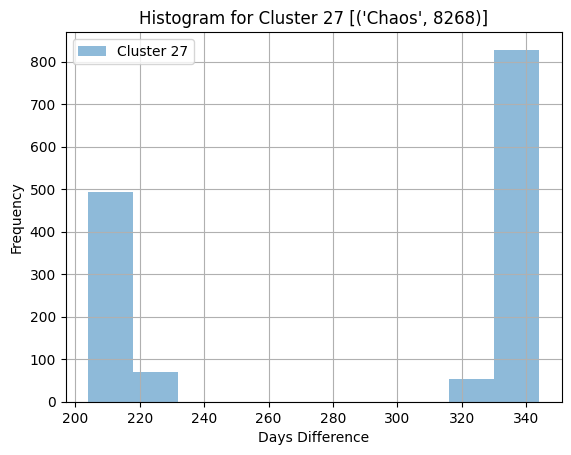

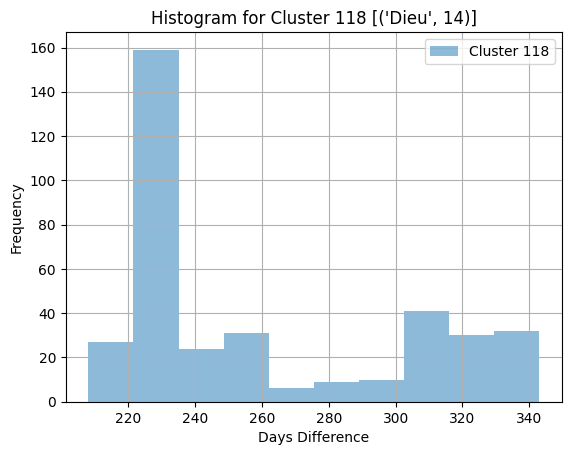

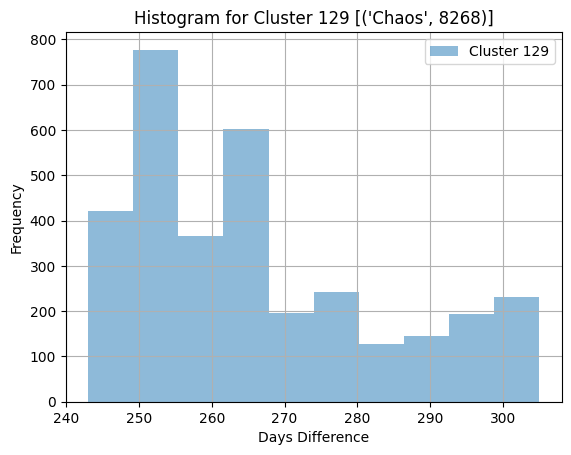

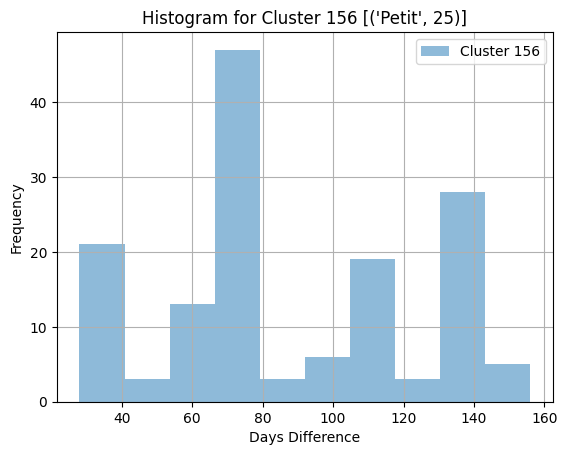

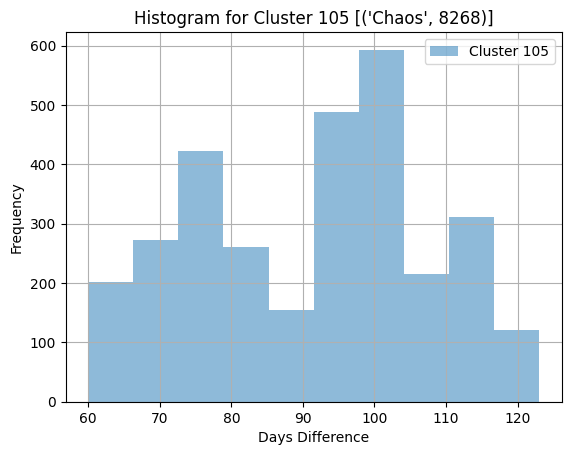

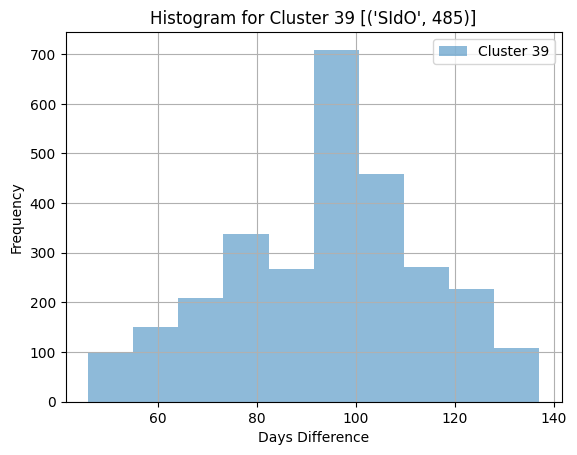

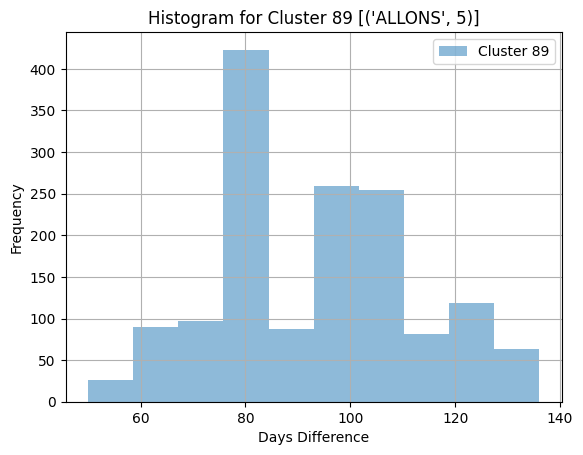

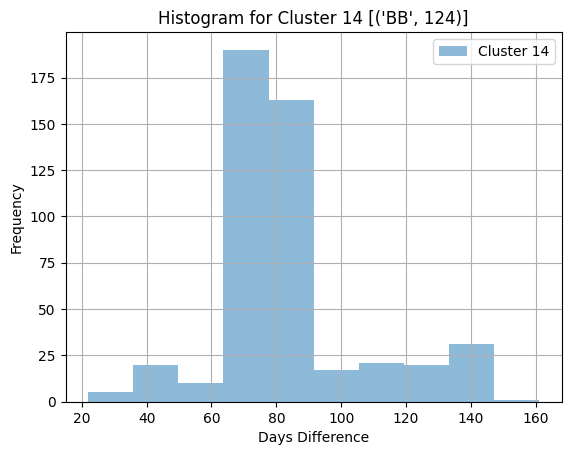

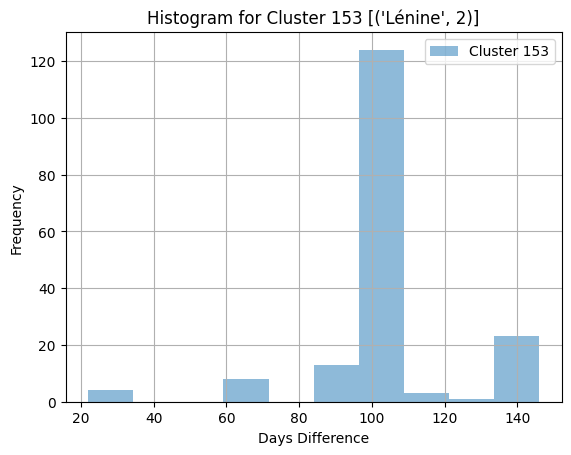

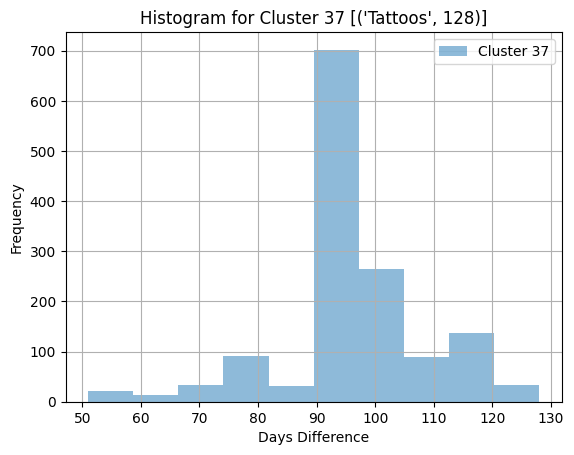

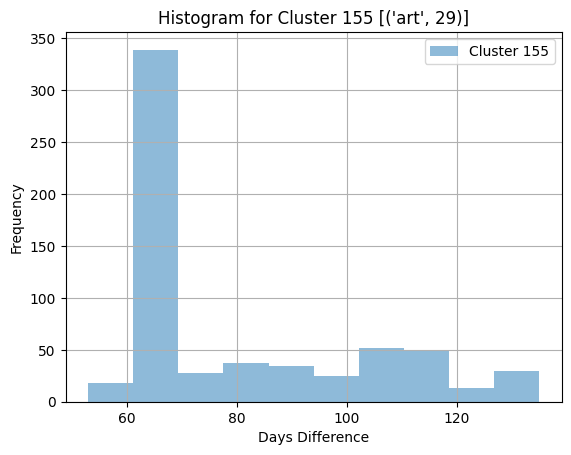

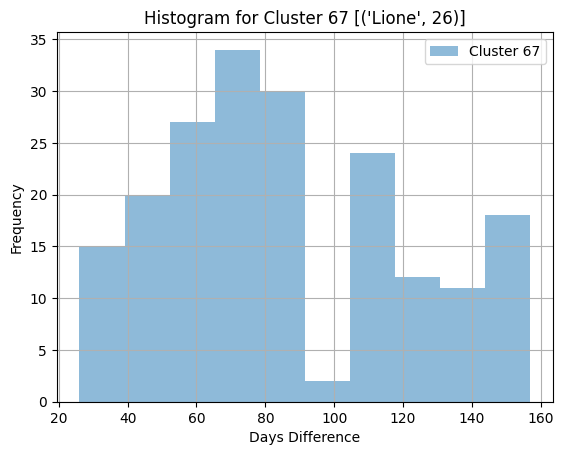

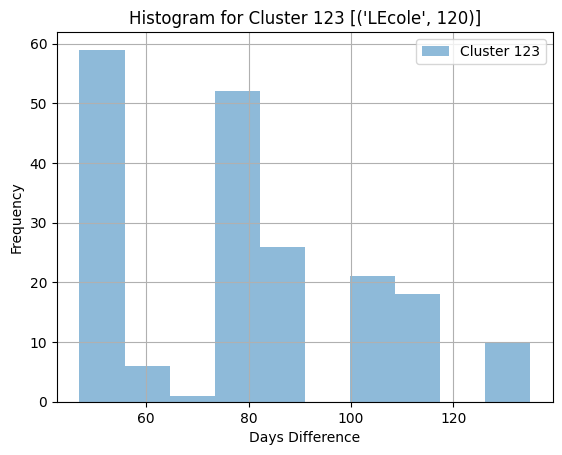

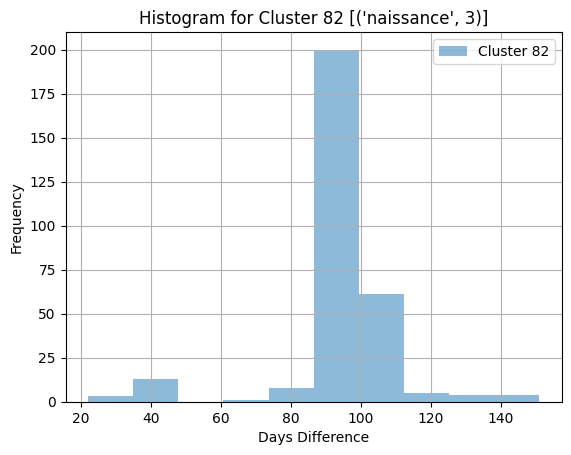

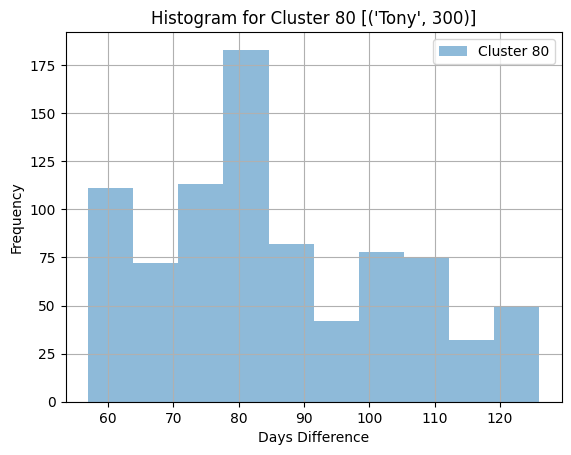

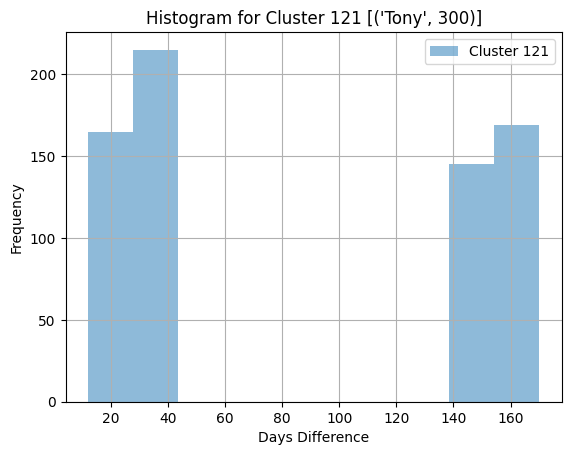

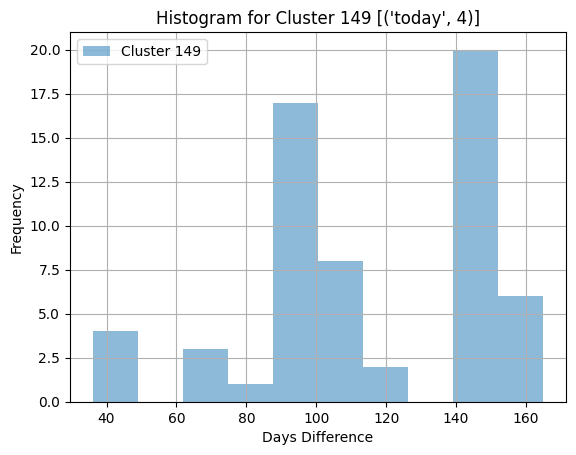

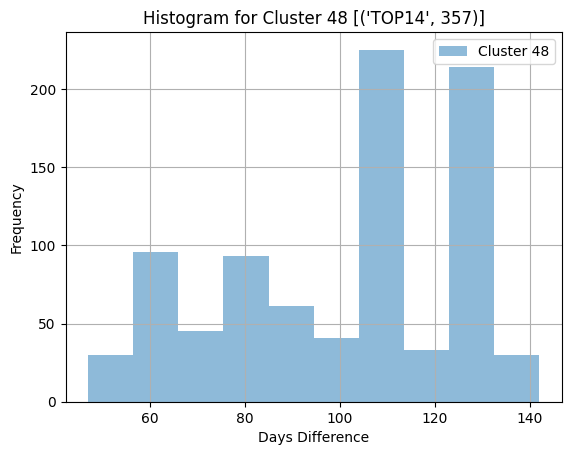

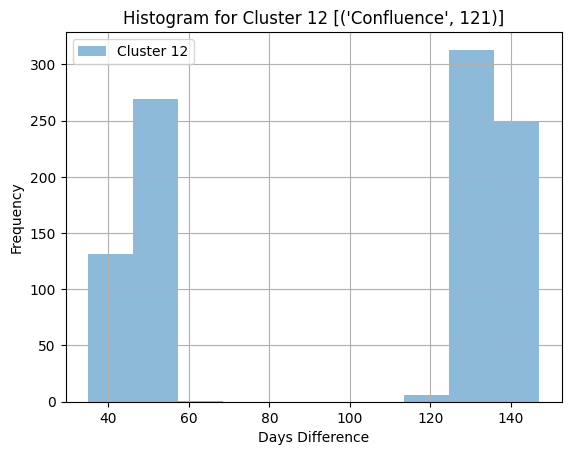

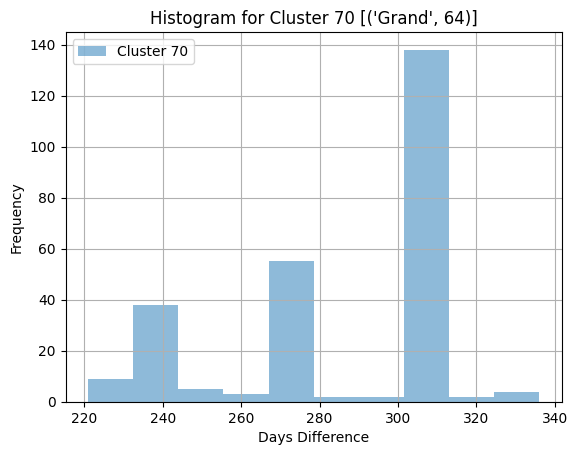

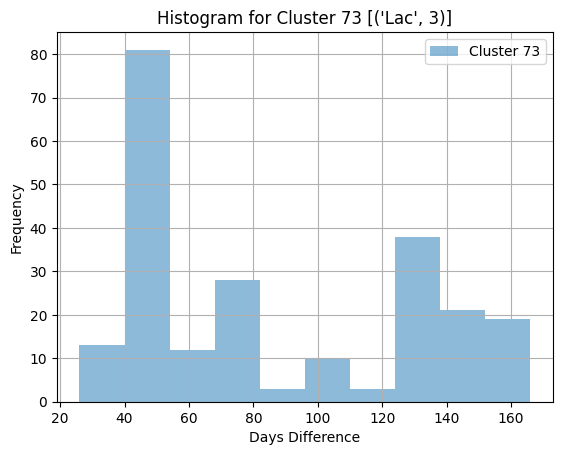

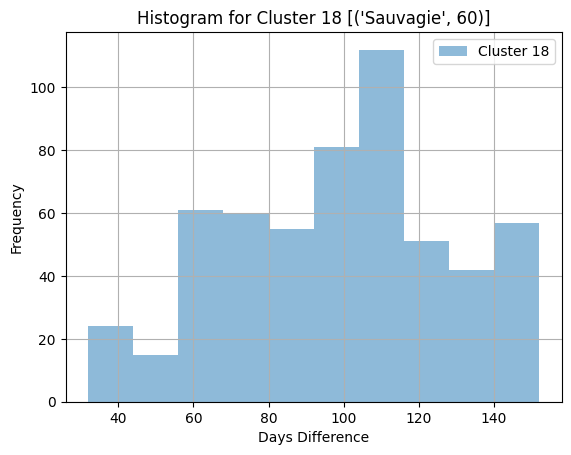

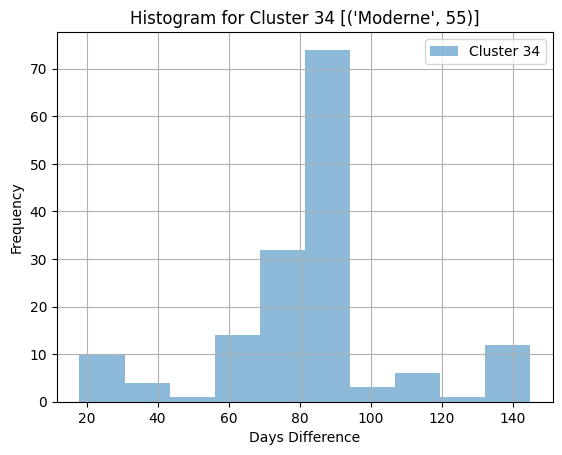

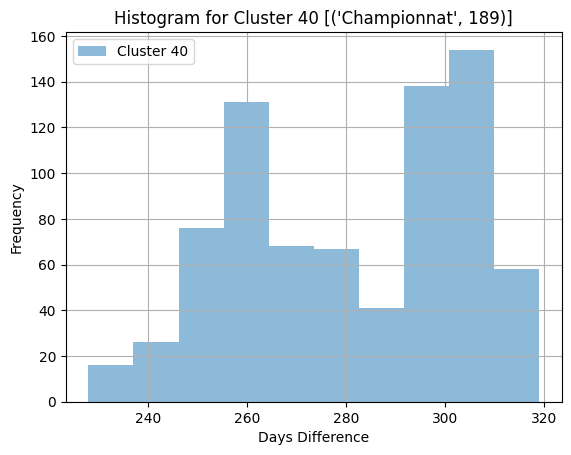

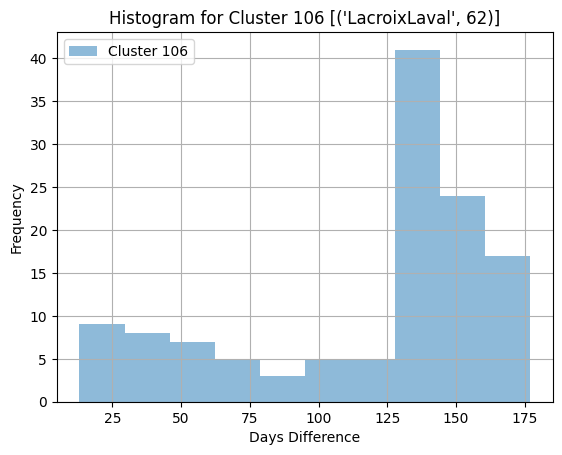

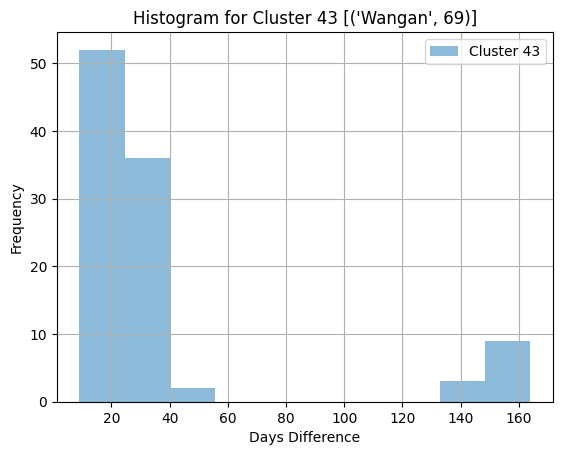

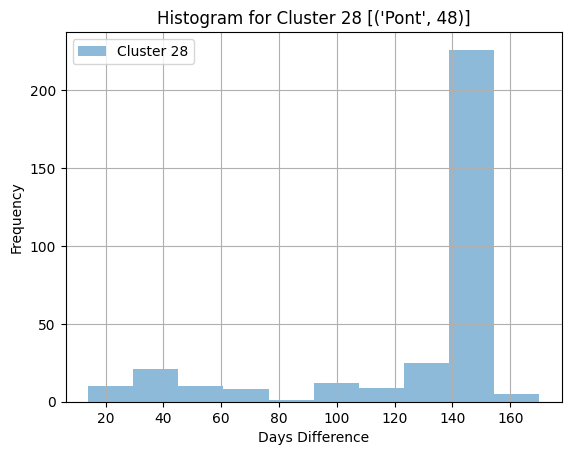

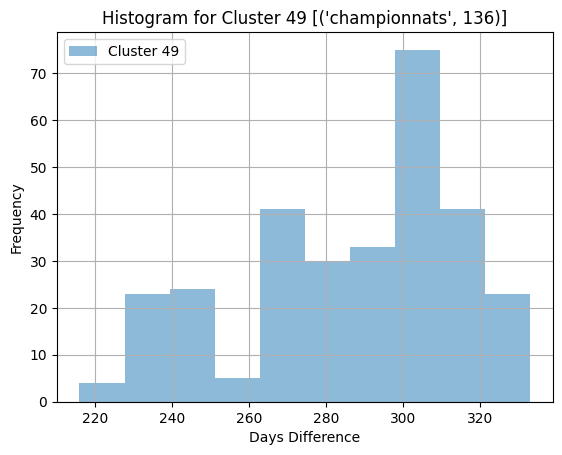

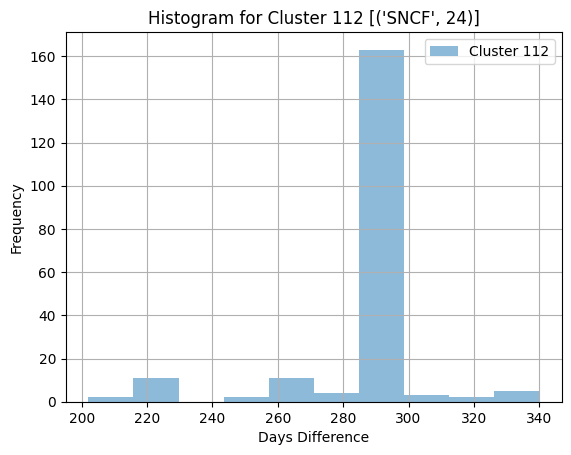

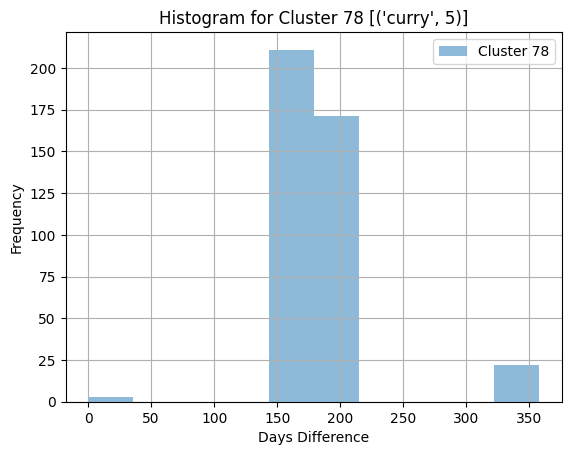

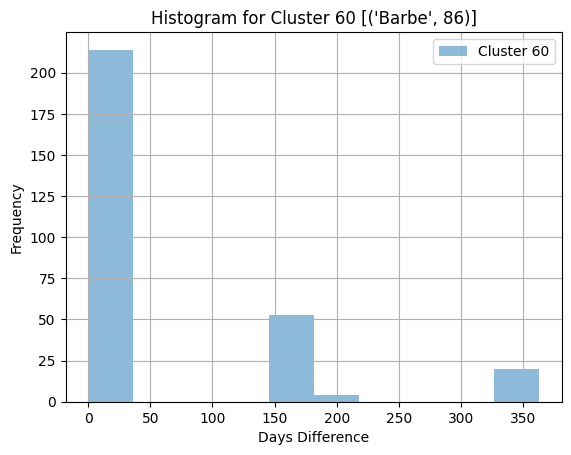

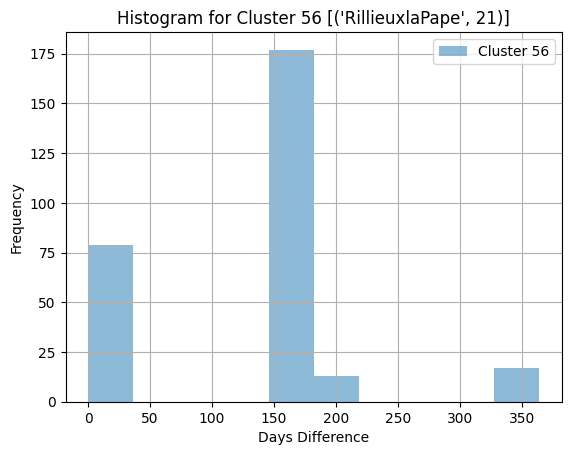

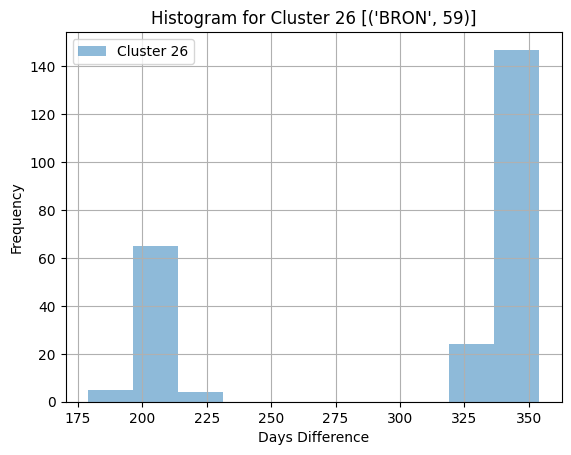

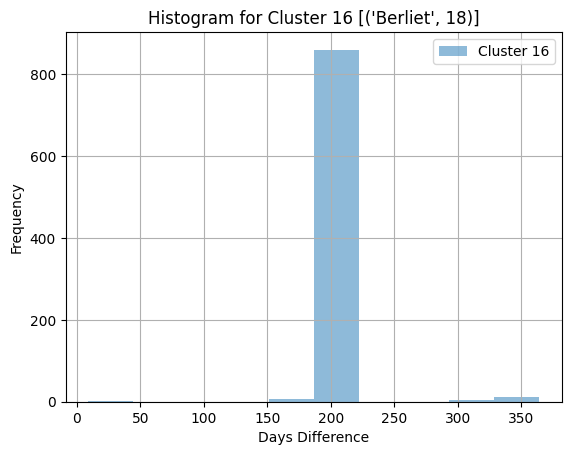

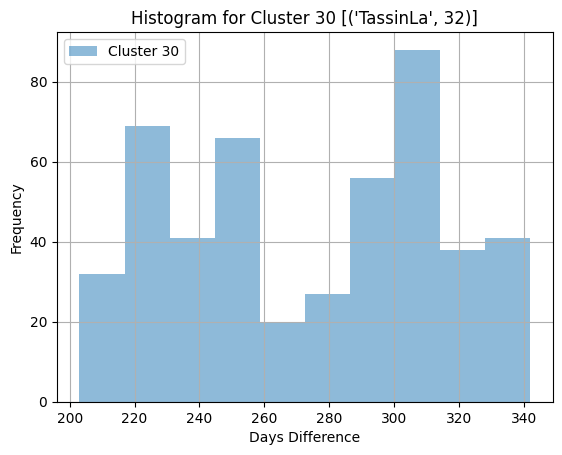

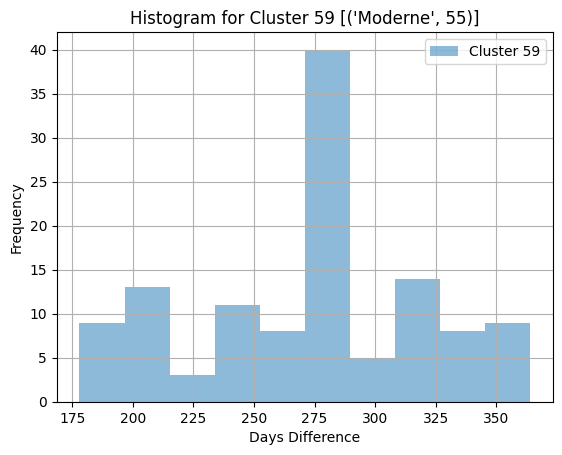

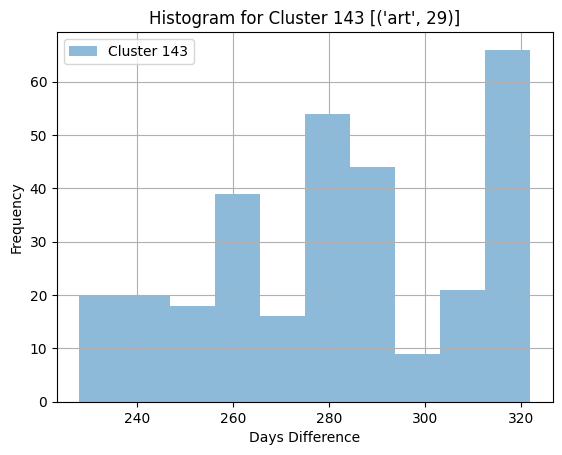

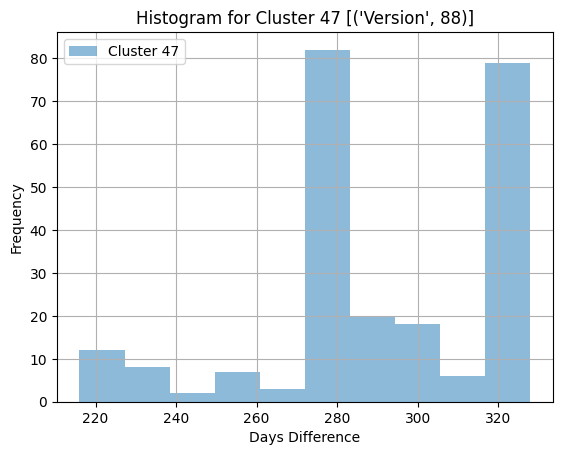

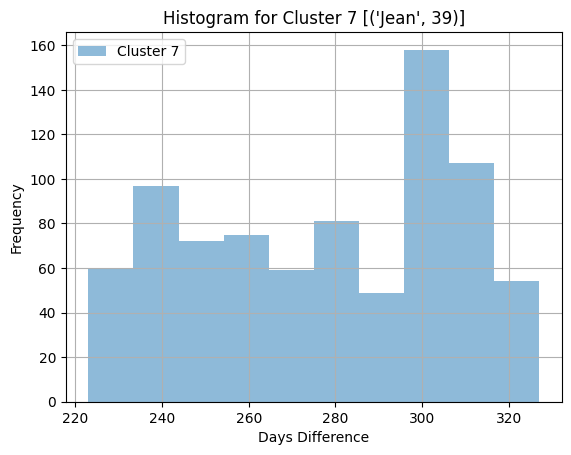

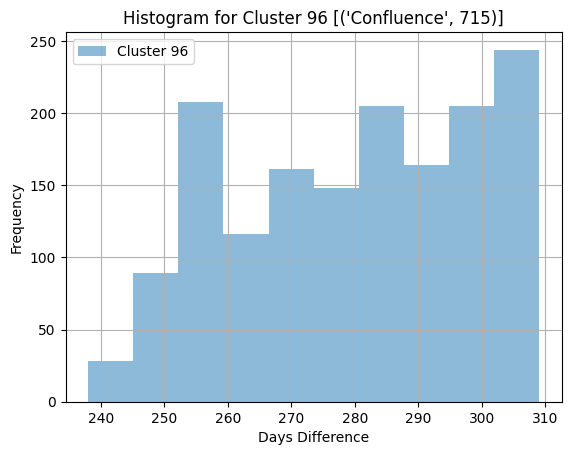

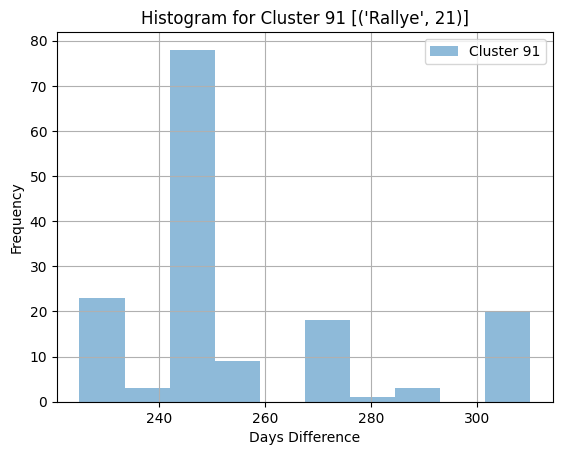

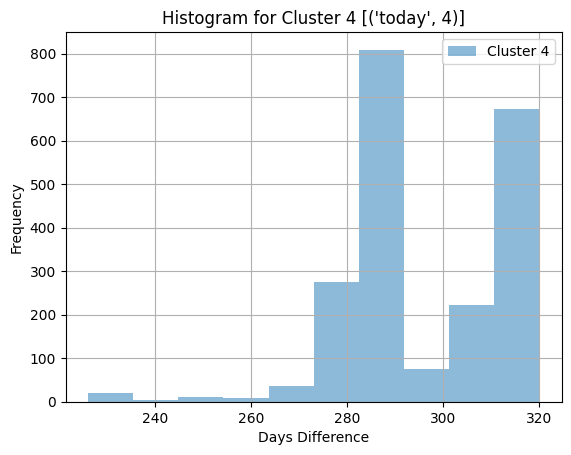

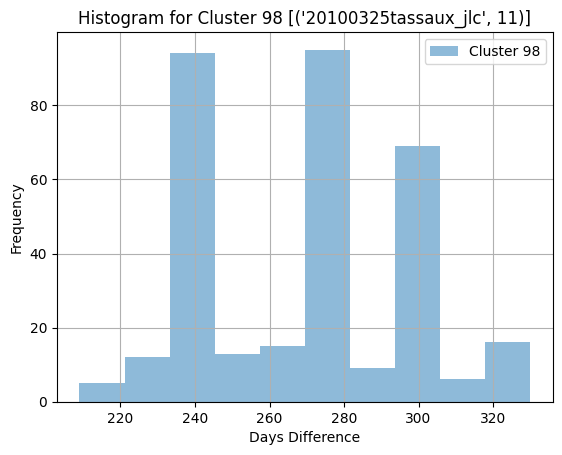

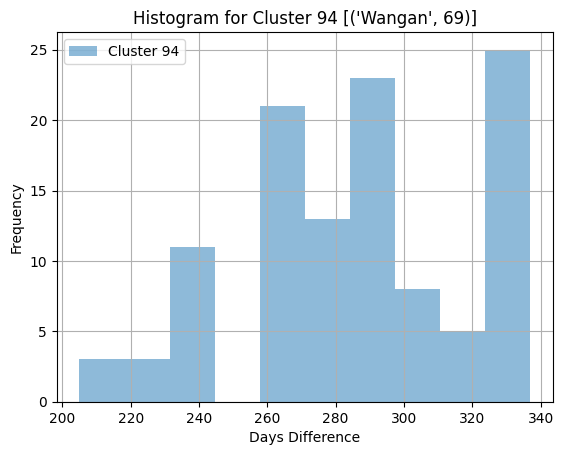

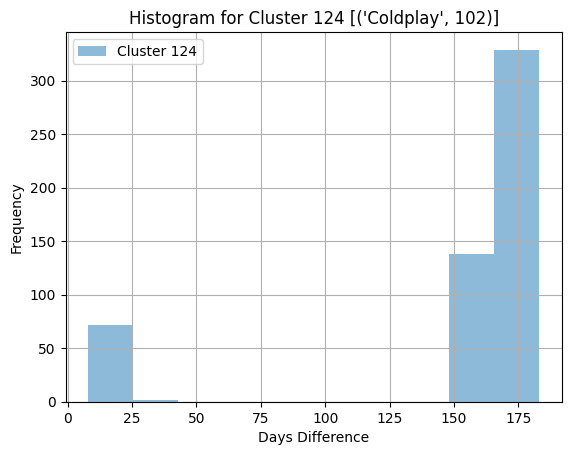

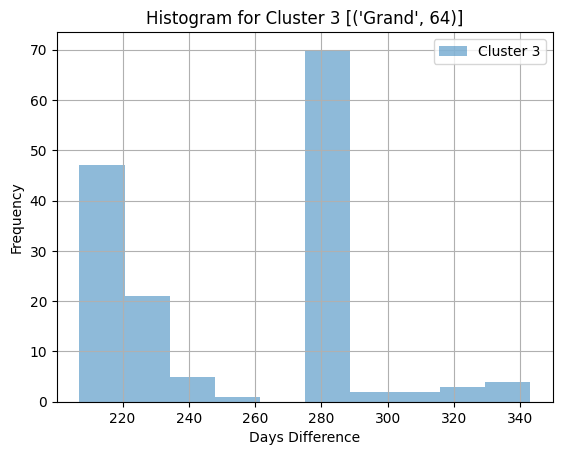

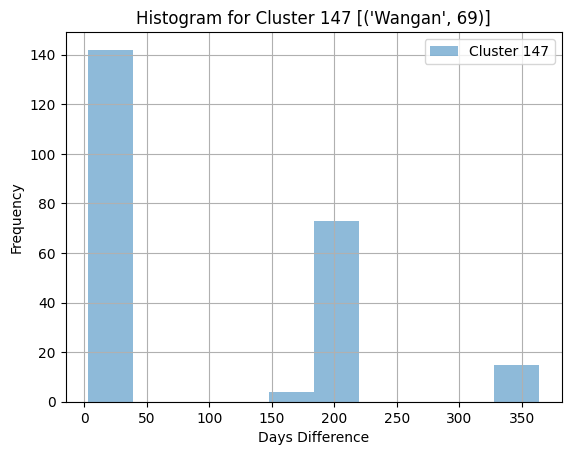

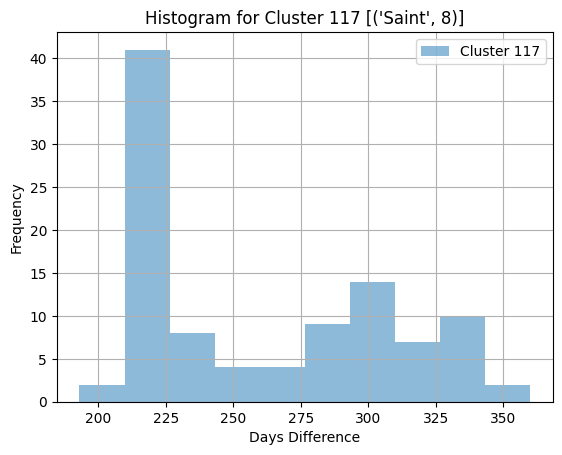

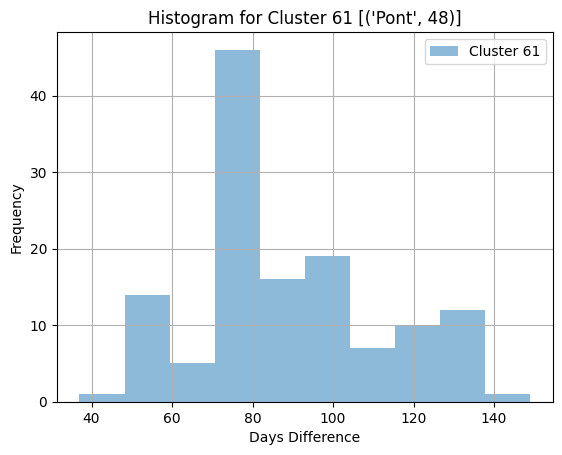

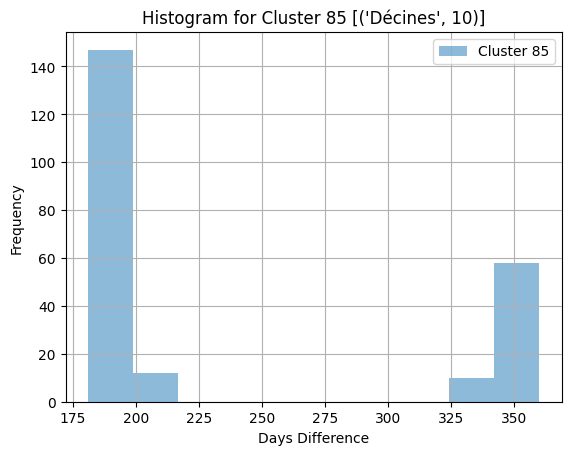

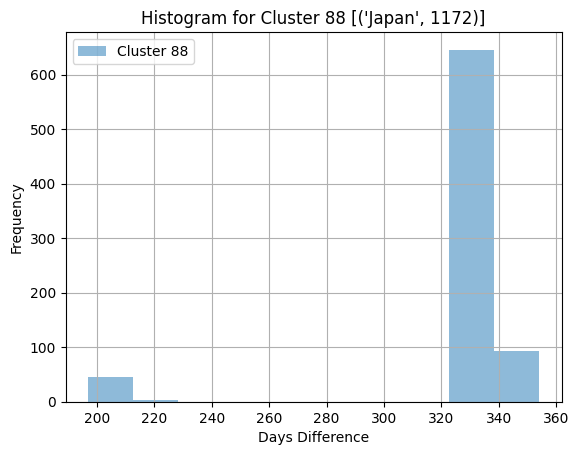

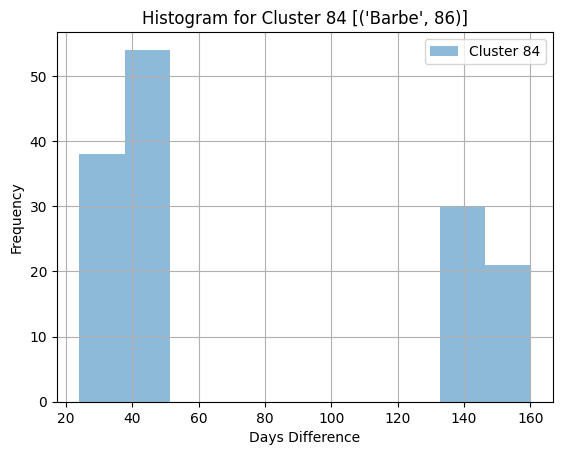

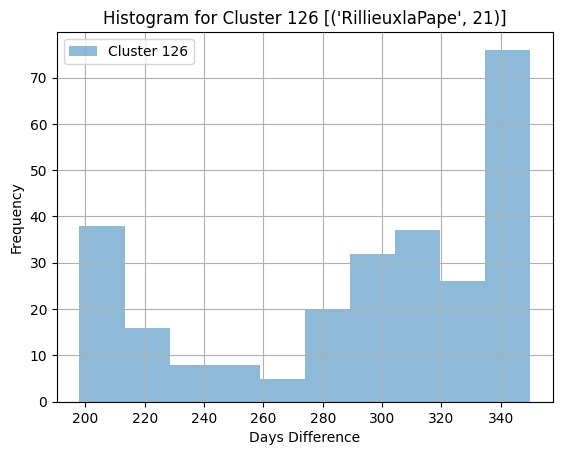

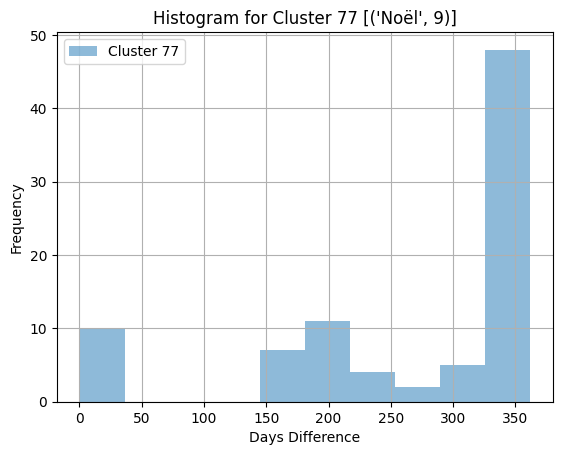

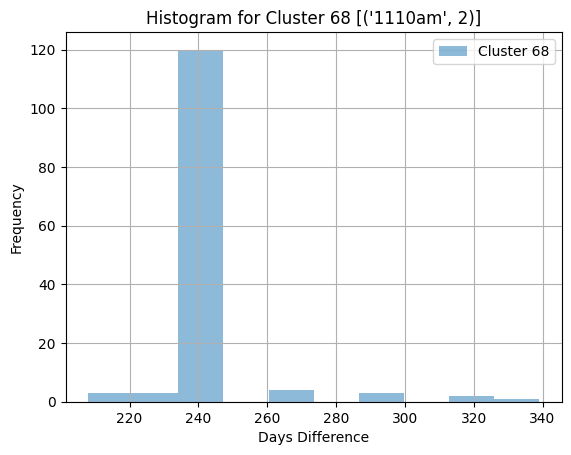

In [92]:
for cluster in data['time k-means labels'].unique():
    cluster_data = data[data['time k-means labels'] == cluster]
    cluster_title = cluster_data.iloc[0]['common_words']
    plt.figure()
    cluster_data['days_difference'].hist(alpha=0.5, label=f'Cluster {cluster}')
    plt.legend()
    plt.title(f'Histogram for Cluster {cluster} {cluster_title}')
    plt.xlabel('Days Difference')
    plt.ylabel('Frequency')
    plt.show()